In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<span style="font-family: monospace">
<h1>Problem Statement</h1>

In this case study, we will be working on Delhivery dataset to clean and analyze the trips. We will be using the concepts of
1. Data Exporation
2. Feature Engineering
3. Data Vizualization
4. Hypothesis Testing

</span>

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

from scipy.stats import levene, shapiro
from scipy.stats import chi2, chisquare, chi2_contingency
from scipy.stats import ttest_ind, ttest_1samp, ttest_ind_from_stats, ttest_rel
from scipy.stats import kstest, kruskal, pearson3, mannwhitneyu

from statsmodels.stats.power import TTestIndPower
from statsmodels.distributions.empirical_distribution import ECDF

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from category_encoders import TargetEncoder

from datetime import datetime

standardscaler = StandardScaler()

pd.set_option('mode.chained_assignment', None)

<span style="font-family: monospace">
<h2>Data Exporation</h2>
</span>

In [3]:
df = pd.read_csv('data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.shape

(144867, 24)

In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), df[col][0], ' ' * (30 - len(str(df[col][0]))), df[col].dtype)

1 data                                          training                        object
2 trip_creation_time                            2018-09-20 02:35:36.476840      object
3 route_schedule_uuid                           thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef  object
4 route_type                                    Carting                         object
5 trip_uuid                                     trip-153741093647649320         object
6 source_center                                 IND388121AAA                    object
7 source_name                                   Anand_VUNagar_DC (Gujarat)      object
8 destination_center                            IND388620AAB                    object
9 destination_name                              Khambhat_MotvdDPP_D (Gujarat)   object
10 od_start_time                                2018-09-20 03:21:32.418600      object
11 od_end_time                                  2018-09-20 04:47:45.236797      object
12 start_scan_to_end_s

In [9]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
def handle_na_values(dataframe, col_list):

    for col in col_list:
        available_center_codes = dataframe[~dataframe[col].isna()][col].values
        na_center_codes = dataframe[dataframe[col].isna()][col].values
        percent_na = 100 * df[col].isna().sum()/dataframe.shape[0]
        if set([True if n in available_center_codes else False for n in na_center_codes]) == {False,}:
            if percent_na < 2:
                print(f'Cannot find appropriate replacement for: {col}. Hence dropping the rows because they constitute {round(percent_na, 2)}% of total rows.')
                dataframe = dataframe.dropna(subset=[col])
            else:
                print('Filling NA values with NOT AVAILABLE')
    
    return dataframe

In [11]:
df = handle_na_values(df, ['source_name', 'destination_name'])

Cannot find appropriate replacement for: source_name. Hence dropping the rows because they constitute 0.2% of total rows.
Cannot find appropriate replacement for: destination_name. Hence dropping the rows because they constitute 0.18% of total rows.


In [12]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [13]:
def data_preprocessing(dataframe):
    '''
    The function performs various data cleaning steps such as:
    1. dropping extraneous columns
    2. correcting required column datatypes
    3. renaming columns for ease of understanding

    :input_params
        1. dataframe: pd.DataFrame

    :return_values
        1. dataframe: pd.DataFrame
    '''

    # dropping 'route_schedule_uuid' because we want to transform data to a trip level and this feature will not be of any use.
    # dropping 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', and 'segment_factor' because no description is provided.
    dataframe = dataframe.drop(['route_schedule_uuid', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis=1)
    
    print(f'Total number of NULL values in the dataframe: {dataframe.isna().sum().sum()}')

    for col in ['trip_creation_time', 'od_start_time', 'od_end_time']:
        dataframe[col] = pd.to_datetime(dataframe[col].apply(lambda x: x.split('.')[0]))
    
    dataframe.rename({
        'osrm_time' : 'predicted_delivery_time',
        'osrm_distance' : 'predicted_delivery_distance',
        'segment_osrm_time' : 'predicted_segment_delivery_time',
        'segment_osrm_distance' : 'predicted_segment_delivery_distance',
        'start_scan_to_end_scan' : 'actual_source_and_destination_scan_time',
        'actual_distance_to_destination' : 'actual_delivery_distance',
        'segment_actual_time' : 'actual_segment_delivery_time',
        'actual_time' : 'actual_delivery_time'
    }, axis=1, inplace=True)

    return dataframe.reset_index(drop=True)

In [14]:
df = data_preprocessing(df)

Total number of NULL values in the dataframe: 0


In [15]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), df[col][0], ' ' * (30 - len(str(df[col][0]))), df[col].dtype)

1 data                                          training                        object
2 trip_creation_time                            2018-09-20 02:35:36             datetime64[ns]
3 route_type                                    Carting                         object
4 trip_uuid                                     trip-153741093647649320         object
5 source_center                                 IND388121AAA                    object
6 source_name                                   Anand_VUNagar_DC (Gujarat)      object
7 destination_center                            IND388620AAB                    object
8 destination_name                              Khambhat_MotvdDPP_D (Gujarat)   object
9 od_start_time                                 2018-09-20 03:21:32             datetime64[ns]
10 od_end_time                                  2018-09-20 04:47:45             datetime64[ns]
11 actual_source_and_destination_scan_time      86.0                            float64
12 actual_delivery

<span style="font-family: monospace">

<h3>Observations</h3>

<h4>Comment on Features:</h4>

    1. data : 2 unique values depicting the type of the data - 'train' or 'test'.
    2. trip_creation_time : The timestamp at which the trip was created. Dataset has data of roughly 22 days.
    3. route_type : 2 unique values depicting the route type of the trip - 'FTL' or 'Carting'.
    4. source_center : We have data of trips originating from 1496 different Source Centers.
    5. destination_center : We have data of trips ending in 1466 different Destination Centers.
    6. od_start_time : The timestamp of the first scan, at source.
    7. od_end_time : The timestamp of the last scan, at destination.
    8. actual_source_and_destination_scan_time : Pre-computed difference between od_start_time and od_end_time.
    9. actual_delivery_distance : The average delivery distance is of 234.7 kms, with a maximum distance of 1927.4 kms.
    10. actual_delivery_time : The average delivery time is 418 minutes, with a maximum time of 4532 minutes.
    11. actual_segment_delivery_time : The average delivery time for a segment is of 36.18 minutes, with a maximum time of 3051 minutes.

<h4>Comment on Data:</h4>
    
    1. The data is not on trip level. To transform data into trip level, we need to group the data:
        a. First by trip_uuid, source_center, and destination_center.
        b. Second by trip_uuid

    2. Relationship between Columns:
        a. actual_delivery_time is cumsum of actual_segment_delivery_time
        b. predicted_delivery_time is cumsmum of predicted_segment_delivery_time
        c. predicted_delivery_distance is cumsmum of predicted_segment_delivery_distance

</span>

<span style="font-family: monospace">
<h2>Feature Engineering</h2>
</span>

In [16]:
def add_feature_city_and_state_name(series):
    city_series = series.str.split('(').apply(lambda x: x[0])
    state_series = series.str.split('(').apply(lambda x: x[1][:-1])
    return city_series, state_series

def feature_engineering_before_data_segregation_and_grouping(dataframe):
    '''
    The function adds following new features in the dataset:
    1. calculate difference between 'od_start_time' and 'od_end_time' as 'calculated_source_and_destination_scan_time'.
    2. fetching city and state names from 'source_name' and 'destination_name'.
    3. one-hot encoding 'route_type' feature
    4. fetching time details from 'trip_creation_time' columns
    5. dropping extraneous columns whose information has already been captured in the calculated fields.
    :input_params
        1. dataframe: pd.DataFrame

    :return_values
        1. dataframe: pd.DataFrame
    '''

    # 1. calculating difference between 'od_start_time' and 'od_end_time'
    dataframe['calculated_source_and_destination_scan_time'] = (dataframe['od_end_time'] - dataframe['od_start_time']).apply(lambda x: x.total_seconds()/60)

    # 2. fetching city and state names from 'source_name' and 'destination_name'
    dataframe['source_city_name'], dataframe['source_state_name'] = add_feature_city_and_state_name(dataframe['source_name'])
    dataframe['destination_city_name'], dataframe['destination_state_name'] = add_feature_city_and_state_name(dataframe['destination_name'])

    # 3. one-hot encoding 'route_type' feature
    dataframe['route_type'] = dataframe['route_type'].apply(lambda x: 1 if x == 'Carting' else 0 if x == 'FTL' else np.nan)

    # 4. fetching time details from 'trip_creation_time' columns
    dataframe['trip_creation_year'] = dataframe['trip_creation_time'].dt.year
    dataframe['trip_creation_month'] = dataframe['trip_creation_time'].dt.month
    dataframe['trip_creation_date'] = dataframe['trip_creation_time'].dt.day
    dataframe['trip_creation_daytime'] = dataframe['trip_creation_time'].dt.time
    dataframe['trip_creation_day_of_week'] = dataframe['trip_creation_time'].dt.day_of_week

    columns_to_drop = ['trip_creation_time', 'od_end_time', 'od_start_time', 'source_name', 'destination_name']
    # checking if any of the above feature results in a column with only 1 unique value and if yes then adding it to the list 'columns_to_drop'
    for col in ['calculated_source_and_destination_scan_time', 'source_city_name', 'destination_city_name', 'route_type', 'trip_creation_year', 'trip_creation_month', 'trip_creation_date', 'trip_creation_time', 'trip_creation_day_of_week']:
        if dataframe[col].nunique() == 1:
            columns_to_drop.append(col)
    
    # dropping extraneous columns whose information has already been captured in the calculated fields
    dataframe.drop(columns_to_drop, axis=1, inplace=True)

    dataframe = dataframe[['data', 'trip_uuid', 'route_type', 'trip_creation_month', 'trip_creation_date', 'trip_creation_daytime', 'trip_creation_day_of_week', 'source_center', 'source_city_name', 'source_state_name', 'destination_center', 'destination_city_name', 'destination_state_name', 'actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']]
    
    return dataframe

In [17]:
df = feature_engineering_before_data_segregation_and_grouping(df)
df

,data,trip_uuid,route_type,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,source_center,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,14.0,11.0,14.0,11.0,10.435660,11.9653,11.9653
1,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,24.0,20.0,10.0,9.0,18.936842,21.7243,9.7590
2,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,40.0,28.0,16.0,7.0,27.637279,32.5395,10.8152
3,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,62.0,40.0,21.0,12.0,36.118028,45.5620,13.0224
4,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,68.0,44.0,6.0,5.0,39.386040,54.2181,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,trip-153746066843555182,1,9,20,16:24:28,3,IND131028AAB,Sonipat_Kundli_H,Haryana,...,Haryana,427.0,427.683333,94.0,60.0,12.0,12.0,45.258278,67.9280,8.1858
144312,training,trip-153746066843555182,1,9,20,16:24:28,3,IND131028AAB,Sonipat_Kundli_H,Haryana,...,Haryana,427.0,427.683333,120.0,76.0,26.0,21.0,54.092531,85.6829,17.3725
144313,training,trip-153746066843555182,1,9,20,16:24:28,3,IND131028AAB,Sonipat_Kundli_H,Haryana,...,Haryana,427.0,427.683333,140.0,88.0,20.0,34.0,66.163591,97.0933,20.7053
144314,training,trip-153746066843555182,1,9,20,16:24:28,3,IND131028AAB,Sonipat_Kundli_H,Haryana,...,Haryana,427.0,427.683333,158.0,98.0,17.0,27.0,73.680667,111.2709,18.8885


In [18]:
# checking NA values to find out if any error occurred while engineering new features. The result should be 0 NA values for all the columns.
df.isna().sum()

data                                           0
trip_uuid                                      0
route_type                                     0
trip_creation_month                            0
trip_creation_date                             0
trip_creation_daytime                          0
trip_creation_day_of_week                      0
source_center                                  0
source_city_name                               0
source_state_name                              0
destination_center                             0
destination_city_name                          0
destination_state_name                         0
actual_source_and_destination_scan_time        0
calculated_source_and_destination_scan_time    0
actual_delivery_time                           0
predicted_delivery_time                        0
actual_segment_delivery_time                   0
predicted_segment_delivery_time                0
actual_delivery_distance                       0
predicted_delivery_d

In [19]:
# segregating training and testing data into respective dataframes. 
train_df = df[df['data'] == 'training'].reset_index(drop=True)
test_df = df[df['data'] == 'test'].reset_index(drop=True)

In [20]:
train_df.head(11)

,data,trip_uuid,route_type,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,source_center,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,14.0,11.0,14.0,11.0,10.435660,11.9653,11.9653
1,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,24.0,20.0,10.0,9.0,18.936842,21.7243,9.7590
2,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,40.0,28.0,16.0,7.0,27.637279,32.5395,10.8152
3,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,62.0,40.0,21.0,12.0,36.118028,45.5620,13.0224
4,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388121AAA,Anand_VUNagar_DC,Gujarat,...,Gujarat,86.0,86.216667,68.0,44.0,6.0,5.0,39.386040,54.2181,3.9153
5,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388620AAB,Khambhat_MotvdDPP_D,Gujarat,...,Gujarat,109.0,109.166667,15.0,11.0,15.0,11.0,10.403038,12.1171,12.1171
6,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388620AAB,Khambhat_MotvdDPP_D,Gujarat,...,Gujarat,109.0,109.166667,44.0,17.0,28.0,6.0,18.045481,21.2890,9.1719
7,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388620AAB,Khambhat_MotvdDPP_D,Gujarat,...,Gujarat,109.0,109.166667,65.0,29.0,21.0,11.0,28.061896,35.8252,14.5362
8,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388620AAB,Khambhat_MotvdDPP_D,Gujarat,...,Gujarat,109.0,109.166667,76.0,39.0,10.0,10.0,38.939167,47.1900,11.3648
9,training,trip-153741093647649320,1,9,20,02:35:36,3,IND388620AAB,Khambhat_MotvdDPP_D,Gujarat,...,Gujarat,109.0,109.166667,102.0,45.0,26.0,6.0,43.595802,53.2334,6.0434


In [21]:
test_df.head(6)

,data,trip_uuid,route_type,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,source_center,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,test,trip-153825970514894360,0,9,29,22:21:45,5,IND141003AAB,Ludhiana_GillChwk_DC,Punjab,...,Punjab,80.0,80.850000,20.0,16.0,20.0,16.0,23.583306,23.8100,23.8100
1,test,trip-153825970514894360,0,9,29,22:21:45,5,IND141003AAB,Ludhiana_GillChwk_DC,Punjab,...,Punjab,80.0,80.850000,40.0,31.0,19.0,14.0,36.623172,40.6640,16.8540
2,test,trip-153825970514894360,0,9,29,22:21:45,5,IND142026AAA,Jagraon_DC,Punjab,...,Punjab,89.0,89.650000,51.0,35.0,51.0,35.0,20.456544,23.3491,23.3491
3,test,trip-153825970514894360,0,9,29,22:21:45,5,IND141109AAA,Raikot_DC,Punjab,...,Punjab,92.0,92.133333,41.0,45.0,41.0,45.0,22.238037,32.6991,32.6991
4,test,trip-153825970514894360,0,9,29,22:21:45,5,IND141109AAA,Raikot_DC,Punjab,...,Punjab,92.0,92.133333,61.0,57.0,20.0,27.0,38.408783,59.7523,19.0379
5,test,trip-153840964571880594,0,10,1,16:00:45,0,IND131028AAB,Sonipat_Kundli_H,Haryana,...,Uttarakhand,463.0,463.133333,36.0,26.0,36.0,26.0,22.182679,23.8865,23.8865


In [22]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(train_df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), train_df[col][0], ' ' * (30 - len(str(train_df[col][0]))), train_df[col].dtype)

1 data                                          training                        object
2 trip_uuid                                     trip-153741093647649320         object
3 route_type                                    1                               int64
4 trip_creation_month                           9                               int64
5 trip_creation_date                            20                              int64
6 trip_creation_daytime                         02:35:36                        object
7 trip_creation_day_of_week                     3                               int64
8 source_center                                 IND388121AAA                    object
9 source_city_name                              Anand_VUNagar_DC                object
10 source_state_name                            Gujarat                         object
11 destination_center                           IND388620AAB                    object
12 destination_city_name                       

In [23]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(test_df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), test_df[col][0], ' ' * (30 - len(str(test_df[col][0]))), test_df[col].dtype)

1 data                                          test                            object
2 trip_uuid                                     trip-153825970514894360         object
3 route_type                                    0                               int64
4 trip_creation_month                           9                               int64
5 trip_creation_date                            29                              int64
6 trip_creation_daytime                         22:21:45                        object
7 trip_creation_day_of_week                     5                               int64
8 source_center                                 IND141003AAB                    object
9 source_city_name                              Ludhiana_GillChwk_DC            object
10 source_state_name                            Punjab                          object
11 destination_center                           IND142026AAA                    object
12 destination_city_name                       

In [24]:
def groupby_dataframe(dataframe, groupby_columns_list, groupby_aggregation_dictionary):
    '''
    The function performs groupby action on the input dataframe

    :input_params
        1. dataframe: pd.DataFrame
        2. groupby_columns_list: list of columns to groupby on
        3. groupby_aggregation_dictionary: dictionary of aggregation type for different columns
    :return_values
        1. dataframe: pd.DataFrame
    '''
    return dataframe.groupby(by=groupby_columns_list, as_index=False).agg(groupby_aggregation_dictionary).reset_index(drop=True)

In [25]:
groupby_aggregation_dictionary_1 = {
    'trip_creation_month' : 'first',
    'trip_creation_date' : 'first',
    'trip_creation_daytime' : 'first',
    'trip_creation_day_of_week' : 'first',
    'route_type' : 'first',
    'source_city_name' : 'first',
    'source_state_name'	: 'first',
    'destination_city_name' : 'first',
    'destination_state_name' : 'first', 
    'actual_source_and_destination_scan_time' : 'first',
    'calculated_source_and_destination_scan_time' : 'first',
    'actual_delivery_time' : 'last',
    'predicted_delivery_time' : 'last',
    'actual_segment_delivery_time' : 'sum',
    'predicted_segment_delivery_time' : 'sum',    
    'actual_delivery_distance' : 'sum',
    'predicted_delivery_distance' : 'last',
    'predicted_segment_delivery_distance' : 'sum'
}

groupby_columns_list_1 = ['trip_uuid', 'source_center', 'destination_center']

train_df_grouped_1 = groupby_dataframe(train_df, groupby_columns_list_1, groupby_aggregation_dictionary_1)
test_df_grouped_1 = groupby_dataframe(test_df, groupby_columns_list_1, groupby_aggregation_dictionary_1)

In [26]:
train_df_grouped_1.head(7)

,trip_uuid,source_center,destination_center,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,9,12,00:00:16,2,0,Kanpur_Central_H_6,Uttar Pradesh,...,Haryana,1260.0,1260.616667,732.0,329.0,728.0,534.0,3778.765471,446.5496,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,9,12,00:00:16,2,0,Bhopal_Trnsport_H,Madhya Pradesh,...,Uttar Pradesh,999.0,999.500000,830.0,388.0,820.0,474.0,5082.046634,544.8027,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,9,12,00:00:22,2,1,Doddablpur_ChikaDPP_D,Karnataka,...,Karnataka,58.0,58.833333,47.0,26.0,46.0,26.0,53.310332,28.1994,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,9,12,00:00:22,2,1,Tumkur_Veersagr_I,Karnataka,...,Karnataka,122.0,122.783333,96.0,42.0,95.0,39.0,186.897974,56.9116,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,9,12,00:00:33,2,0,Gurgaon_Bilaspur_HB,Haryana,...,Punjab,834.0,834.633333,611.0,212.0,608.0,231.0,1725.590250,281.2109,317.7408
5,trip-153671043369099517,IND562132AAA,IND000000ACB,9,12,00:00:33,2,0,Bangalore_Nelmngla_H,Karnataka,...,Haryana,3099.0,3099.733333,2736.0,1528.0,2700.0,1710.0,66437.911988,2072.8556,2227.5270
6,trip-153671046011330457,IND400072AAB,IND401104AAA,9,12,00:01:00,2,1,Mumbai Hub,Maharashtra,...,Maharashtra,100.0,100.483333,59.0,15.0,59.0,16.0,28.529648,19.6800,19.8766


In [27]:
test_df_grouped_1.head(7)

,trip_uuid,source_center,destination_center,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_city_name,source_state_name,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153800653897073708,IND424006AAA,IND424101AAA,9,27,00:02:18,3,1,Dhule_MIDCAvdn_I,Maharashtra,...,Maharashtra,145.0,145.833333,128.0,40.0,126.0,47.0,243.502082,56.8745,67.4925
1,trip-153800654935210748,IND400072AAB,IND401104AAA,9,27,00:02:29,3,1,Mumbai Hub,Maharashtra,...,Maharashtra,81.0,81.100000,58.0,17.0,58.0,17.0,27.963594,21.7310,21.7310
2,trip-153800658820968126,IND302014AAA,IND000000ACB,9,27,00:03:08,3,0,Jaipur_Hub,Rajasthan,...,Haryana,610.0,610.766667,334.0,163.0,334.0,163.0,196.041263,220.8430,220.8430
3,trip-153800659468028518,IND421302AAF,IND421302AAR,9,27,00:03:14,3,1,Mumbai_Kalyan,Maharashtra,...,Maharashtra,104.0,104.500000,27.0,9.0,27.0,9.0,9.198088,11.5549,11.5549
4,trip-153800661729668086,IND395009AAA,IND395023AAD,9,27,00:03:37,3,1,Surat_Central_D_12,Gujarat,...,Gujarat,228.0,228.866667,132.0,17.0,131.0,17.0,26.281211,18.1836,18.1836
5,trip-153800662027930085,IND421301AAA,IND421302AAR,9,27,00:03:40,3,1,Mumbai_Kalyan West _Dc,Maharashtra,...,Maharashtra,85.0,85.916667,36.0,11.0,35.0,11.0,20.771859,14.1344,15.5126
6,trip-153800669301861431,IND500055AAC,IND501401AAC,9,27,00:04:53,3,1,Hyderabad_North_D_2,Telangana,...,Telangana,51.0,51.450000,26.0,12.0,25.0,12.0,24.251008,15.7739,15.7739


In [28]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(train_df_grouped_1.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), train_df_grouped_1[col][0], ' ' * (30 - len(str(train_df_grouped_1[col][0]))), train_df_grouped_1[col].dtype)

1 trip_uuid                                     trip-153671041653548748         object
2 source_center                                 IND209304AAA                    object
3 destination_center                            IND000000ACB                    object
4 trip_creation_month                           9                               int64
5 trip_creation_date                            12                              int64
6 trip_creation_daytime                         00:00:16                        object
7 trip_creation_day_of_week                     2                               int64
8 route_type                                    0                               int64
9 source_city_name                              Kanpur_Central_H_6              object
10 source_state_name                            Uttar Pradesh                   object
11 destination_city_name                        Gurgaon_Bilaspur_HB             object
12 destination_state_name                      

In [29]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(test_df_grouped_1.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), test_df_grouped_1[col][0], ' ' * (30 - len(str(test_df_grouped_1[col][0]))), test_df_grouped_1[col].dtype)

1 trip_uuid                                     trip-153800653897073708         object
2 source_center                                 IND424006AAA                    object
3 destination_center                            IND424101AAA                    object
4 trip_creation_month                           9                               int64
5 trip_creation_date                            27                              int64
6 trip_creation_daytime                         00:02:18                        object
7 trip_creation_day_of_week                     3                               int64
8 route_type                                    1                               int64
9 source_city_name                              Dhule_MIDCAvdn_I                object
10 source_state_name                            Maharashtra                     object
11 destination_city_name                        Chalisgaon_BhadgDPP_D           object
12 destination_state_name                      

In [30]:
groupby_aggregation_dictionary_2 = {
    'trip_creation_month' : 'first',
    'trip_creation_date' : 'first',
    'trip_creation_daytime' : 'first',
    'trip_creation_day_of_week' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_city_name' : 'first',
    'source_state_name'	: 'first',
    'destination_center' : 'last',
    'destination_city_name' : 'last',
    'destination_state_name' : 'last',
    'actual_source_and_destination_scan_time' : 'sum',
    'calculated_source_and_destination_scan_time' : 'sum',
    'actual_delivery_time' : 'sum',
    'predicted_delivery_time' : 'sum',
    'actual_segment_delivery_time' : 'sum',
    'predicted_segment_delivery_time' : 'sum',    
    'actual_delivery_distance' : 'sum',
    'predicted_delivery_distance' : 'sum',
    'predicted_segment_delivery_distance' : 'sum'
}

groupby_columns_list_2 = ['trip_uuid']

train_df_grouped_2 = groupby_dataframe(train_df_grouped_1, groupby_columns_list_2, groupby_aggregation_dictionary_2)
test_df_grouped_2 = groupby_dataframe(test_df_grouped_1, groupby_columns_list_2, groupby_aggregation_dictionary_2)

In [31]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(train_df_grouped_2.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), train_df_grouped_2[col][0], ' ' * (30 - len(str(train_df_grouped_2[col][0]))), train_df_grouped_2[col].dtype)

1 trip_uuid                                     trip-153671041653548748         object
2 trip_creation_month                           9                               int64
3 trip_creation_date                            12                              int64
4 trip_creation_daytime                         00:00:16                        object
5 trip_creation_day_of_week                     2                               int64
6 route_type                                    0                               int64
7 source_center                                 IND209304AAA                    object
8 source_city_name                              Kanpur_Central_H_6              object
9 source_state_name                             Uttar Pradesh                   object
10 destination_center                           IND209304AAA                    object
11 destination_city_name                        Kanpur_Central_H_6              object
12 destination_state_name                      

In [32]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(test_df_grouped_2.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), test_df_grouped_2[col][0], ' ' * (30 - len(str(test_df_grouped_2[col][0]))), test_df_grouped_2[col].dtype)

1 trip_uuid                                     trip-153800653897073708         object
2 trip_creation_month                           9                               int64
3 trip_creation_date                            27                              int64
4 trip_creation_daytime                         00:02:18                        object
5 trip_creation_day_of_week                     3                               int64
6 route_type                                    1                               int64
7 source_center                                 IND424006AAA                    object
8 source_city_name                              Dhule_MIDCAvdn_I                object
9 source_state_name                             Maharashtra                     object
10 destination_center                           IND424101AAA                    object
11 destination_city_name                        Chalisgaon_BhadgDPP_D           object
12 destination_state_name                      

In [33]:
train_df_grouped_2.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_center,source_city_name,source_state_name,destination_center,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153671041653548748,9,12,00:00:16,2,0,IND209304AAA,Kanpur_Central_H_6,Uttar Pradesh,IND209304AAA,...,Uttar Pradesh,2259.0,2260.116667,1562.0,717.0,1548.0,1008.0,8860.812105,991.3523,1320.4733
1,trip-153671042288605164,9,12,00:00:22,2,1,IND561203AAB,Doddablpur_ChikaDPP_D,Karnataka,IND561203AAB,...,Karnataka,180.0,181.616667,143.0,68.0,141.0,65.0,240.208306,85.1110,84.1894
2,trip-153671043369099517,9,12,00:00:33,2,0,IND000000ACB,Gurgaon_Bilaspur_HB,Haryana,IND000000ACB,...,Haryana,3933.0,3934.366667,3347.0,1740.0,3308.0,1941.0,68163.502238,2354.0665,2545.2678
3,trip-153671046011330457,9,12,00:01:00,2,1,IND400072AAB,Mumbai Hub,Maharashtra,IND401104AAA,...,Maharashtra,100.0,100.483333,59.0,15.0,59.0,16.0,28.529648,19.6800,19.8766
4,trip-153671052974046625,9,12,00:02:09,2,0,IND583101AAA,Bellary_Dc,Karnataka,IND583119AAA,...,Karnataka,717.0,718.350000,341.0,117.0,340.0,115.0,239.007304,146.7918,146.7919


In [34]:
test_df_grouped_2.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_center,source_city_name,source_state_name,destination_center,...,destination_state_name,actual_source_and_destination_scan_time,calculated_source_and_destination_scan_time,actual_delivery_time,predicted_delivery_time,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance
0,trip-153800653897073708,9,27,00:02:18,3,1,IND424006AAA,Dhule_MIDCAvdn_I,Maharashtra,IND424101AAA,...,Maharashtra,145.0,145.833333,128.0,40.0,126.0,47.0,243.502082,56.8745,67.4925
1,trip-153800654935210748,9,27,00:02:29,3,1,IND400072AAB,Mumbai Hub,Maharashtra,IND401104AAA,...,Maharashtra,81.0,81.100000,58.0,17.0,58.0,17.0,27.963594,21.7310,21.7310
2,trip-153800658820968126,9,27,00:03:08,3,0,IND302014AAA,Jaipur_Hub,Rajasthan,IND000000ACB,...,Haryana,610.0,610.766667,334.0,163.0,334.0,163.0,196.041263,220.8430,220.8430
3,trip-153800659468028518,9,27,00:03:14,3,1,IND421302AAF,Mumbai_Kalyan,Maharashtra,IND421302AAR,...,Maharashtra,104.0,104.500000,27.0,9.0,27.0,9.0,9.198088,11.5549,11.5549
4,trip-153800661729668086,9,27,00:03:37,3,1,IND395009AAA,Surat_Central_D_12,Gujarat,IND395023AAD,...,Gujarat,228.0,228.866667,132.0,17.0,131.0,17.0,26.281211,18.1836,18.1836


In [35]:
assert df[df['data'] == 'training']['trip_uuid'].nunique() == train_df_grouped_2.shape[0]
assert df[df['data'] == 'test']['trip_uuid'].nunique() == test_df_grouped_2.shape[0]
assert train_df_grouped_2.isna().sum().sum() == test_df_grouped_2.isna().sum().sum() == 0

In [36]:
def categorize_daytime(time_object):
    '''
    The function categorizes the daytime into the following categories:
    1. 0600 Hrs to 1159 Hrs -: Morning
    2. 1200 Hrs to 1759 Hrs -: Afternoon
    3. 1800 Hrs to 2359 Hrs -: Evening
    4. 0000 Hrs to 0559 Hrs -: Night

    :param
        time_object: pd.to_Datetime.time()
    
    :return
        python string depicting the category
    '''
    
    am_6, nn_12, pm_6 = datetime.strptime('06:00:00','%H:%M:%S').time(), datetime.strptime('12:00:00','%H:%M:%S').time(), datetime.strptime('18:00:00','%H:%M:%S').time()

    if time_object < am_6:
        return 'Night'
    elif time_object >= am_6 and time_object < nn_12:
        return 'Morning'
    elif time_object >= nn_12 and time_object < pm_6:
        return 'Afternoon'
    elif time_object >= pm_6:
        return 'Evening'
    
    return 1/0

def feature_engineering_on_grouped_data(dataframe):
    '''
    The function adds following new features in the dataset:
    1. is trip a return trip, i.e., source = destination
    2. categorize trip_crceation_daytime column into 'Morning', 'Afternoon', Evening', 'Night' and apply one-hot-encoding

    :input_params
        1. dataframe: pd.DataFrame

    :return_values
        1. dataframe: pd.DataFrame
    '''

    dataframe['return_order'] = (dataframe['source_center'] == dataframe['destination_center']).apply(lambda x: 1 if x else 0)    

    dataframe['trip_creation_daytime_category'] = dataframe['trip_creation_daytime'].apply(categorize_daytime)
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['trip_creation_daytime_category'], prefix='trip_creation_daytime_category', drop_first=True)], axis=1)
    
    return dataframe

In [37]:
final_train_df = feature_engineering_on_grouped_data(train_df_grouped_2)
final_test_df = feature_engineering_on_grouped_data(test_df_grouped_2)

In [38]:
final_train_df.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_center,source_city_name,source_state_name,destination_center,...,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance,return_order,trip_creation_daytime_category,trip_creation_daytime_category_Evening,trip_creation_daytime_category_Morning,trip_creation_daytime_category_Night
0,trip-153671041653548748,9,12,00:00:16,2,0,IND209304AAA,Kanpur_Central_H_6,Uttar Pradesh,IND209304AAA,...,1548.0,1008.0,8860.812105,991.3523,1320.4733,1,Night,0,0,1
1,trip-153671042288605164,9,12,00:00:22,2,1,IND561203AAB,Doddablpur_ChikaDPP_D,Karnataka,IND561203AAB,...,141.0,65.0,240.208306,85.1110,84.1894,1,Night,0,0,1
2,trip-153671043369099517,9,12,00:00:33,2,0,IND000000ACB,Gurgaon_Bilaspur_HB,Haryana,IND000000ACB,...,3308.0,1941.0,68163.502238,2354.0665,2545.2678,1,Night,0,0,1
3,trip-153671046011330457,9,12,00:01:00,2,1,IND400072AAB,Mumbai Hub,Maharashtra,IND401104AAA,...,59.0,16.0,28.529648,19.6800,19.8766,0,Night,0,0,1
4,trip-153671052974046625,9,12,00:02:09,2,0,IND583101AAA,Bellary_Dc,Karnataka,IND583119AAA,...,340.0,115.0,239.007304,146.7918,146.7919,0,Night,0,0,1


In [39]:
final_test_df.head()

,trip_uuid,trip_creation_month,trip_creation_date,trip_creation_daytime,trip_creation_day_of_week,route_type,source_center,source_city_name,source_state_name,destination_center,...,actual_segment_delivery_time,predicted_segment_delivery_time,actual_delivery_distance,predicted_delivery_distance,predicted_segment_delivery_distance,return_order,trip_creation_daytime_category,trip_creation_daytime_category_Evening,trip_creation_daytime_category_Morning,trip_creation_daytime_category_Night
0,trip-153800653897073708,9,27,00:02:18,3,1,IND424006AAA,Dhule_MIDCAvdn_I,Maharashtra,IND424101AAA,...,126.0,47.0,243.502082,56.8745,67.4925,0,Night,0,0,1
1,trip-153800654935210748,9,27,00:02:29,3,1,IND400072AAB,Mumbai Hub,Maharashtra,IND401104AAA,...,58.0,17.0,27.963594,21.7310,21.7310,0,Night,0,0,1
2,trip-153800658820968126,9,27,00:03:08,3,0,IND302014AAA,Jaipur_Hub,Rajasthan,IND000000ACB,...,334.0,163.0,196.041263,220.8430,220.8430,0,Night,0,0,1
3,trip-153800659468028518,9,27,00:03:14,3,1,IND421302AAF,Mumbai_Kalyan,Maharashtra,IND421302AAR,...,27.0,9.0,9.198088,11.5549,11.5549,0,Night,0,0,1
4,trip-153800661729668086,9,27,00:03:37,3,1,IND395009AAA,Surat_Central_D_12,Gujarat,IND395023AAD,...,131.0,17.0,26.281211,18.1836,18.1836,0,Night,0,0,1


In [40]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(final_train_df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), final_train_df[col][0], ' ' * (30 - len(str(final_train_df[col][0]))), final_train_df[col].dtype)

1 trip_uuid                                     trip-153671041653548748         object
2 trip_creation_month                           9                               int64
3 trip_creation_date                            12                              int64
4 trip_creation_daytime                         00:00:16                        object
5 trip_creation_day_of_week                     2                               int64
6 route_type                                    0                               int64
7 source_center                                 IND209304AAA                    object
8 source_city_name                              Kanpur_Central_H_6              object
9 source_state_name                             Uttar Pradesh                   object
10 destination_center                           IND209304AAA                    object
11 destination_city_name                        Kanpur_Central_H_6              object
12 destination_state_name                      

In [41]:
# looking at each columns first entry along with the column datatype
for idx, col in enumerate(final_test_df.columns):
    print(idx+1, col, ' ' * (45 - len(col) - len(str(idx+1))), final_test_df[col][0], ' ' * (30 - len(str(final_test_df[col][0]))), final_test_df[col].dtype)

1 trip_uuid                                     trip-153800653897073708         object
2 trip_creation_month                           9                               int64
3 trip_creation_date                            27                              int64
4 trip_creation_daytime                         00:02:18                        object
5 trip_creation_day_of_week                     3                               int64
6 route_type                                    1                               int64
7 source_center                                 IND424006AAA                    object
8 source_city_name                              Dhule_MIDCAvdn_I                object
9 source_state_name                             Maharashtra                     object
10 destination_center                           IND424101AAA                    object
11 destination_city_name                        Chalisgaon_BhadgDPP_D           object
12 destination_state_name                      

<span style="font-family: monospace">
<h2>Data Vizualization</h2>
</span>

In [42]:
fig_dict = {'fontname': 'monospace'}
fig_num = 0

def plot_histogram(dataframe_subset, title, fig_num, ylabel):
    col_names = dataframe_subset.columns
    temp_df = pd.DataFrame()
    temp_df['values'] = dataframe_subset[col_names[0]].tolist() + dataframe_subset[col_names[1]].tolist()
    temp_df['column'] = [col_names[0]] * dataframe_subset[col_names[0]].shape[0] + [col_names[1]] * dataframe_subset[col_names[1]].shape[0]
    plt.figure(figsize=(20, 10))
    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')
    sns.histplot(temp_df, x='values', hue='column', kde=True, legend=False)
    plt.title(f"Figure {fig_num}: Distribution of {title}", **fig_dict)
    plt.legend(col_names, loc=0, prop={'family': 'monospace', 'size': 12})
    plt.xticks(**fig_dict)
    plt.xlabel(title, **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel(ylabel, **fig_dict)
    plt.show()

def plot_boxplot(dataframe_subset, title, fig_num, xlabel, yticks_loc):
    col_names = dataframe_subset.columns
    temp_df = pd.DataFrame()
    temp_df['values'] = dataframe_subset[col_names[0]].tolist() + dataframe_subset[col_names[1]].tolist()
    temp_df['column'] = [col_names[0]] * dataframe_subset[col_names[0]].shape[0] + [col_names[1]] * dataframe_subset[col_names[1]].shape[0]
    plt.figure(figsize=(20, 10))
    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')
    sns.boxplot(temp_df, x='values', y='column')
    plt.title(f"Figure {fig_num}: Boxplots of {title}", **fig_dict)
    plt.xticks(**fig_dict)
    plt.xlabel(xlabel, **fig_dict)
    plt.yticks(yticks_loc, [col_names[0], col_names[1]], rotation=90, **fig_dict)
    plt.ylabel('', **fig_dict)
    plt.show()

def plot_countplot(data, title, fig_num, ylabel, xticks=None):
    plt.figure(figsize=(20, 10))
    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')
    sns.countplot(x=data)
    plt.title(f'Figure {fig_num}: Categorical Distribution of {title}', **fig_dict)
    if xticks != None:
        plt.xticks(xticks[0], xticks[1], **fig_dict)
    else:
        plt.xticks(**fig_dict)
    plt.xlabel('', **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel(ylabel, **fig_dict)
    plt.show()

def plot_ECDF(series1, series2, fig_num=None):
    
    e1, e2 = ECDF(series1), ECDF(series2)
    e1x, e1y, e1i = e1.x.tolist(), e1.y.tolist(), [series1.name] * e1.x.shape[0]
    e2x, e2y, e2i = e2.x.tolist(), e2.y.tolist(), [series2.name] * e2.x.shape[0]
    temp_df = pd.DataFrame({'Feature': e1i + e2i, 'x': e1x + e2x, 'y': e1y + e2y})
    
    plt.figure(figsize=(20, 10))
    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')
    sns.lineplot(temp_df, x='x', y='y', hue='Feature', legend=True)
    plt.title(f'Figure {fig_num}: ECDF: {series1.name} and {series2.name}', **fig_dict)
#     plt.legend([series1.name, series2.name], loc=0, prop={'family': 'monospace', 'size': 12})
    plt.legend(prop={'family': 'monospace', 'size': 12})
    plt.xticks(**fig_dict)
    plt.xlabel('', **fig_dict)
    plt.yticks(**fig_dict)
    plt.ylabel('', **fig_dict)
    plt.show()

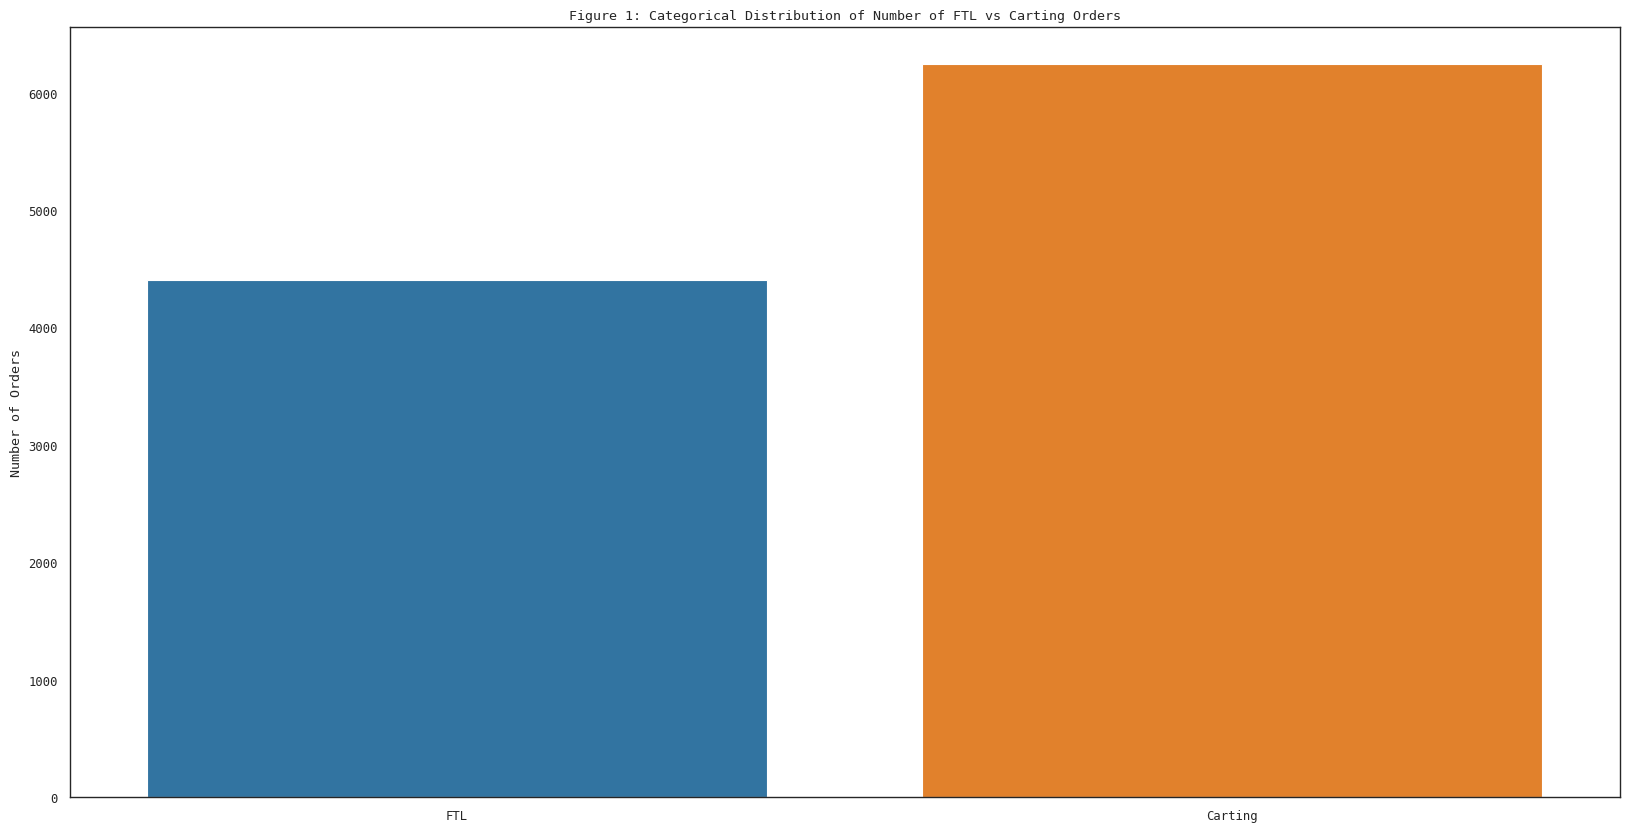

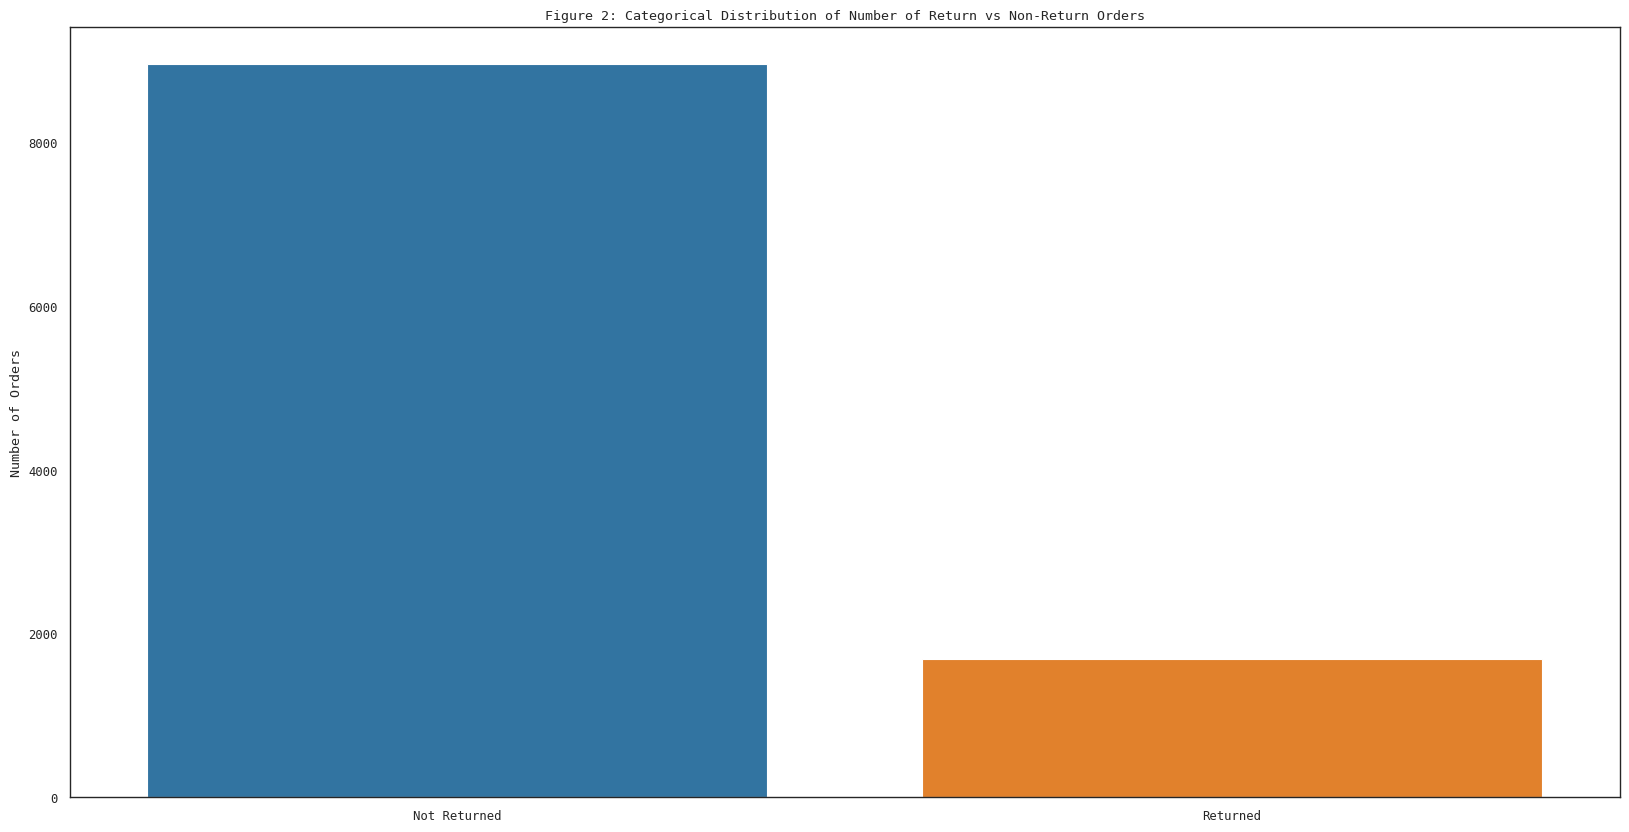

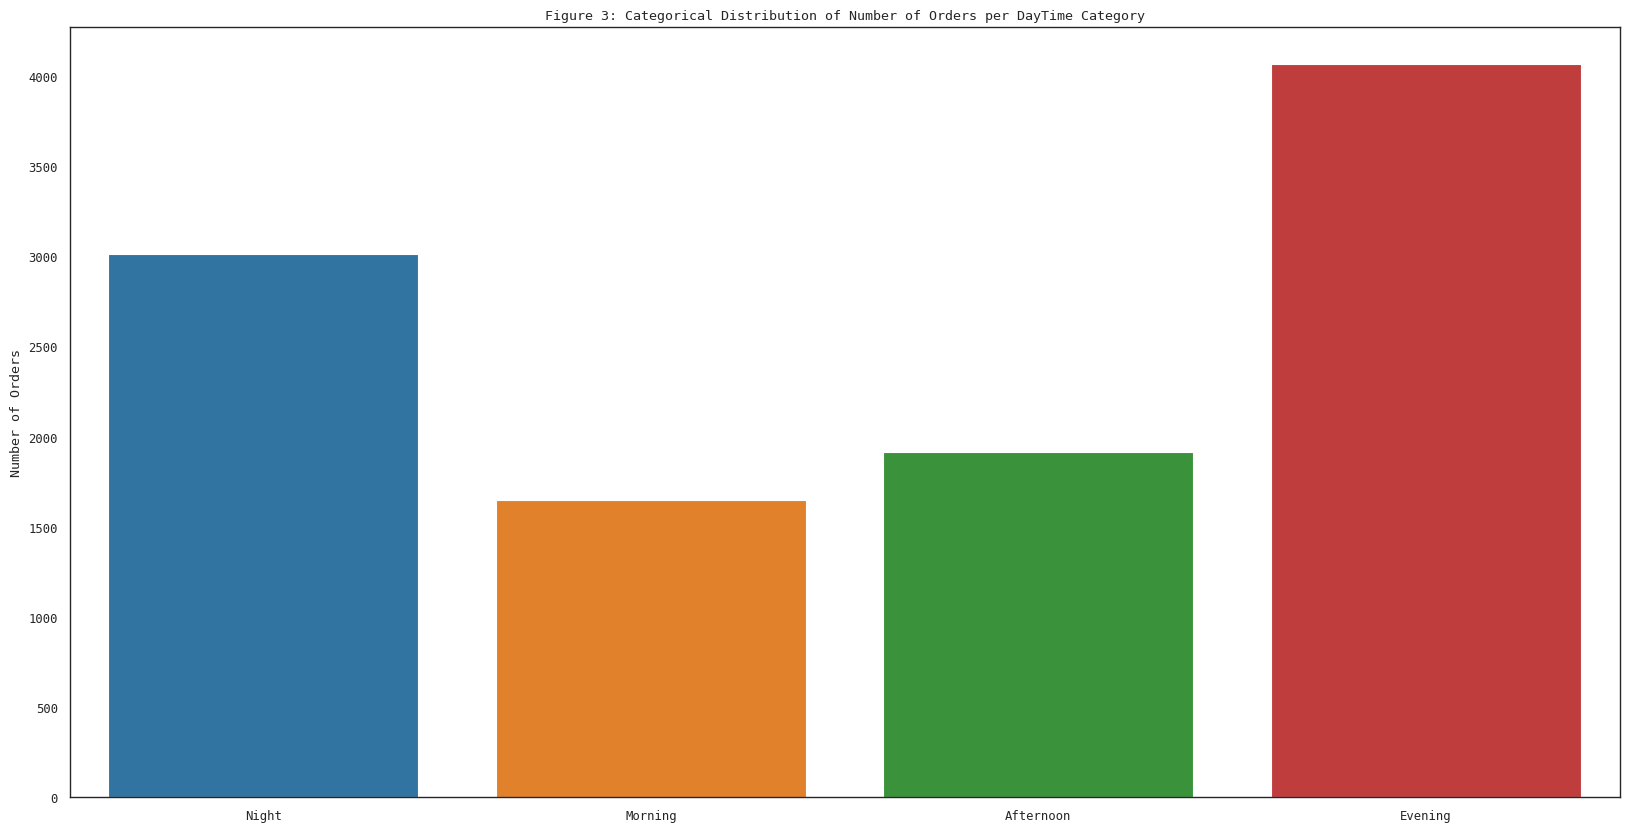

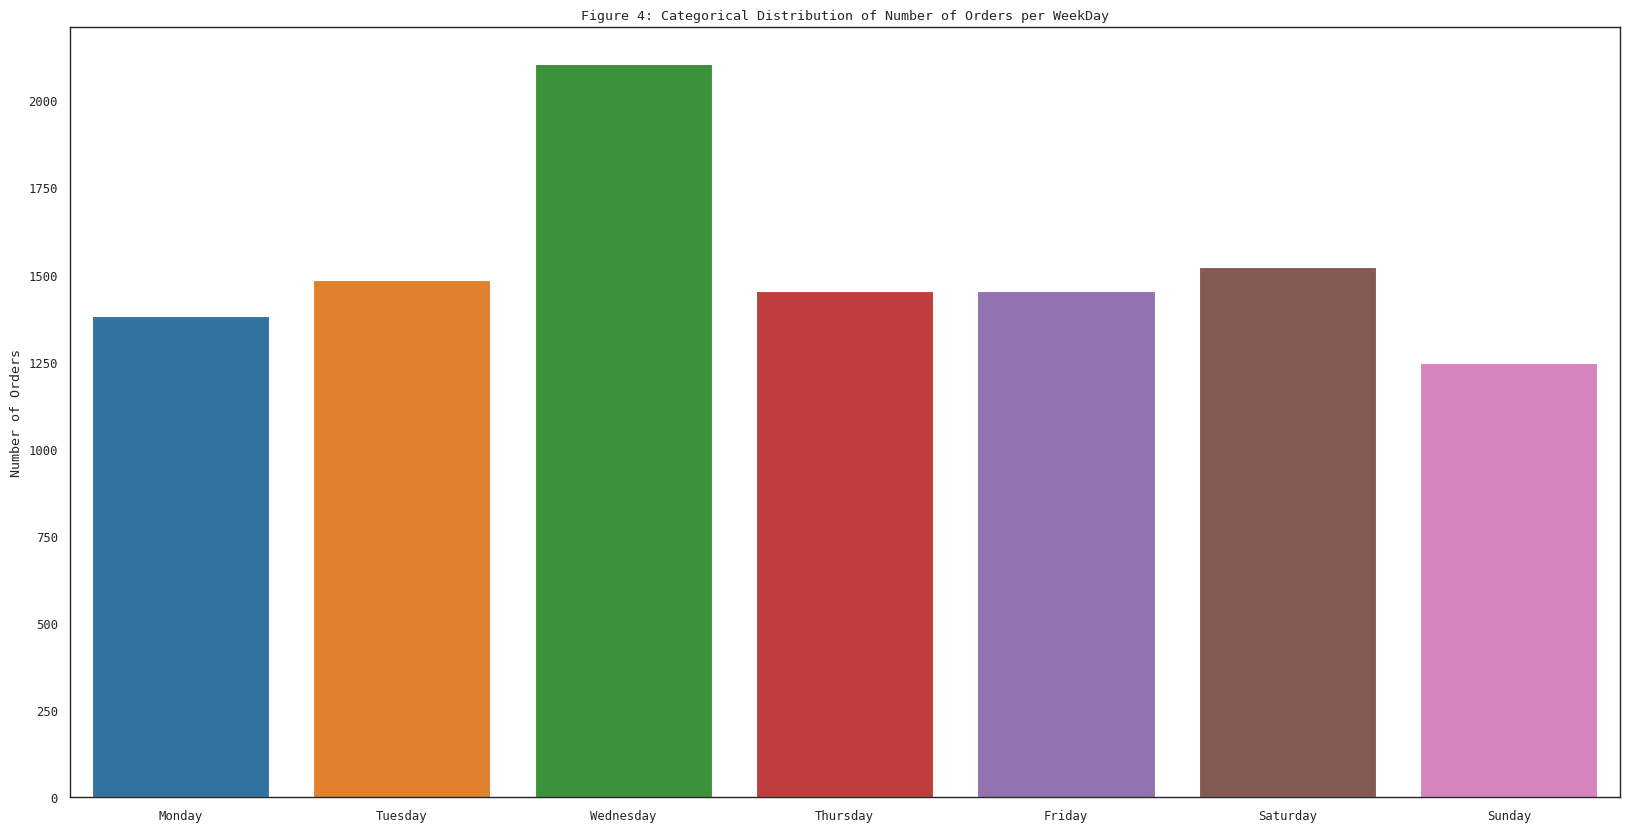

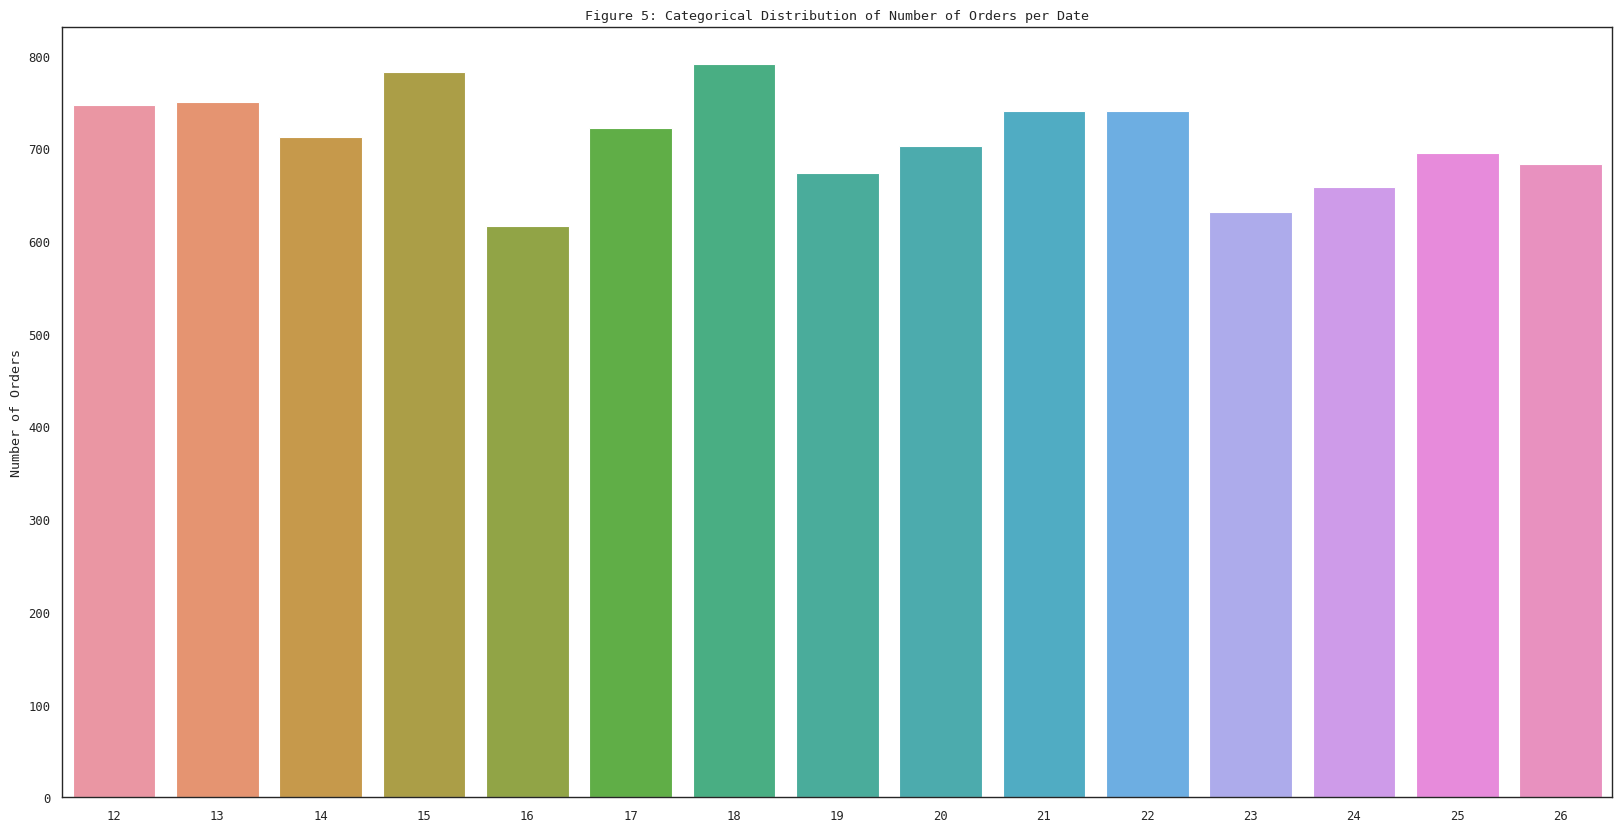

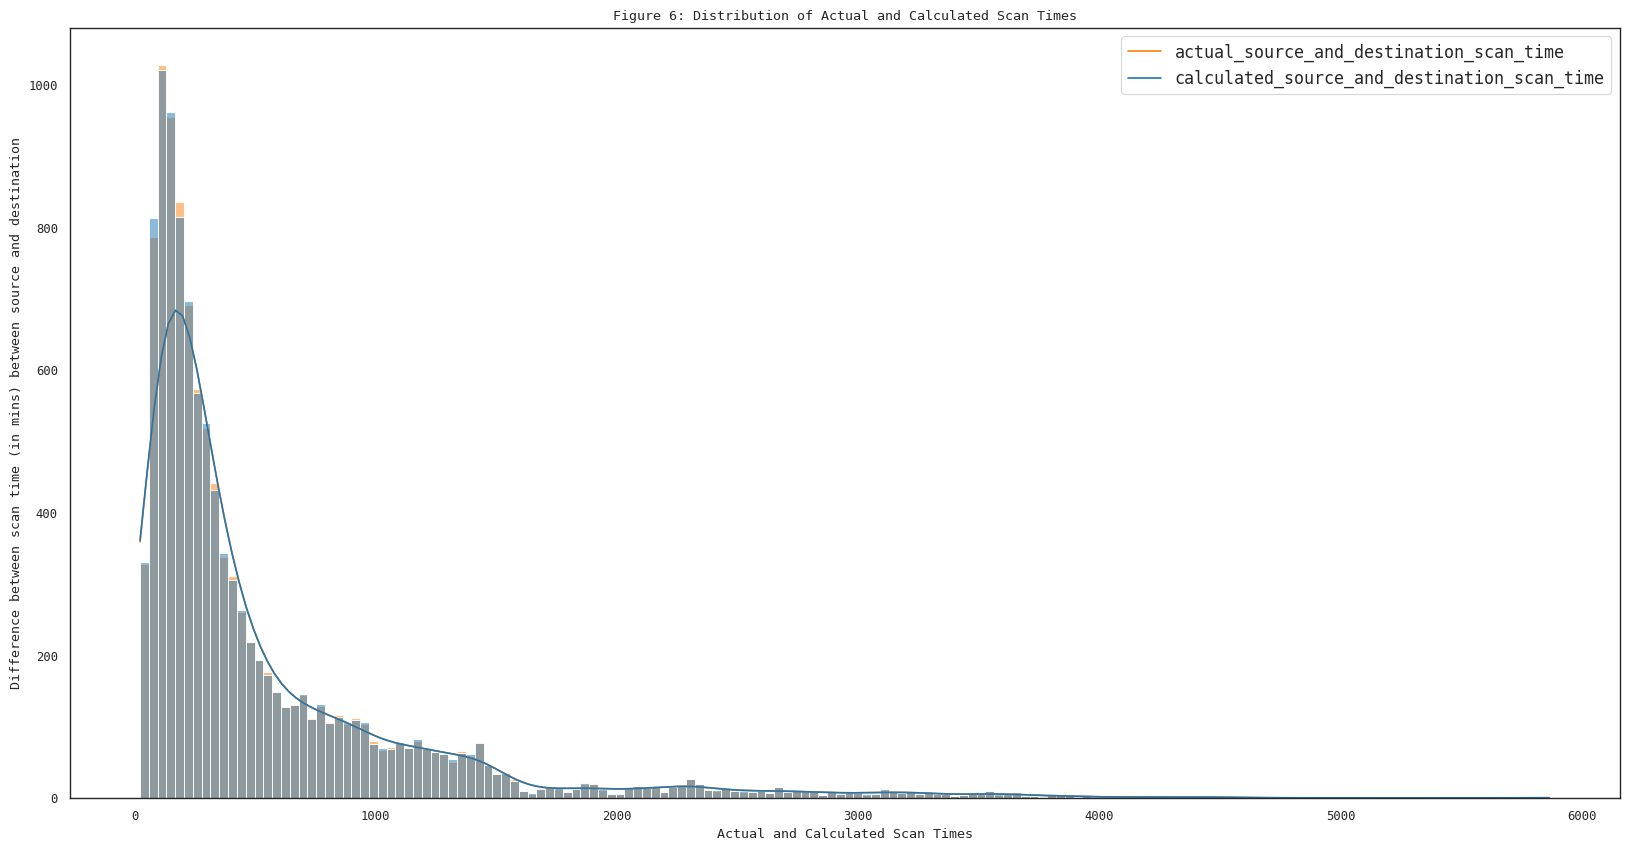

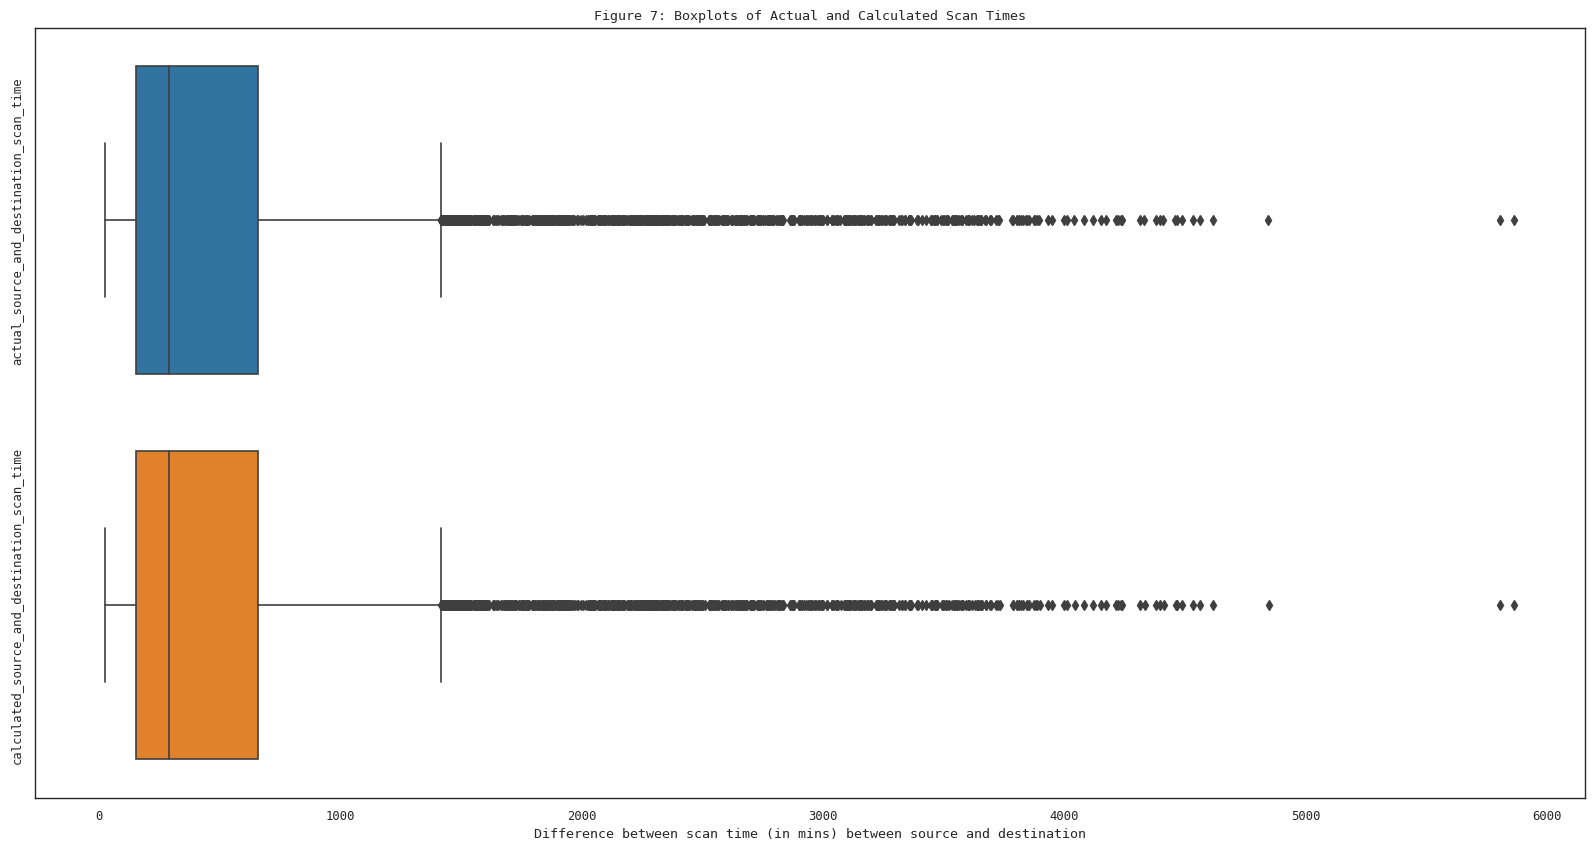

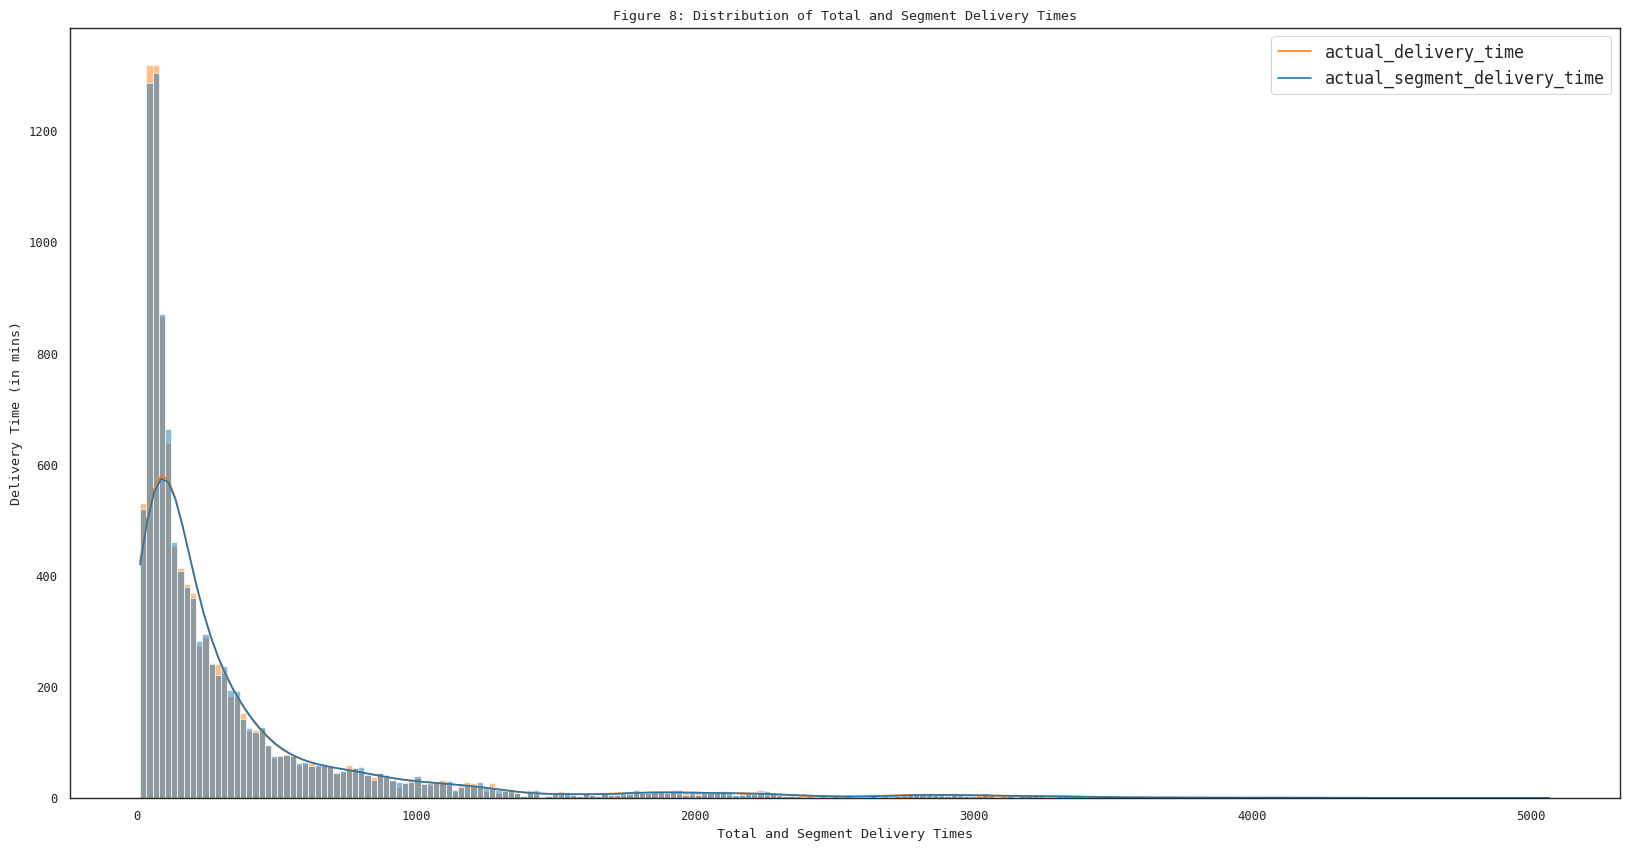

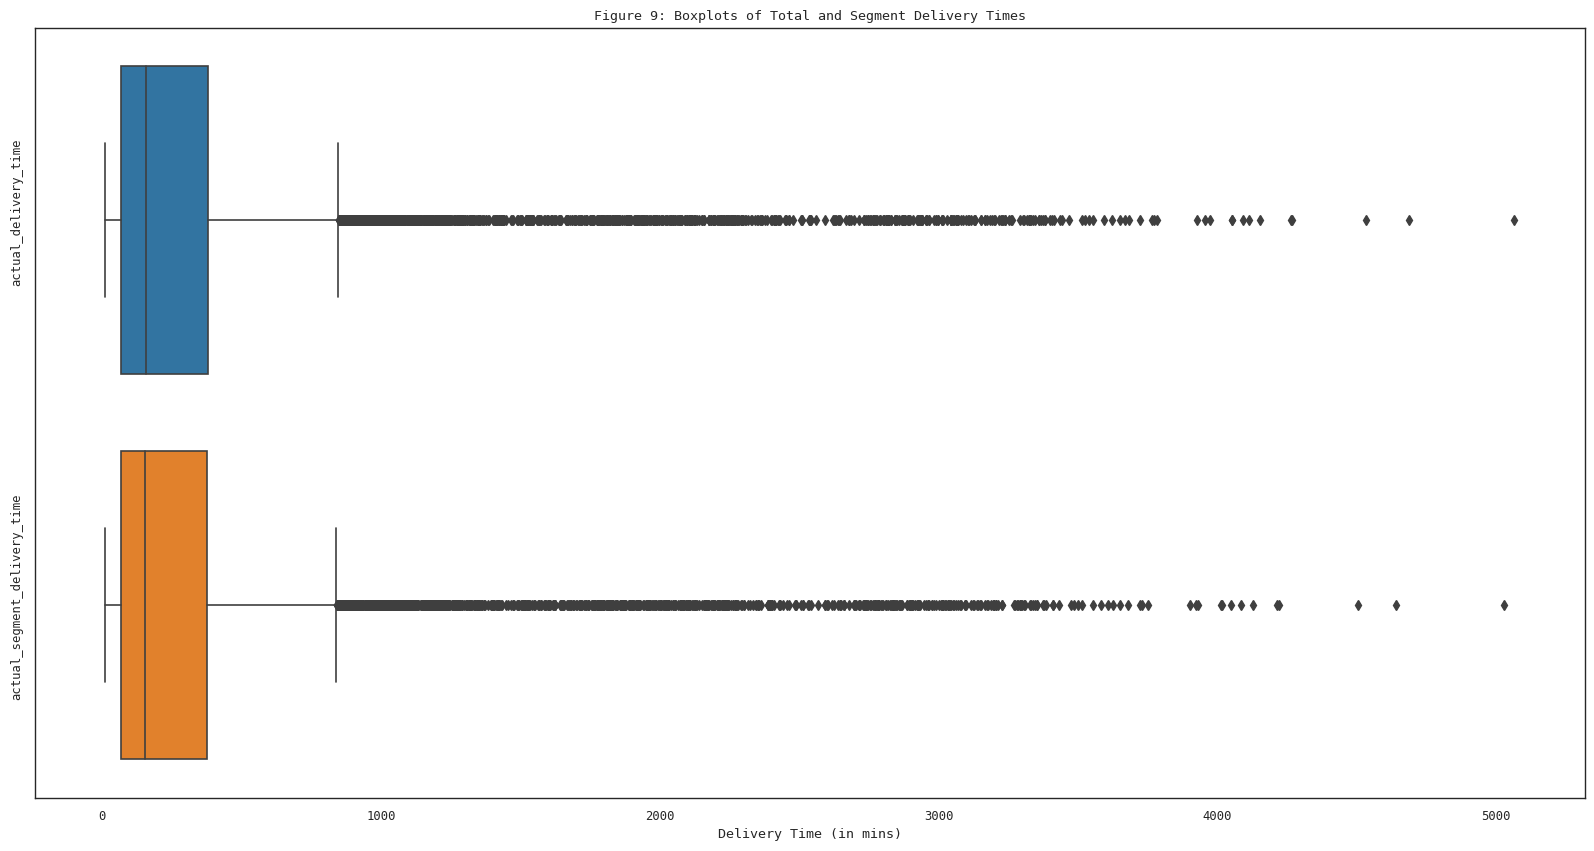

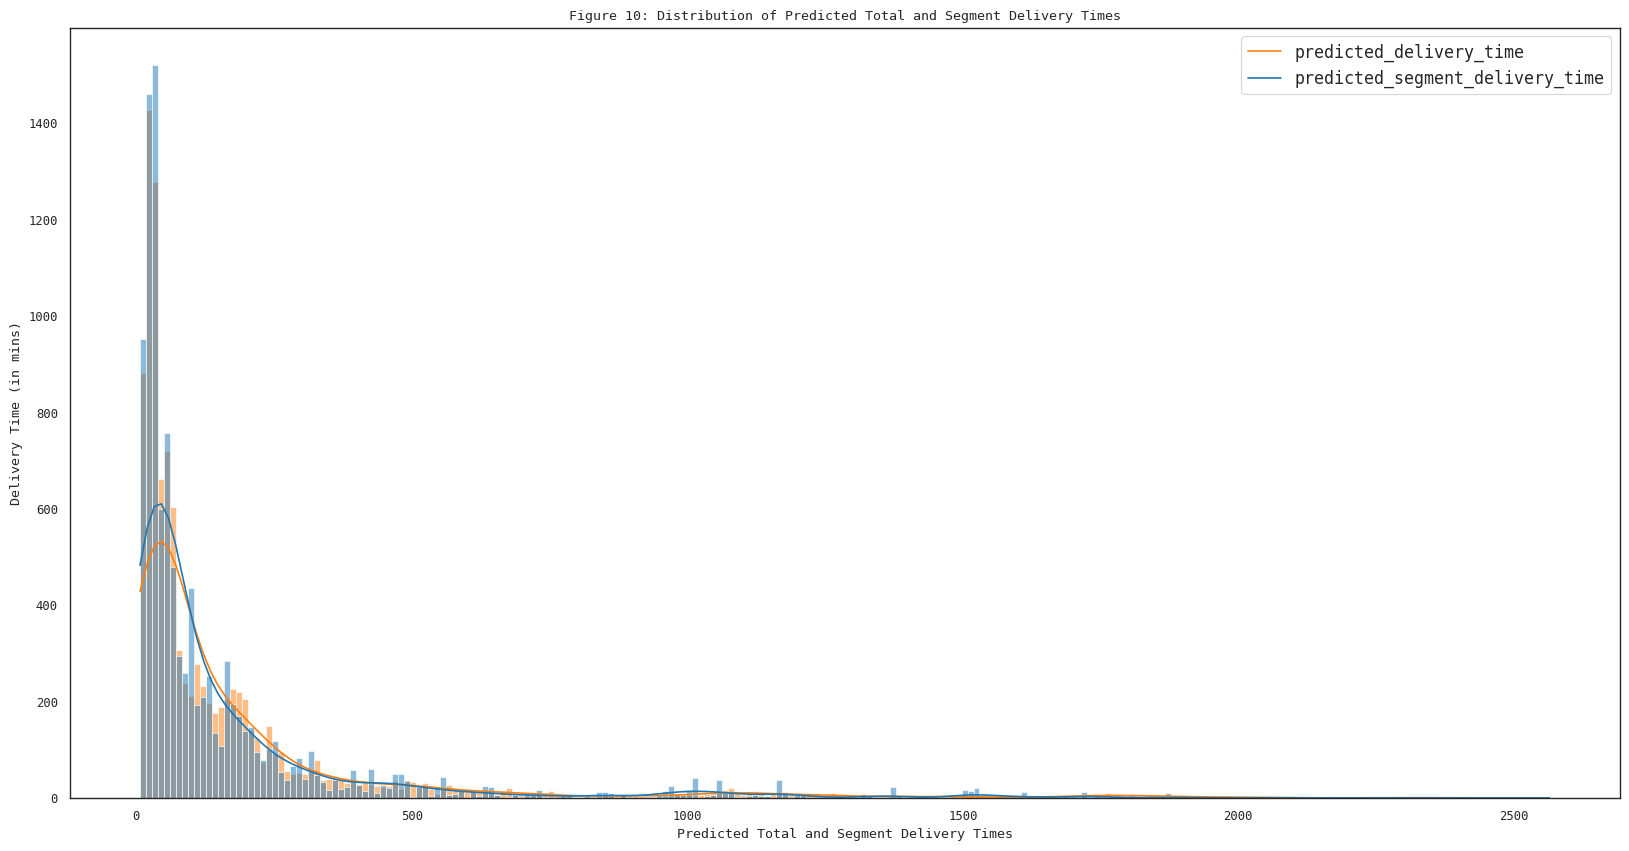

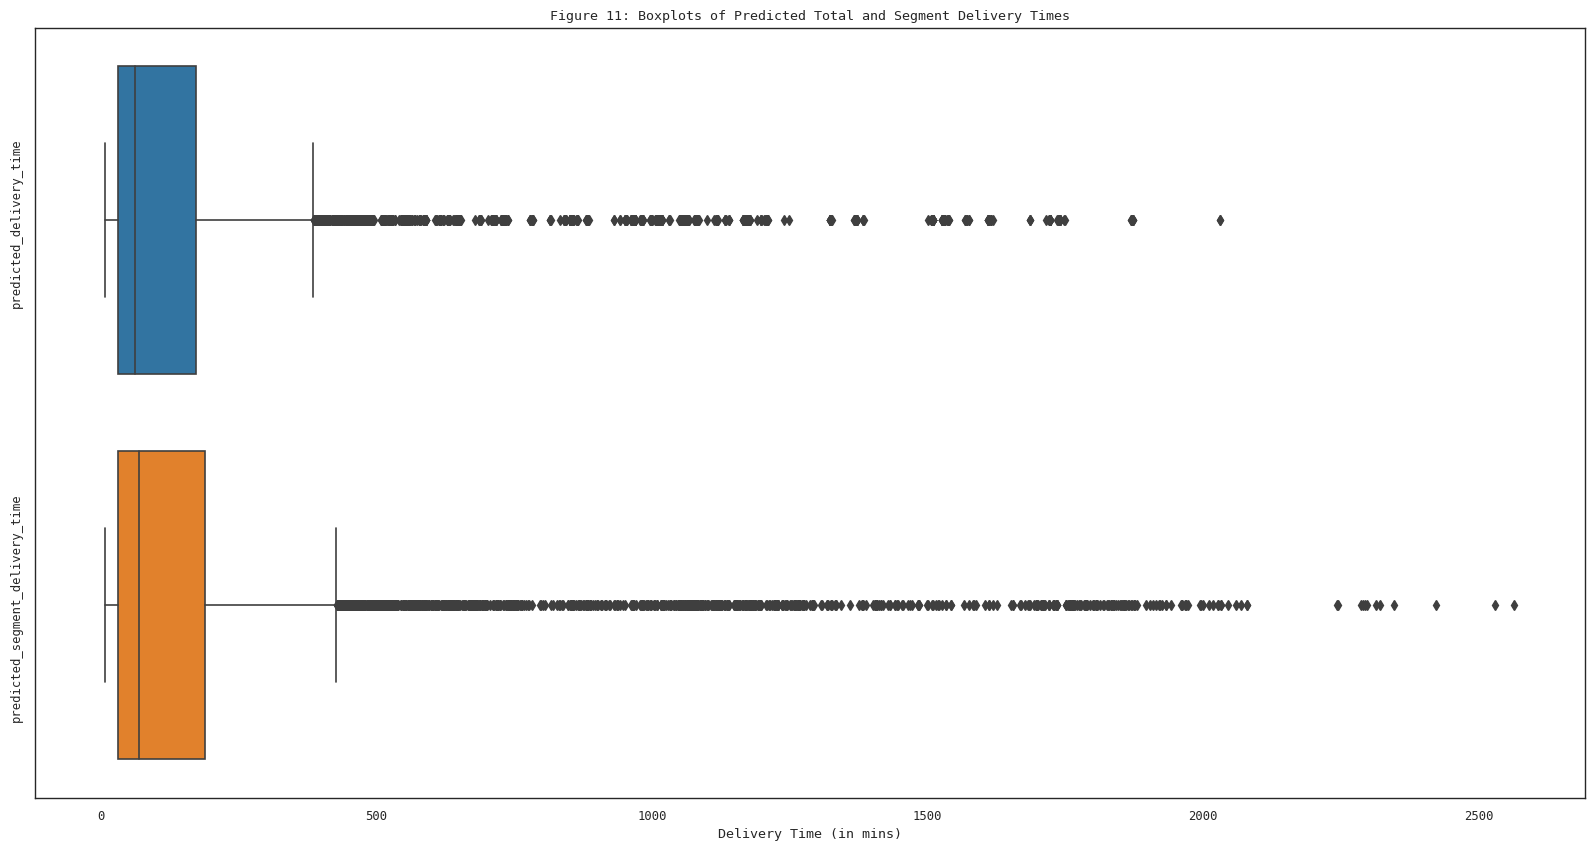

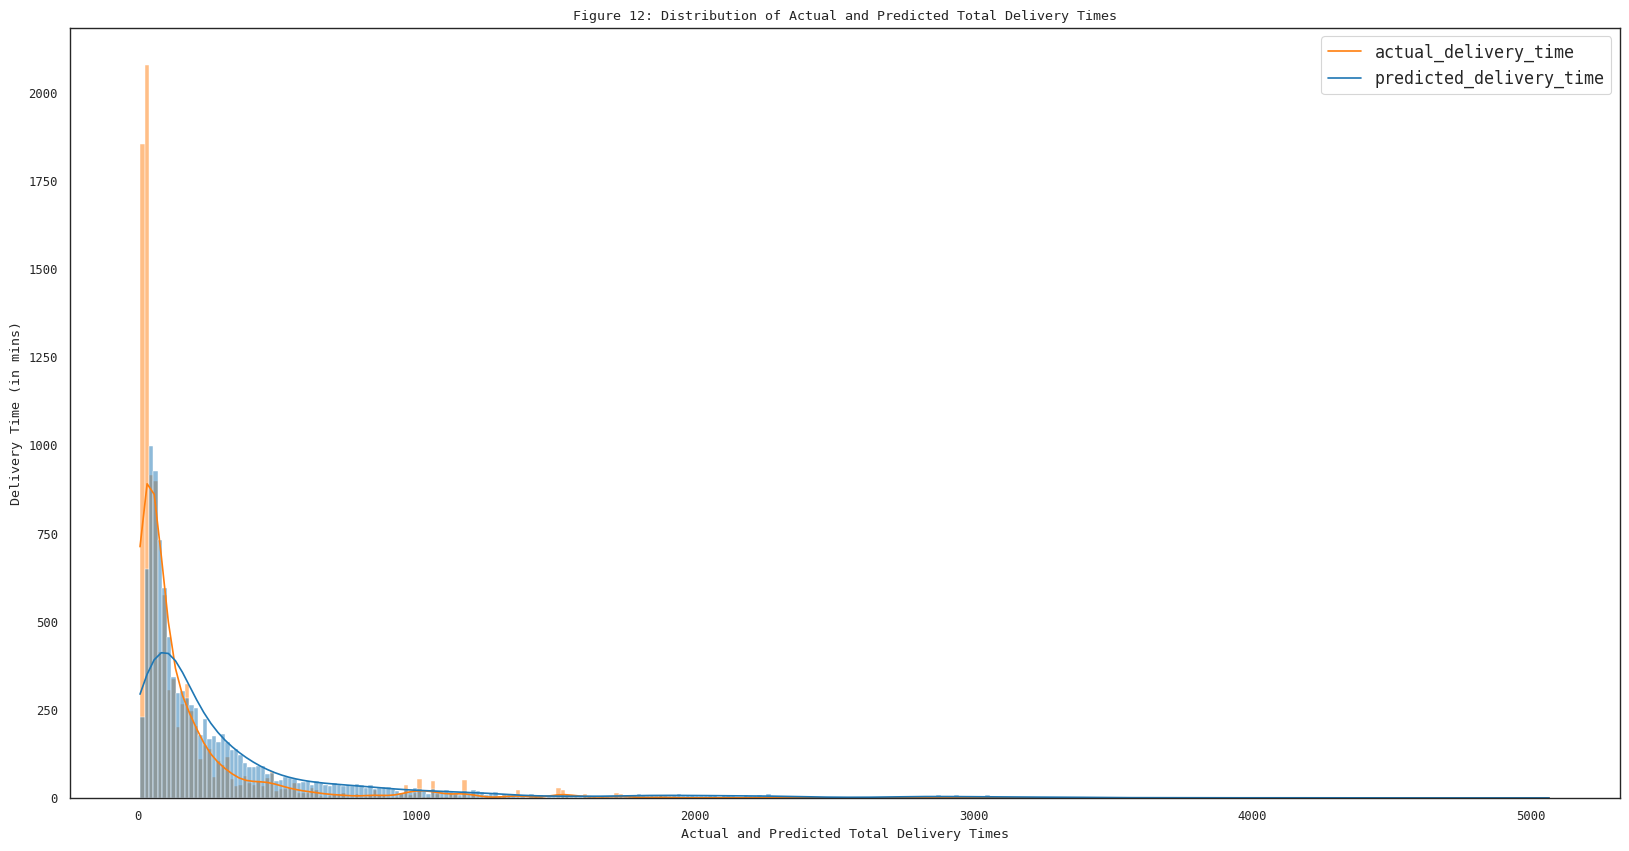

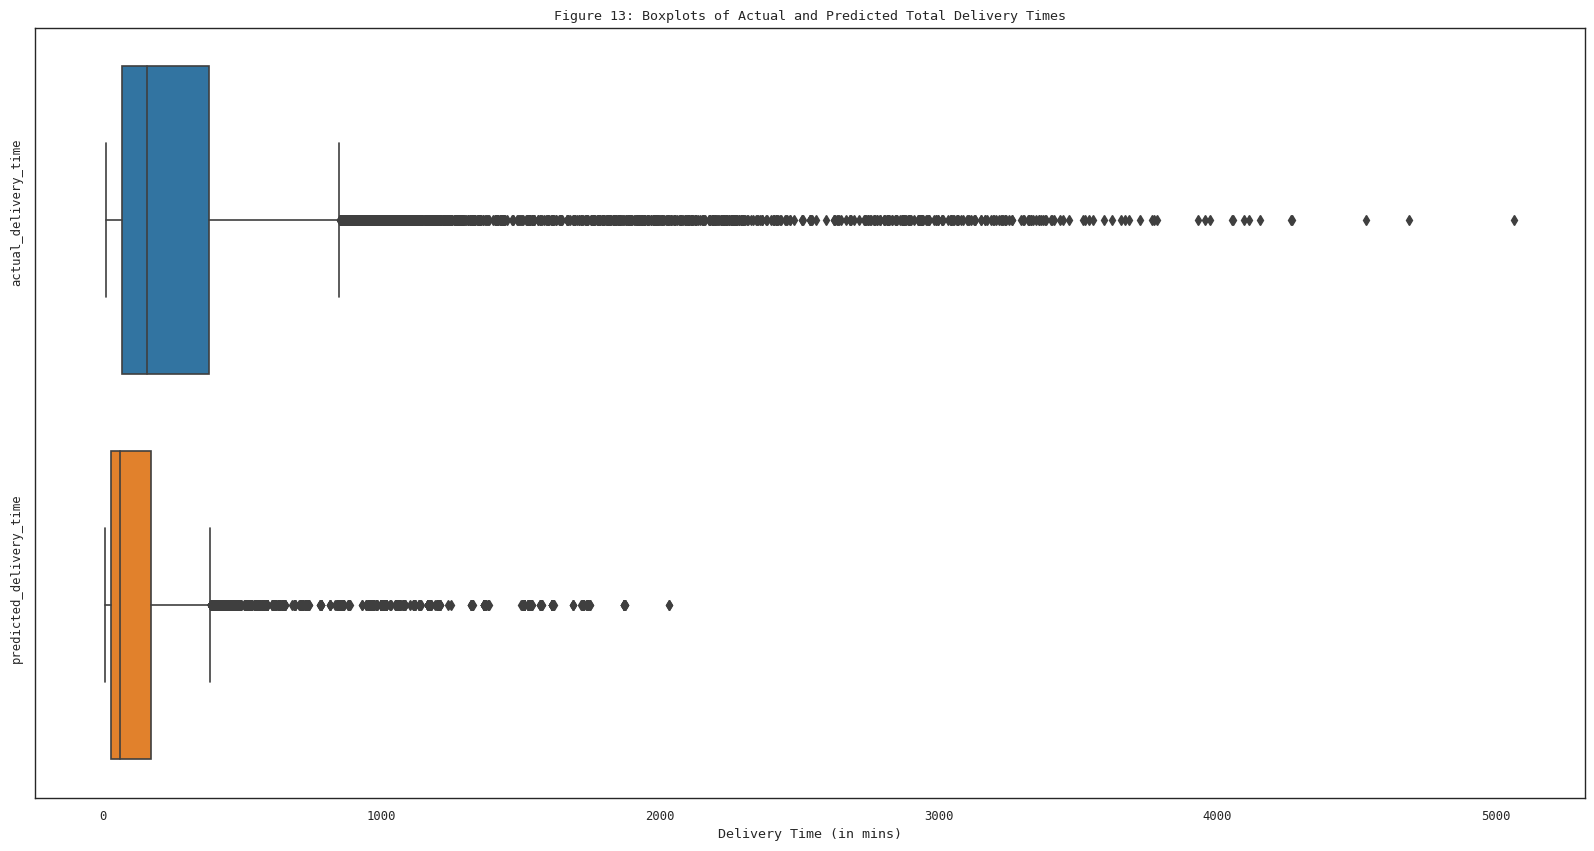

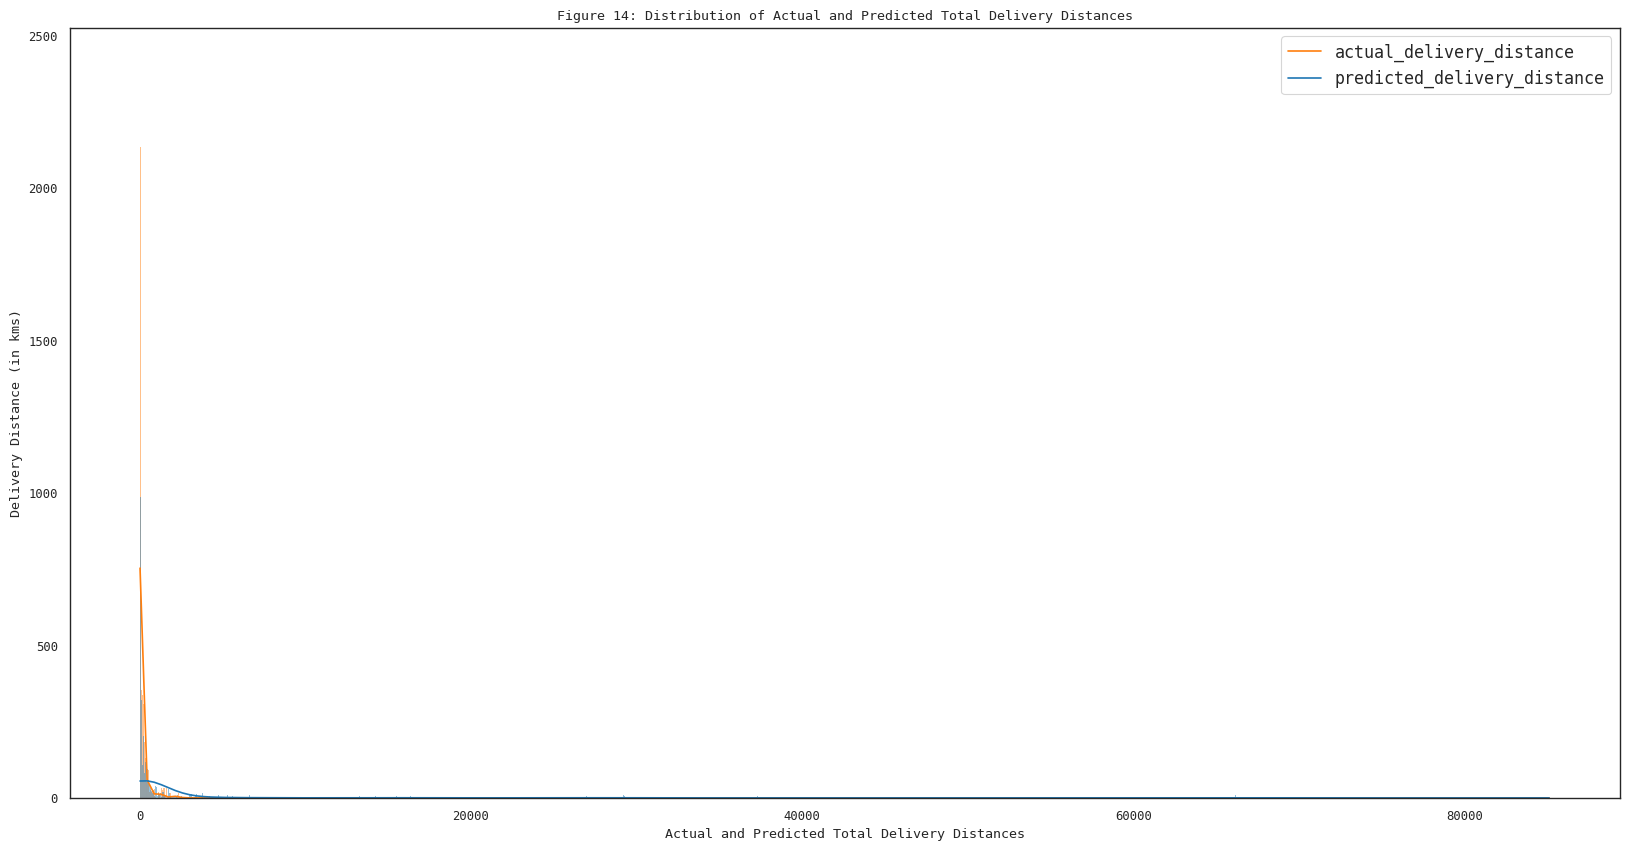

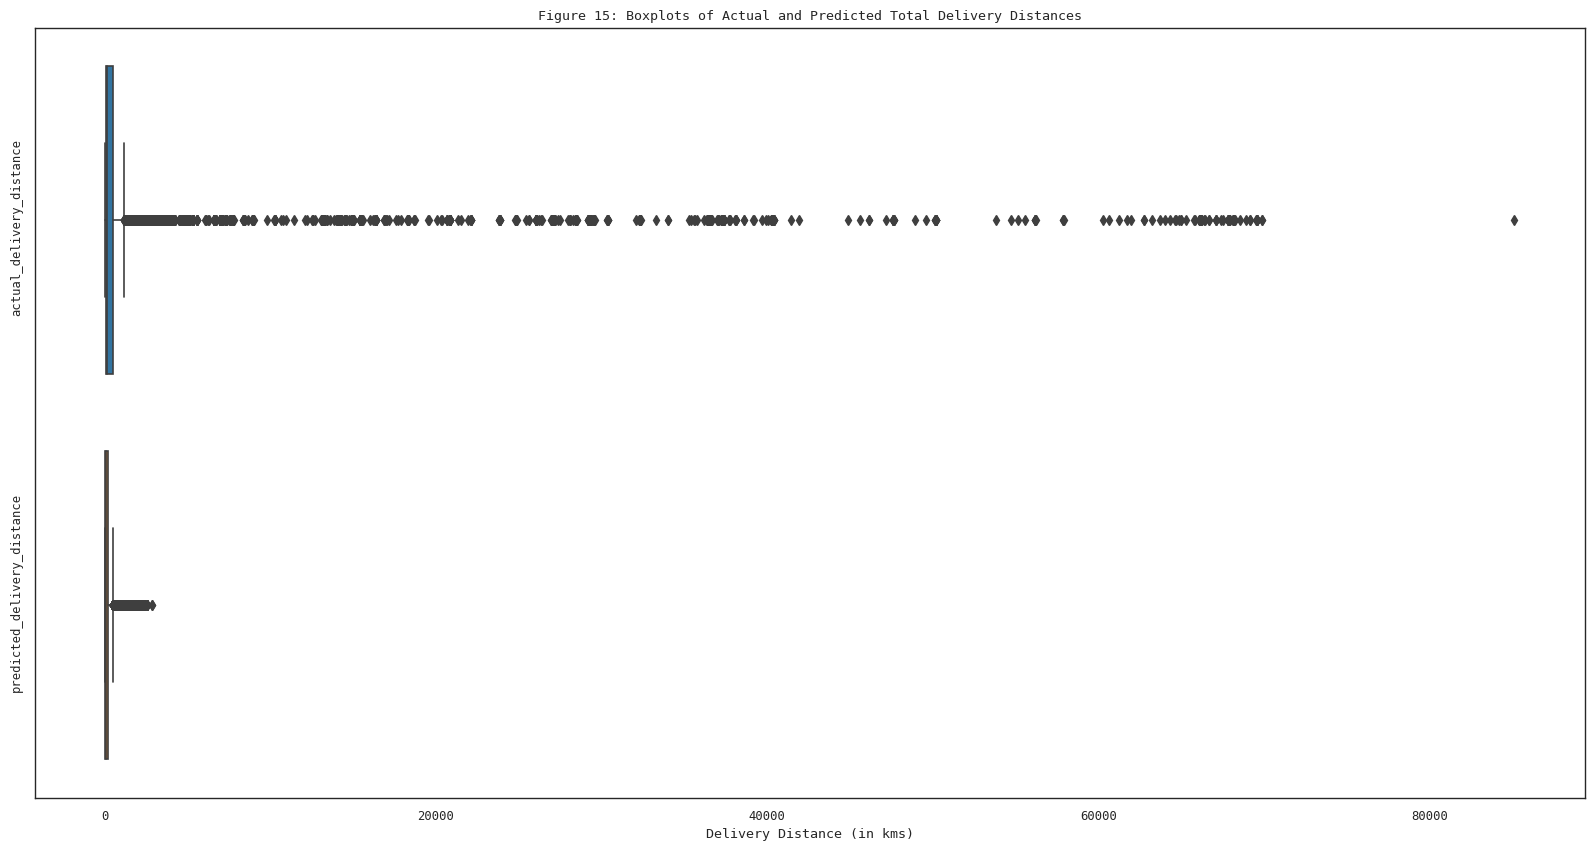

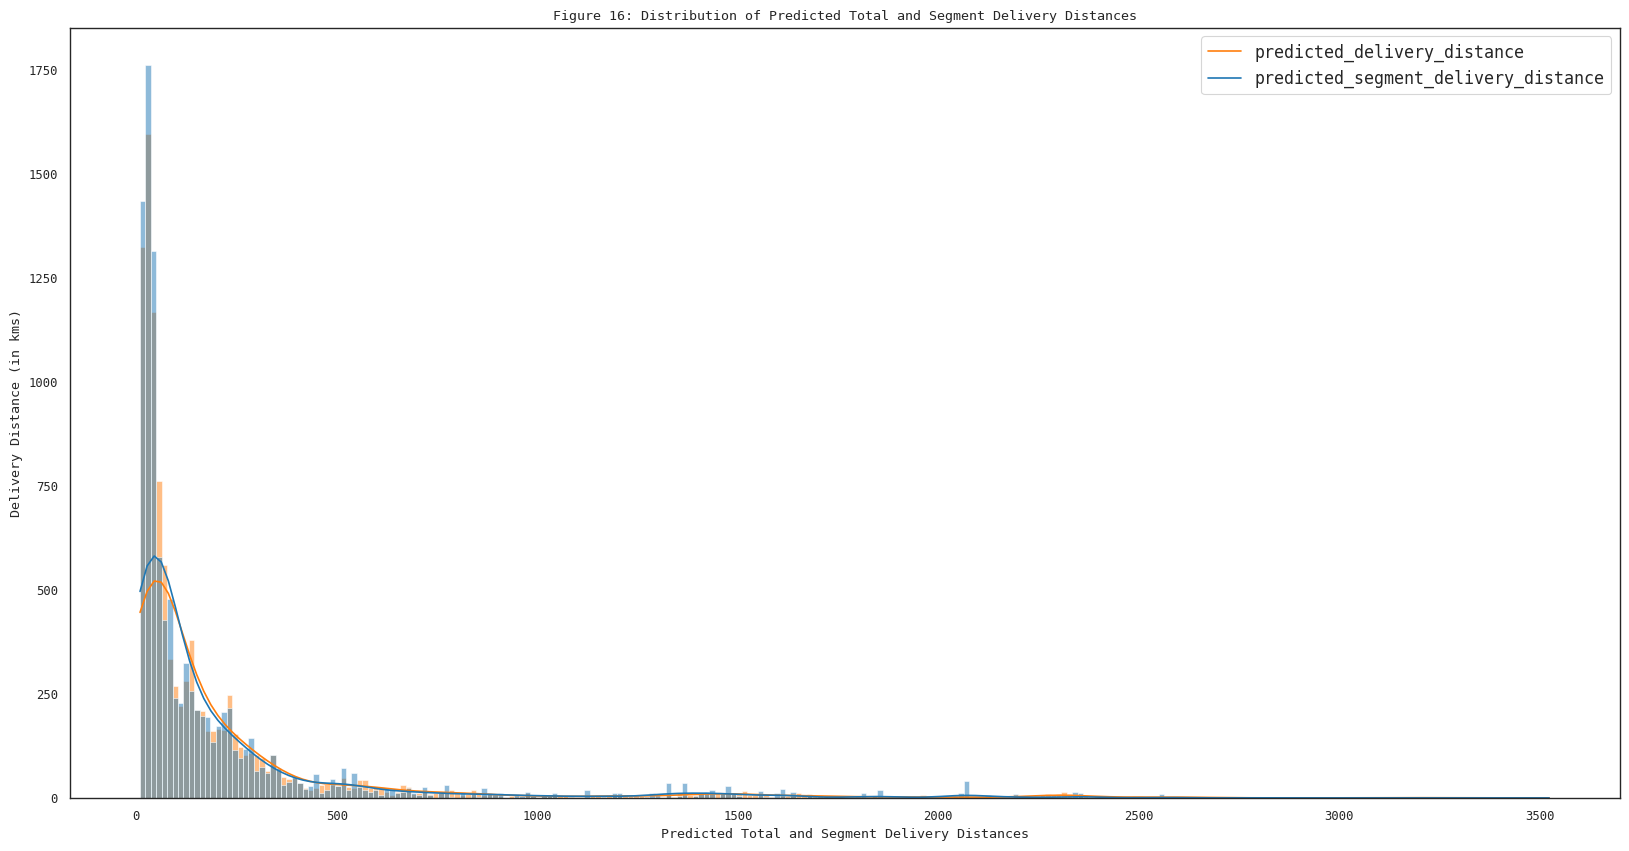

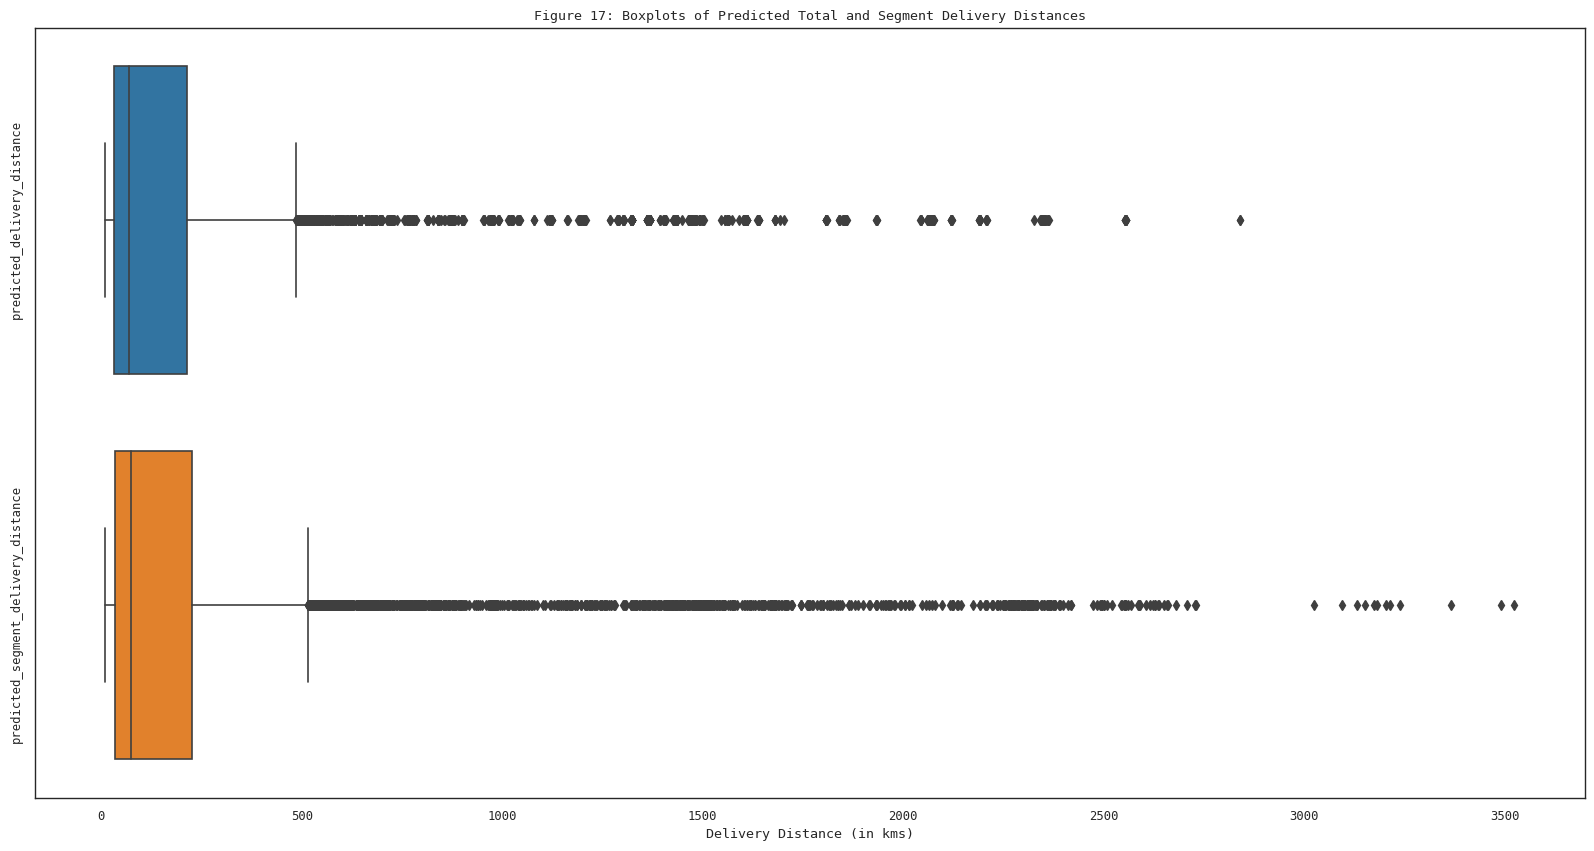

In [43]:
fig_num += 1
plot_countplot(
    final_train_df['route_type'],
    'Number of FTL vs Carting Orders',
    fig_num,
    'Number of Orders',
    xticks=[[0, 1], ['FTL', 'Carting']]
)    

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_train_df['return_order'],
    'Number of Return vs Non-Return Orders',
    fig_num,
    'Number of Orders',
    xticks=[[0, 1], ['Not Returned', 'Returned']]
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_train_df['trip_creation_daytime_category'],
    'Number of Orders per DayTime Category',
    fig_num,
    'Number of Orders',
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_train_df['trip_creation_day_of_week'],
    'Number of Orders per WeekDay',
    fig_num,
    'Number of Orders',
    [[0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_train_df['trip_creation_date'],
    'Number of Orders per Date',
    fig_num,
    'Number of Orders',
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time']],
    'Actual and Calculated Scan Times',
    fig_num,
    'Difference between scan time (in mins) between source and destination'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time']],
    'Actual and Calculated Scan Times',
    fig_num,
    'Difference between scan time (in mins) between source and destination',
    [-0.36, 0.60]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['actual_delivery_time', 'actual_segment_delivery_time']],
    'Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['actual_delivery_time', 'actual_segment_delivery_time']],
    'Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['predicted_delivery_time', 'predicted_segment_delivery_time']],
    'Predicted Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['predicted_delivery_time', 'predicted_segment_delivery_time']],
    'Predicted Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['actual_delivery_time', 'predicted_delivery_time']],
    'Actual and Predicted Total Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['actual_delivery_time', 'predicted_delivery_time']],
    'Actual and Predicted Total Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['actual_delivery_distance', 'predicted_delivery_distance']],
    'Actual and Predicted Total Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['actual_delivery_distance', 'predicted_delivery_distance']],
    'Actual and Predicted Total Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_train_df[['predicted_delivery_distance', 'predicted_segment_delivery_distance']],
    'Predicted Total and Segment Delivery Distances',

    fig_num,
    'Delivery Distance (in kms)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_train_df[['predicted_delivery_distance', 'predicted_segment_delivery_distance']],
    'Predicted Total and Segment Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)',
    [-0.25, 0.70]
)

<span style="font-family: monospace">

<h3>Observations from the Visualizations on the Train Data:</h3>
    
    1. Figure 1: More trips with Carting route_type than FTL.
    2. Figure 2: Less than 20% of the orders are returned back to the source.
    3. Figure 3: Most of the trips started in Evening, with next highest in Night, followed by commensurate number of trips initiating in Morning and Afternoon.
    4. Figure 4: Most of the trips start on Wednesday, with lowest number starting on weekends.
    5. Figure 5: Almost equal number of trips initiating throughout the month except for the last week.
    6. Figure 6 and 7: Similar distributions, range, and outliers for actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.
    7. Figure 8 and 9: Almost similar distributions, range, and outliers for actual_delivery_time and actual_segment_delivery_time.
    8. Figure 10 and 11: Slight variation in distributions, range, and outliers for predicted_delivery_time and predicted_segment_delivery_time.
    9. Figure 12 and 13: High variation in distributions, range, and outliers for actual_delivery_time and predicted_delivery_time.
    10. Figure 14 and 15: High variation in distributions, range, and outliers for actual_delivery_distance and predicted_delivery_distance.
    11. Figure 16 and 17: High variation in distributions, range, and outliers for predicted_delivery_distance and predicted_segment_delivery_distance.

</span>

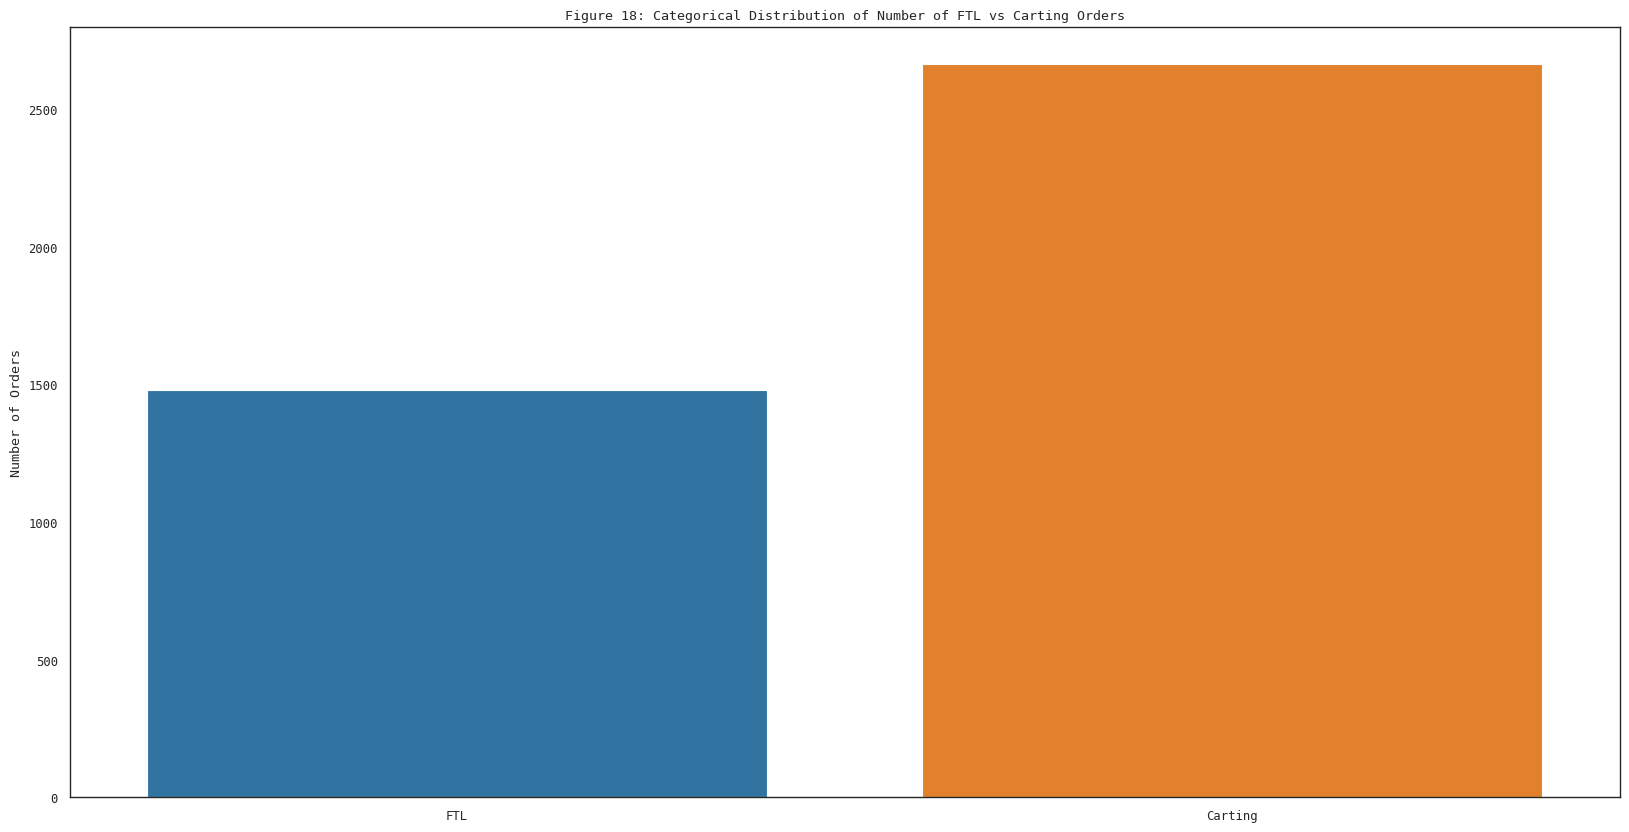

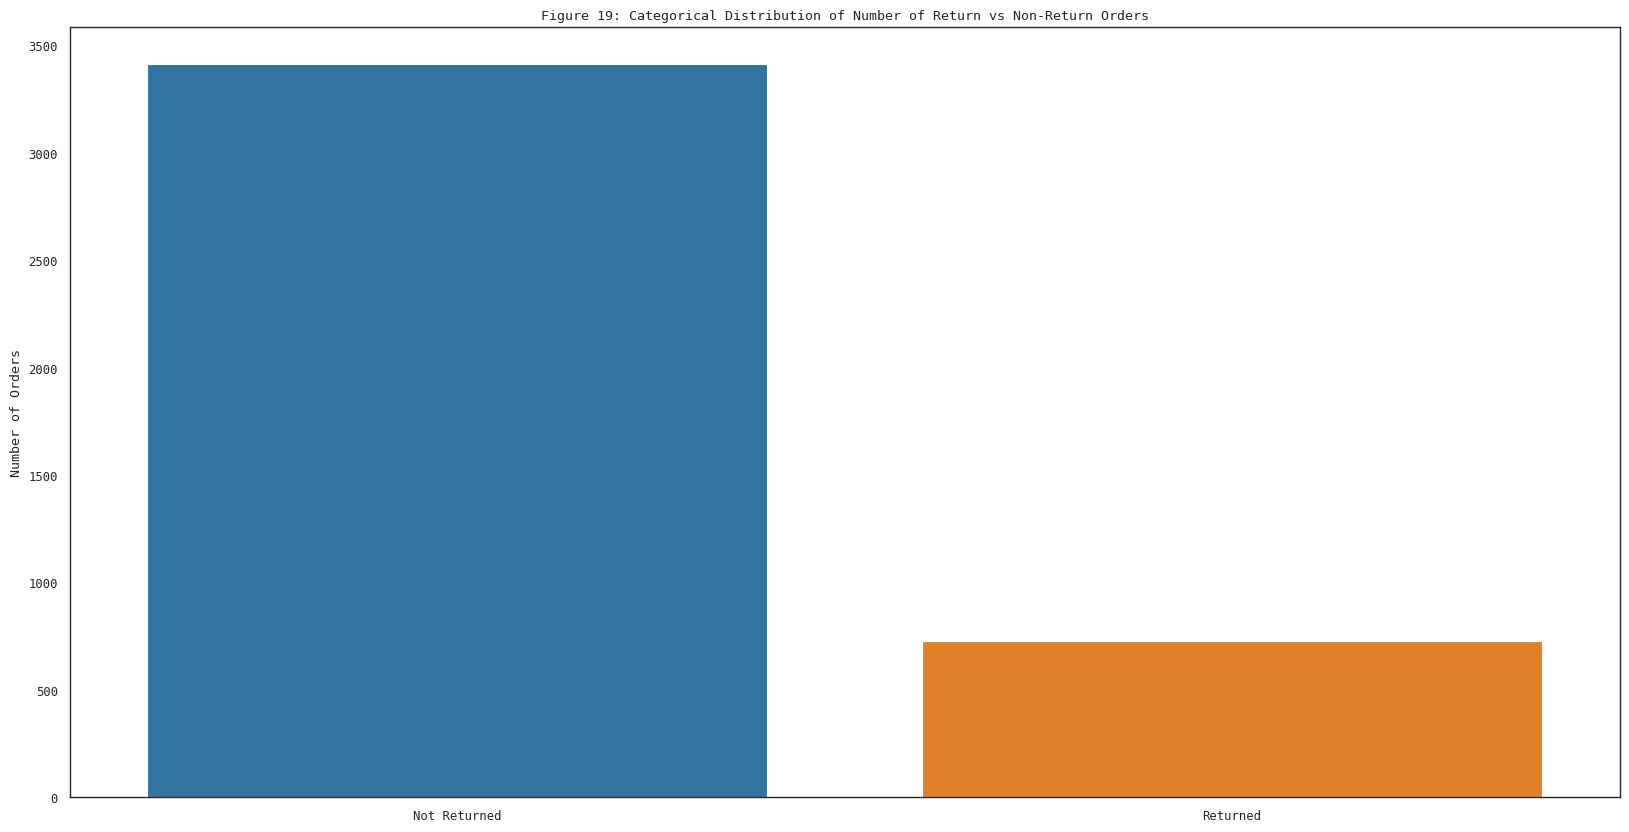

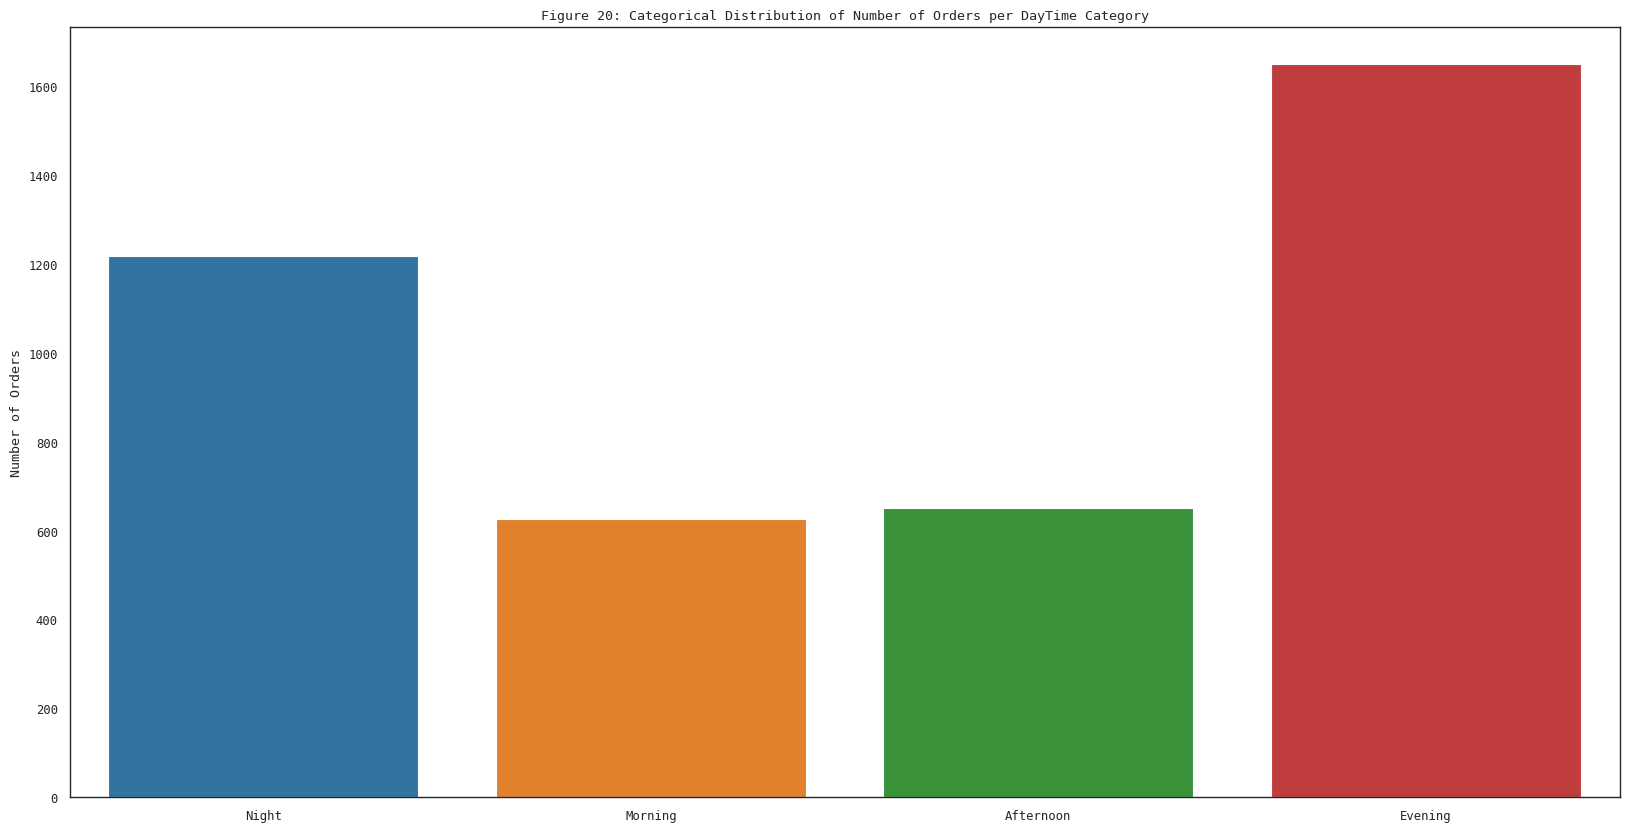

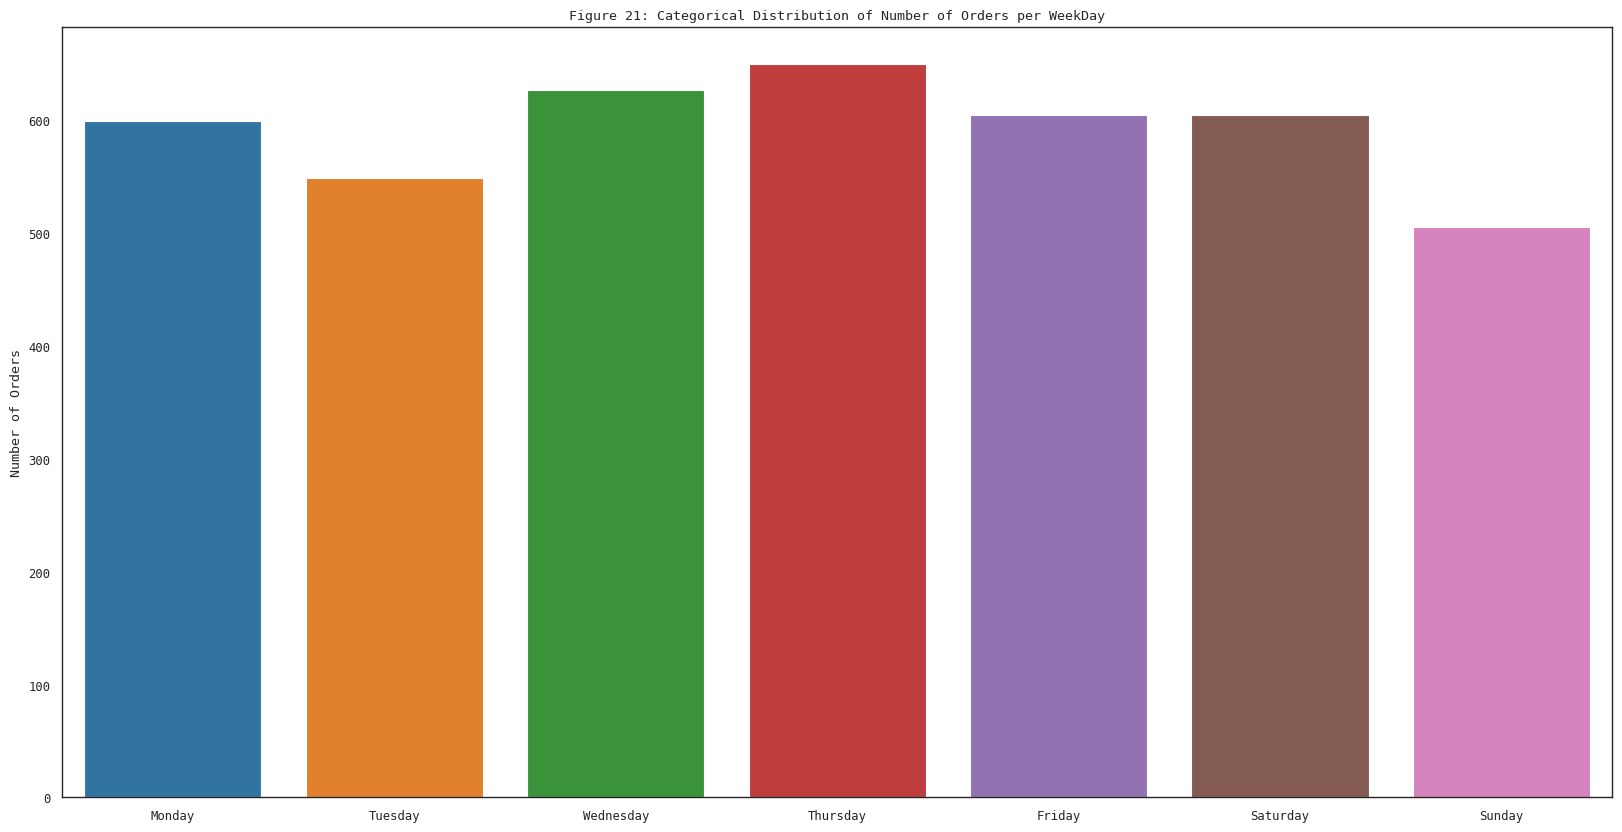

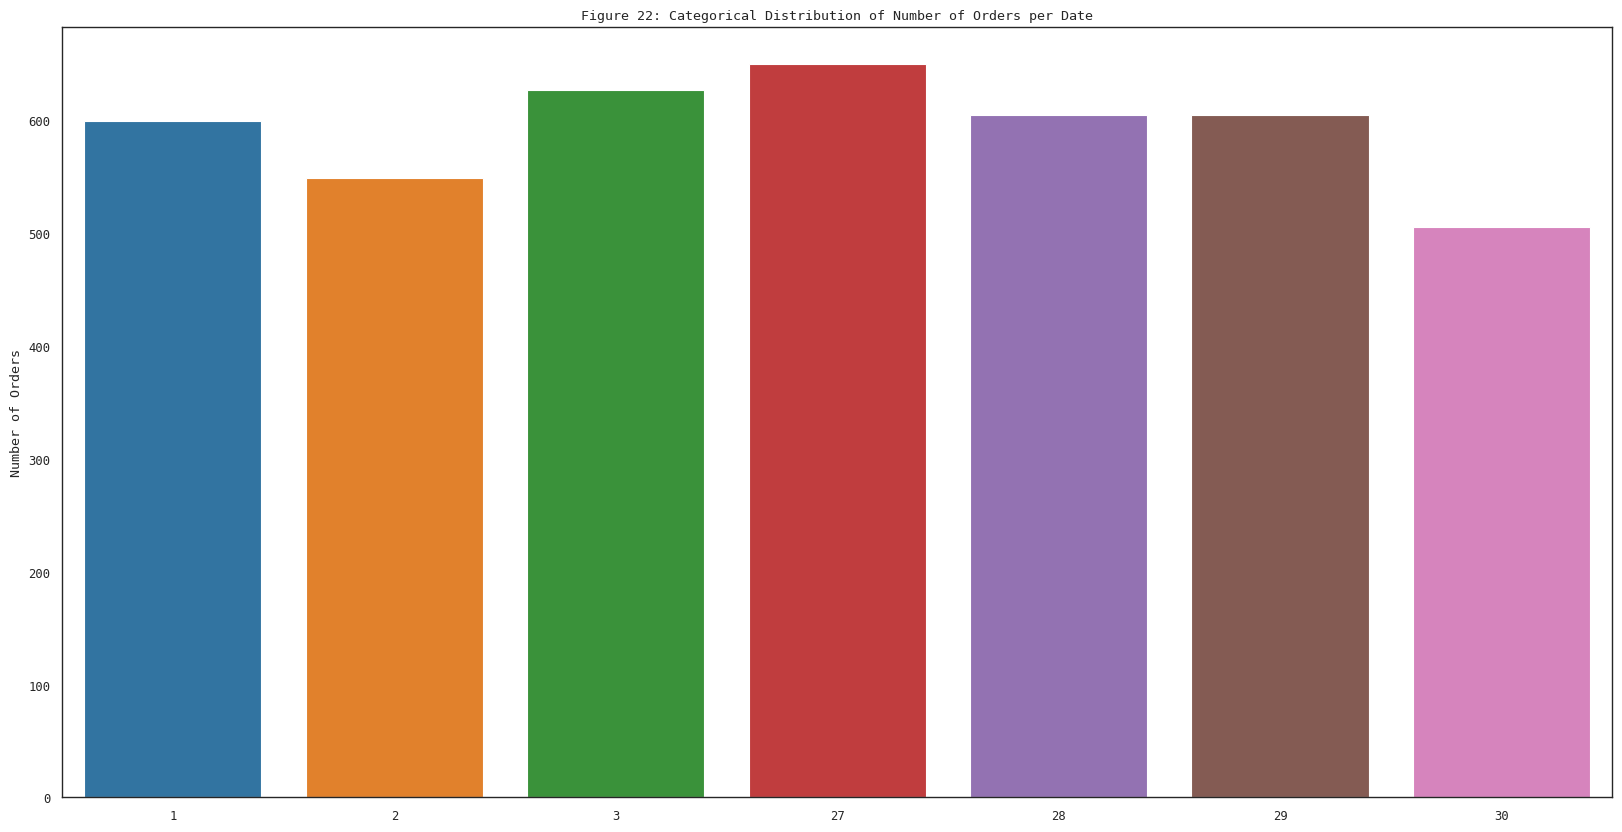

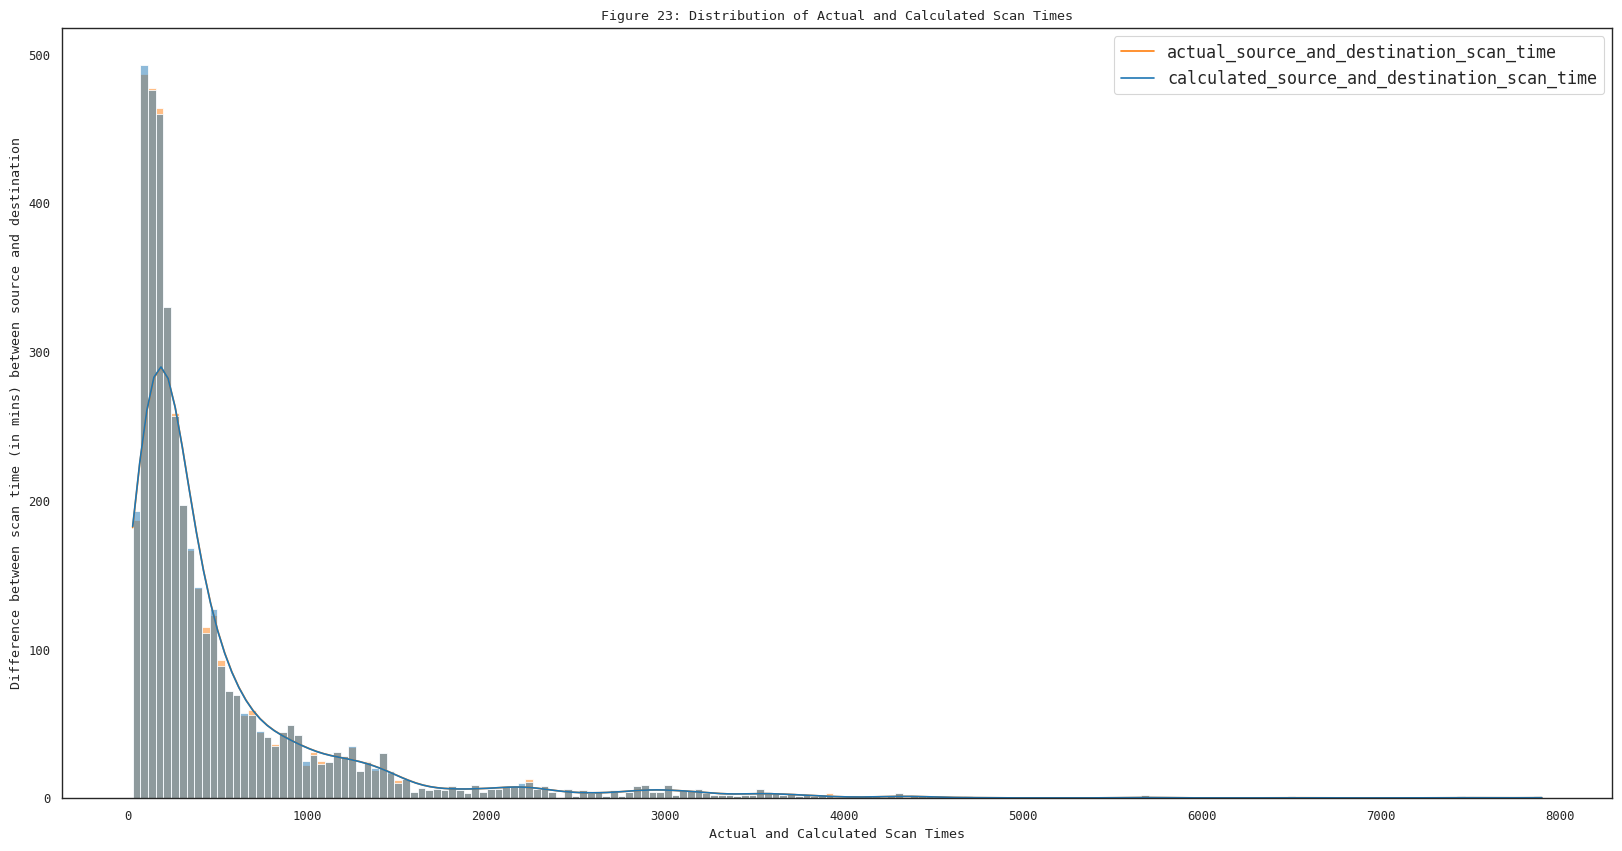

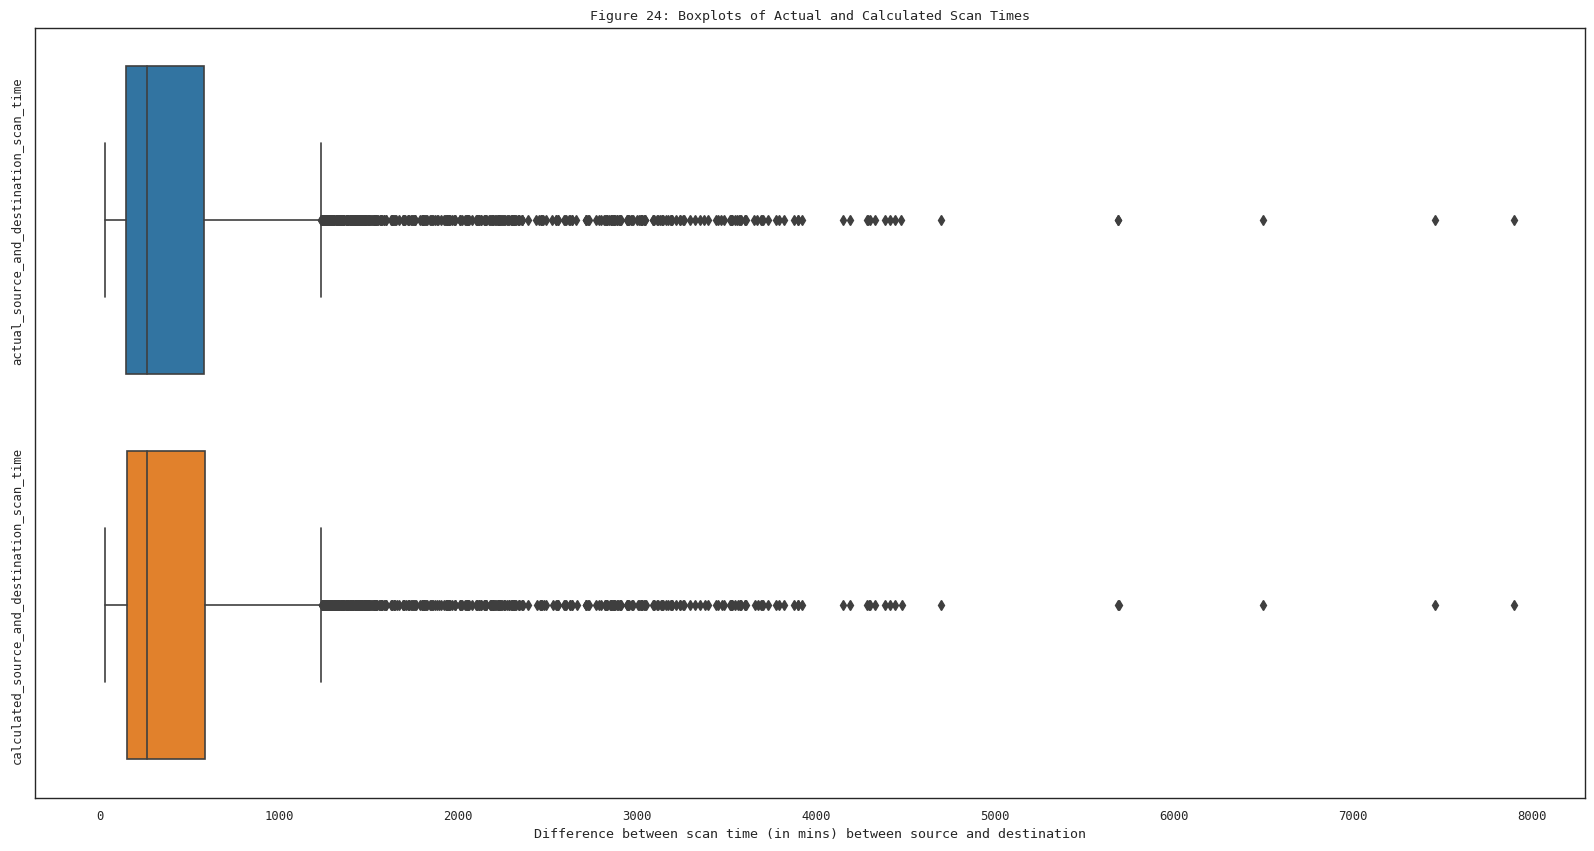

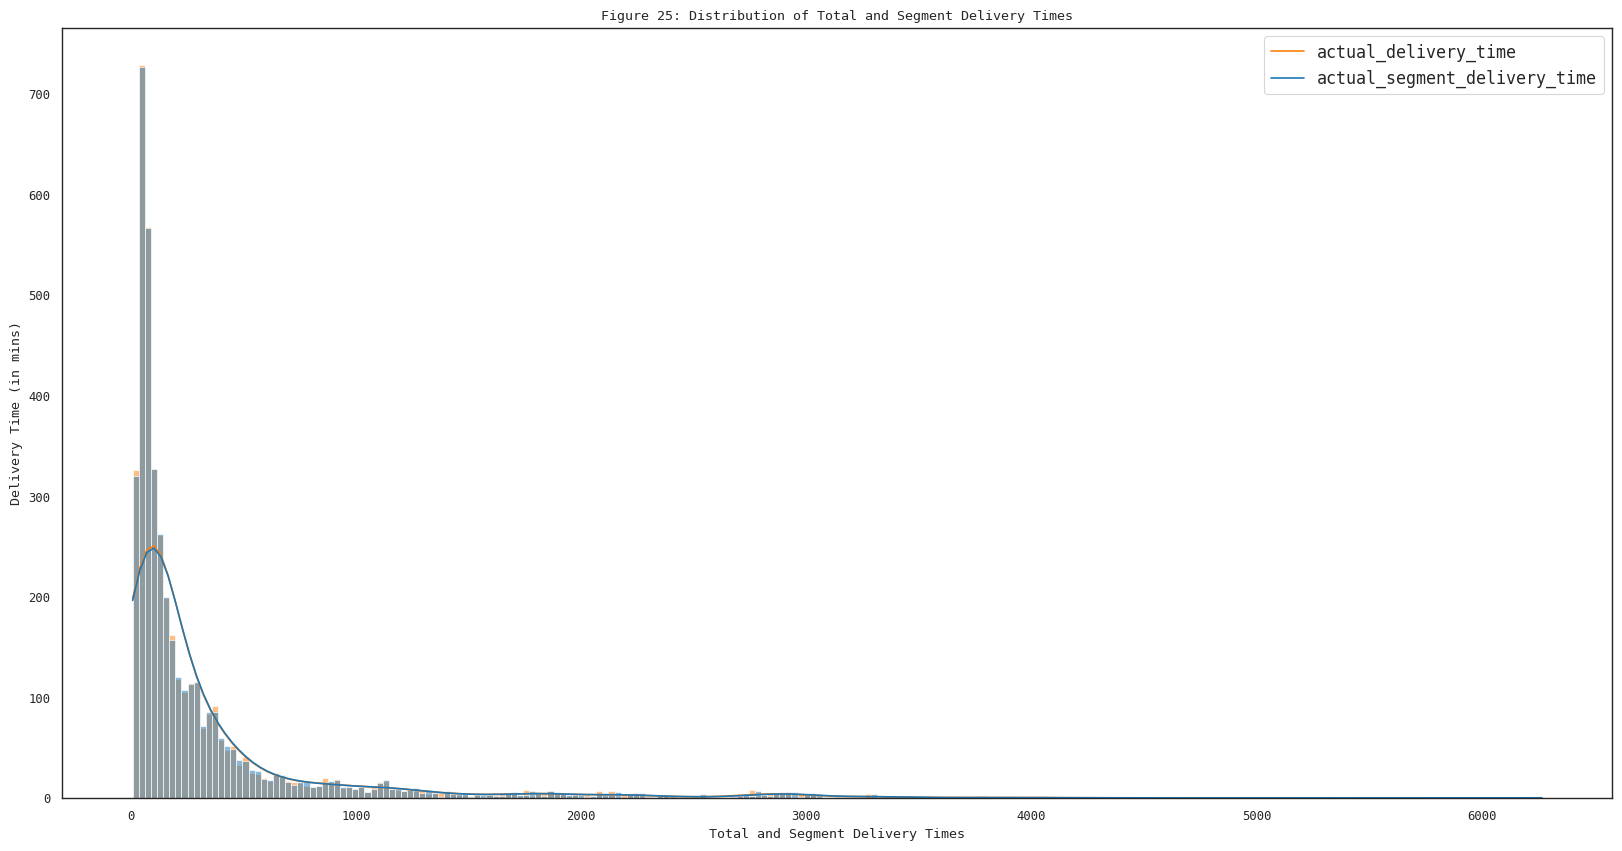

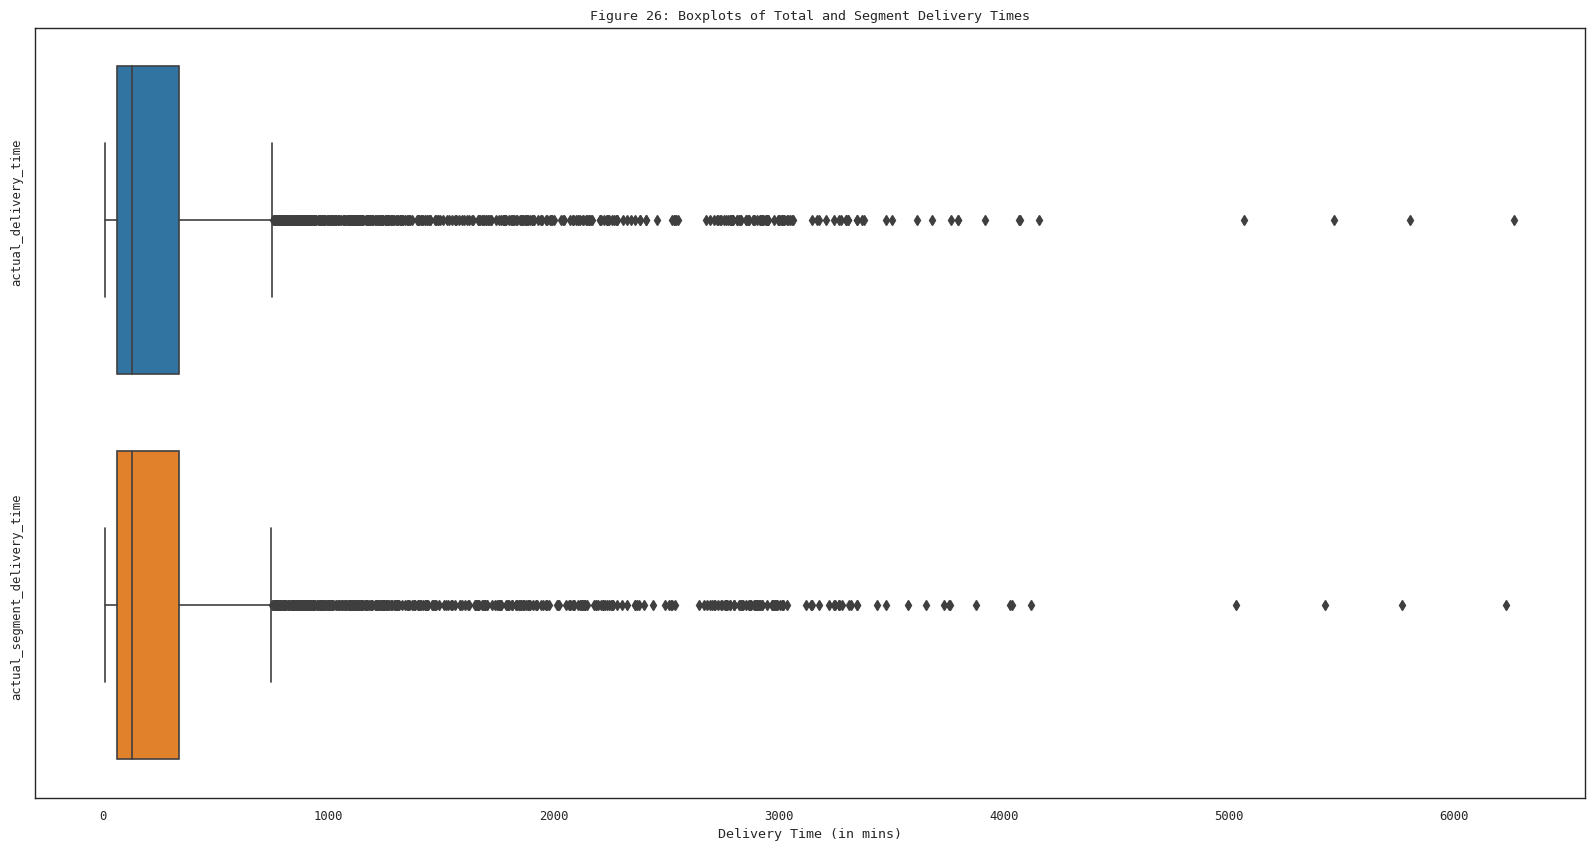

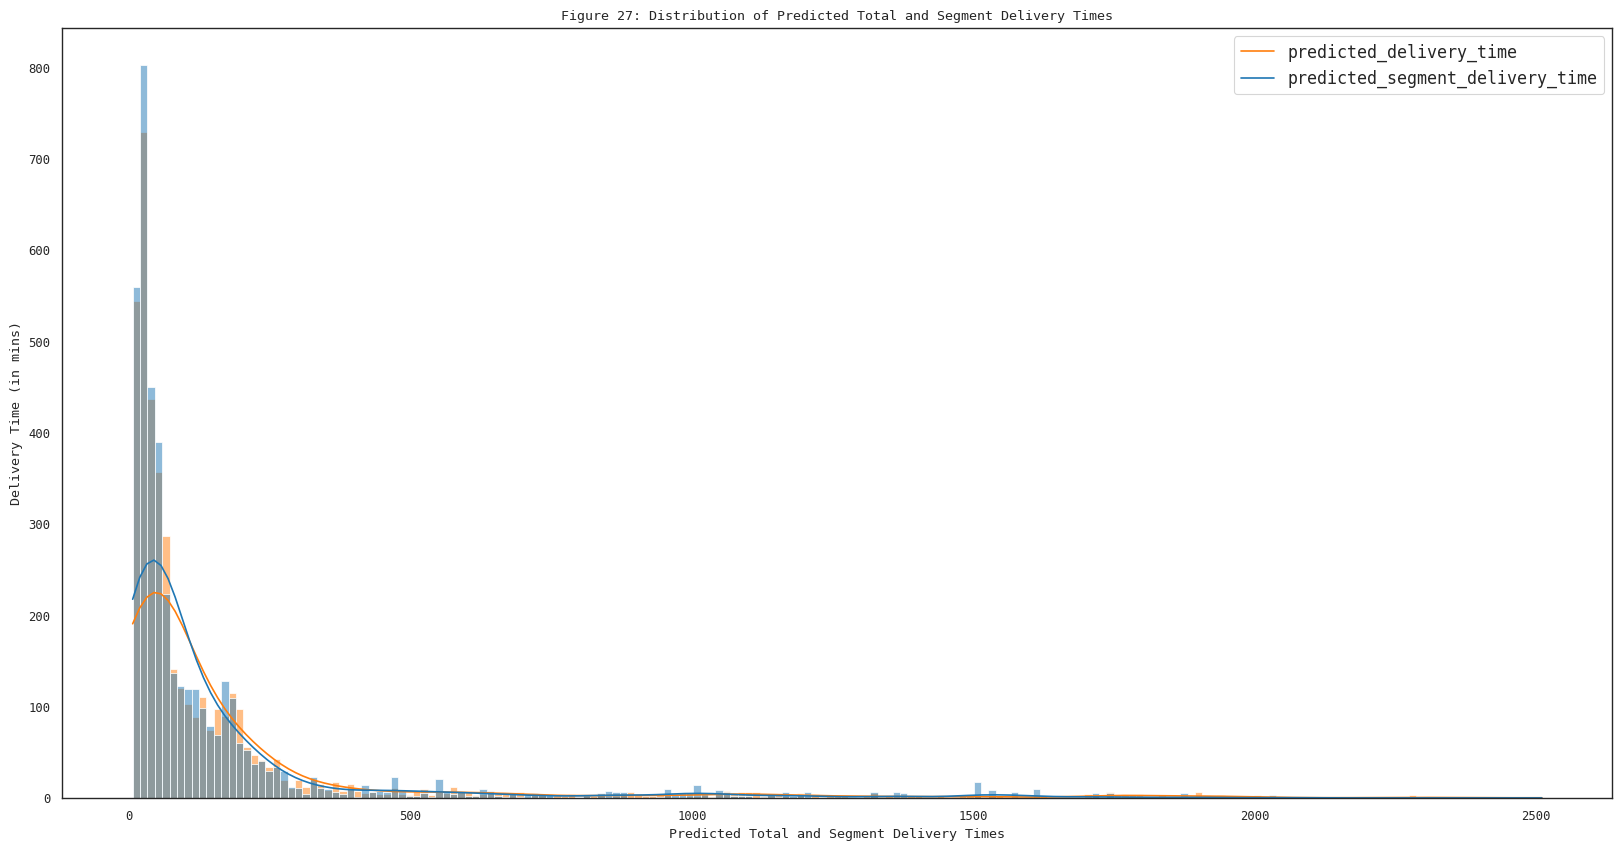

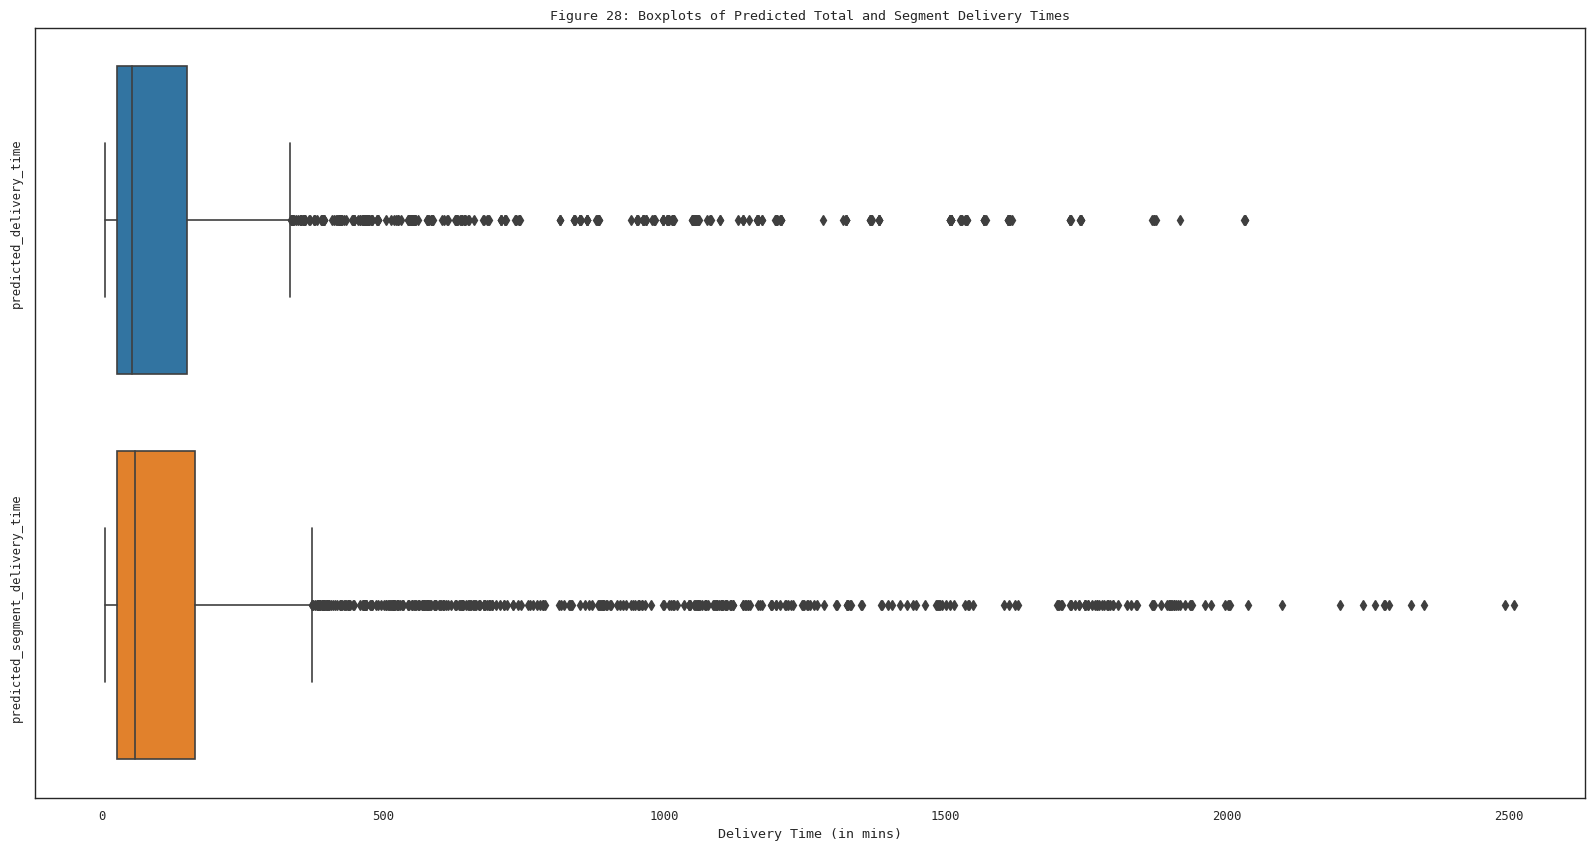

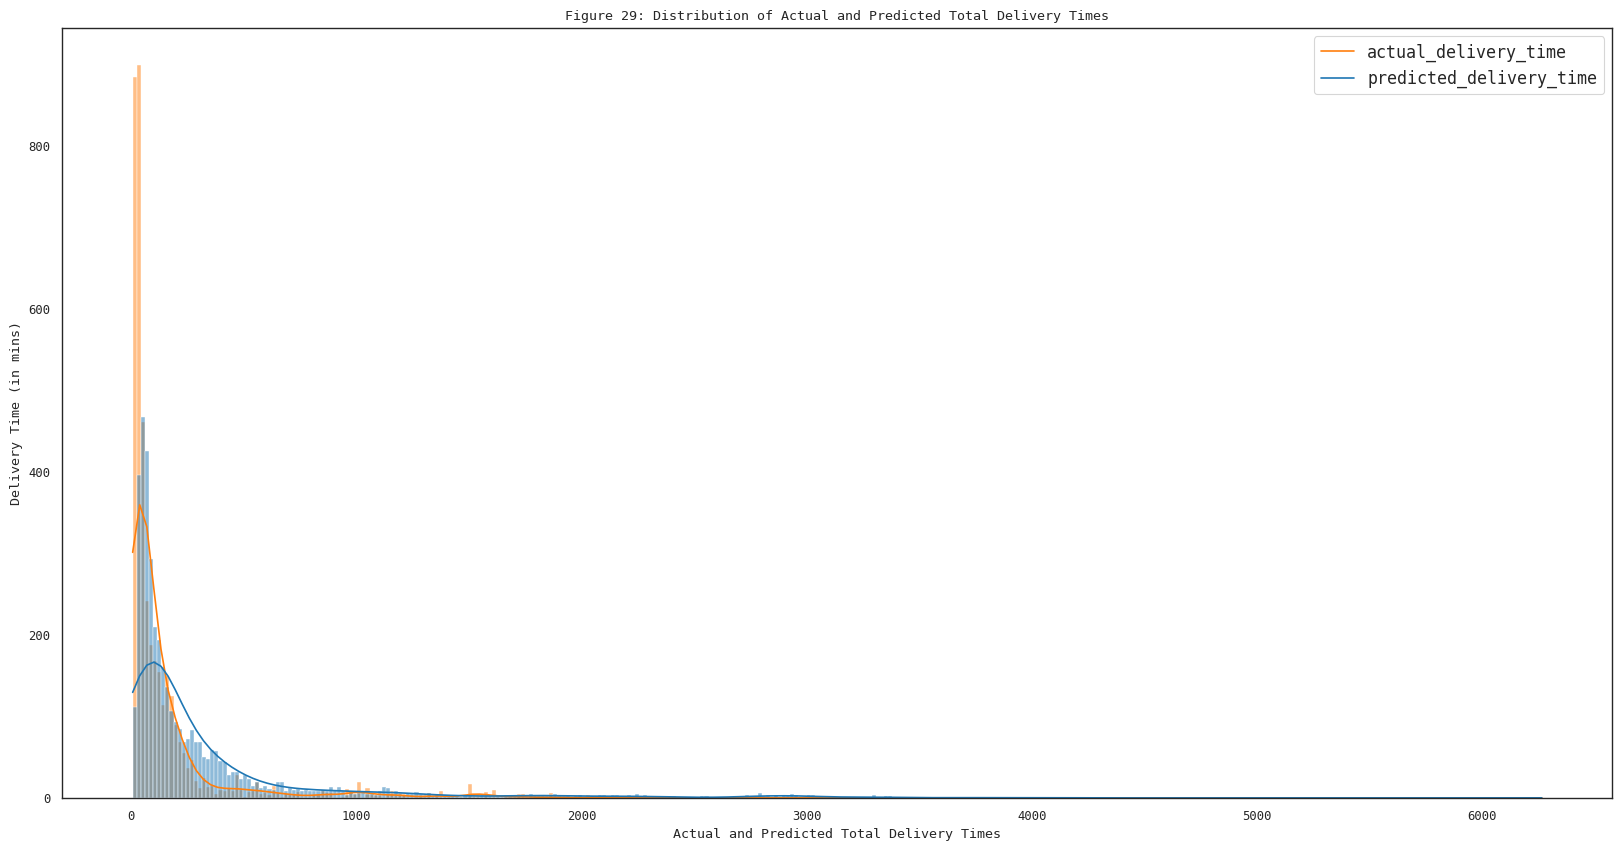

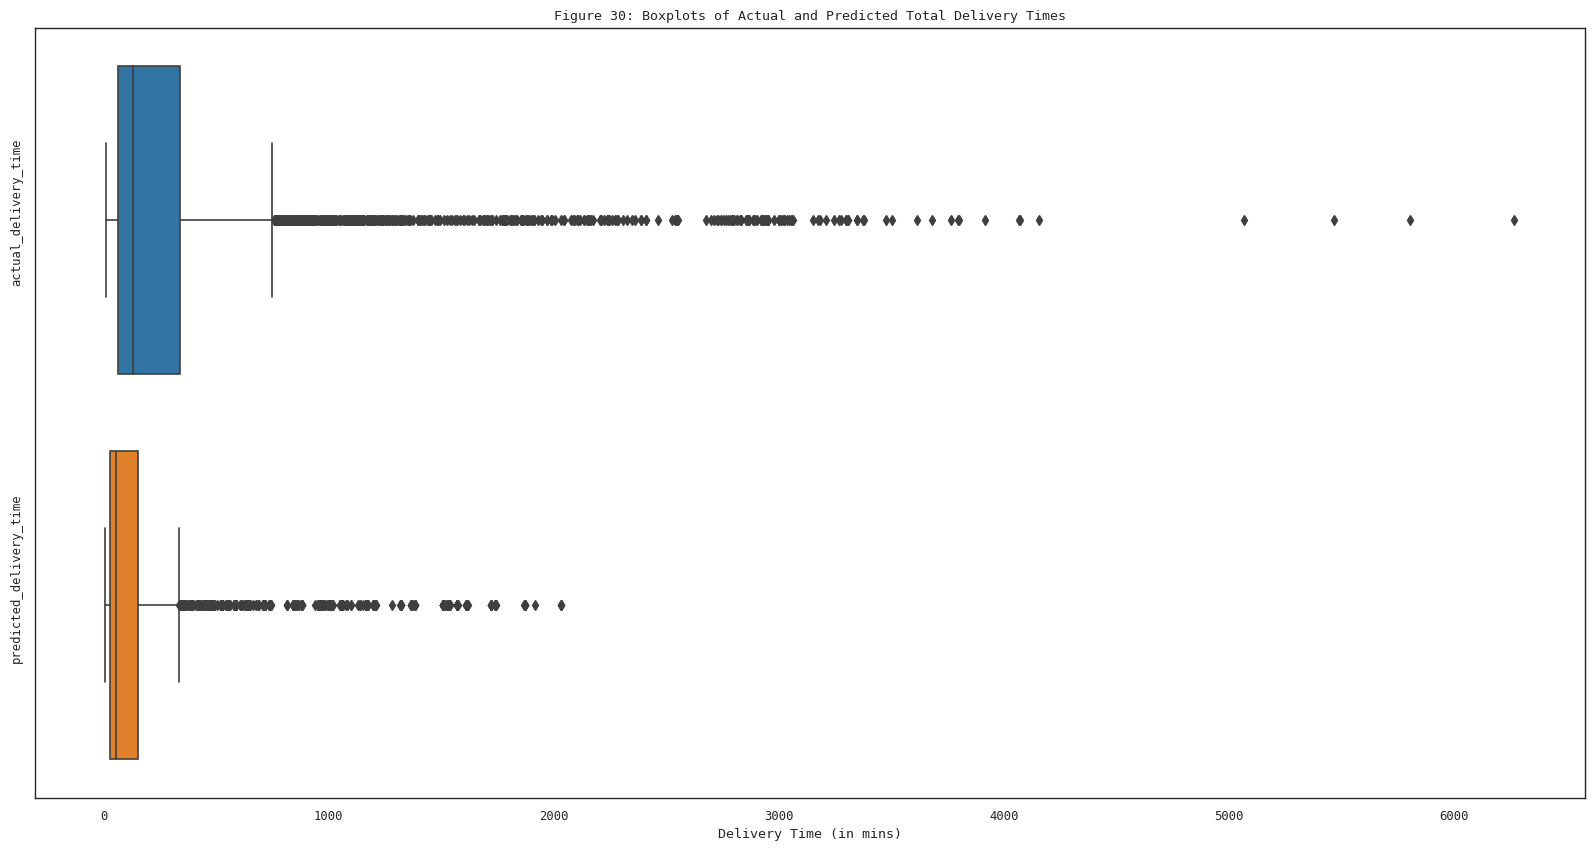

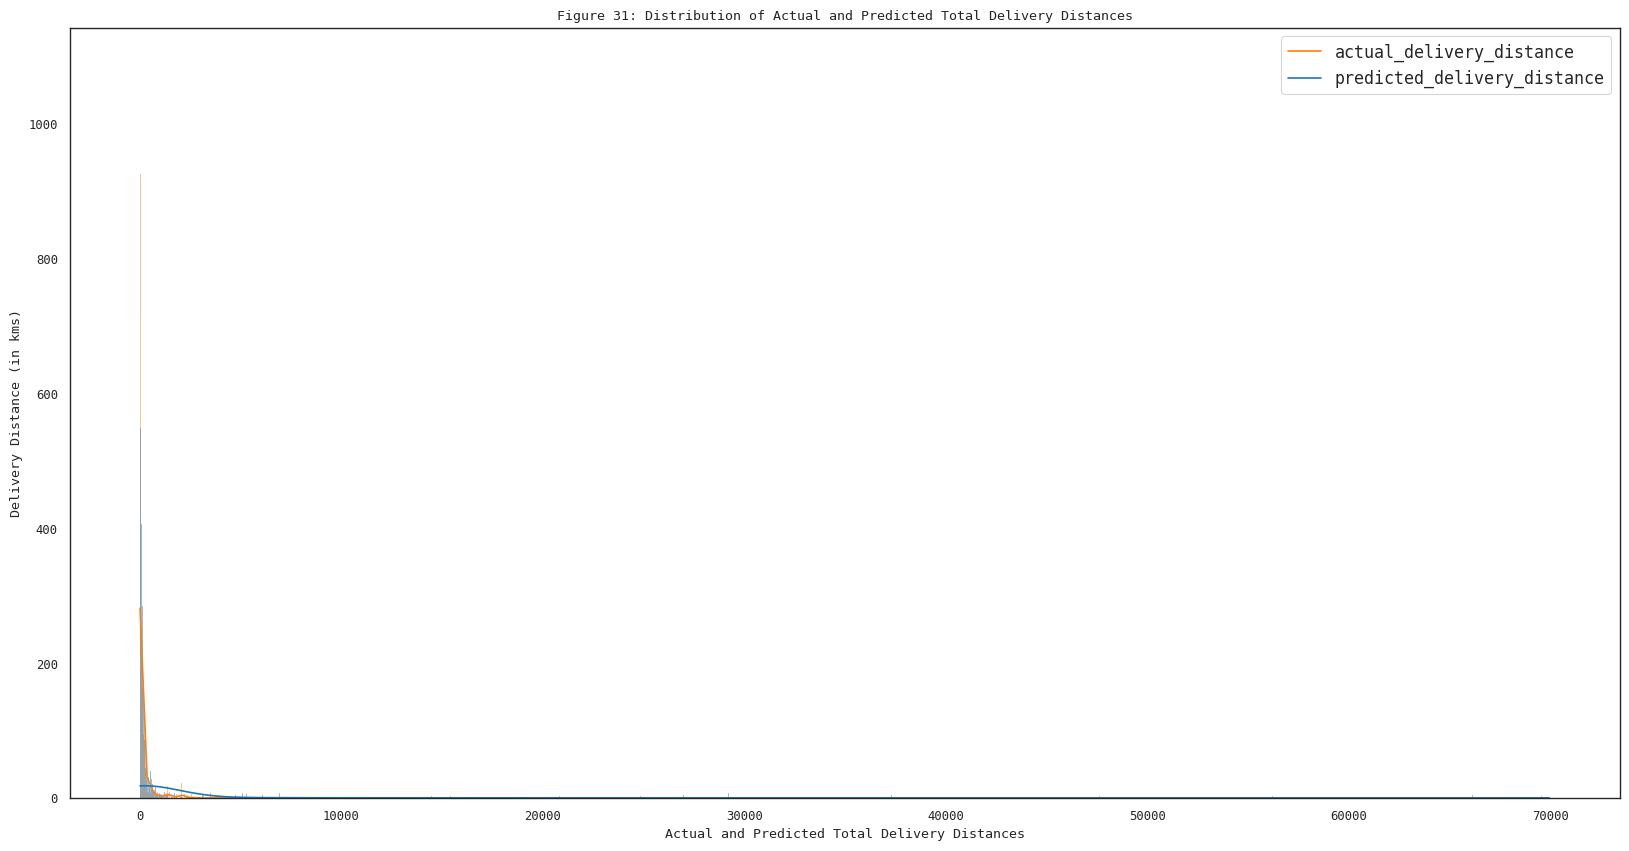

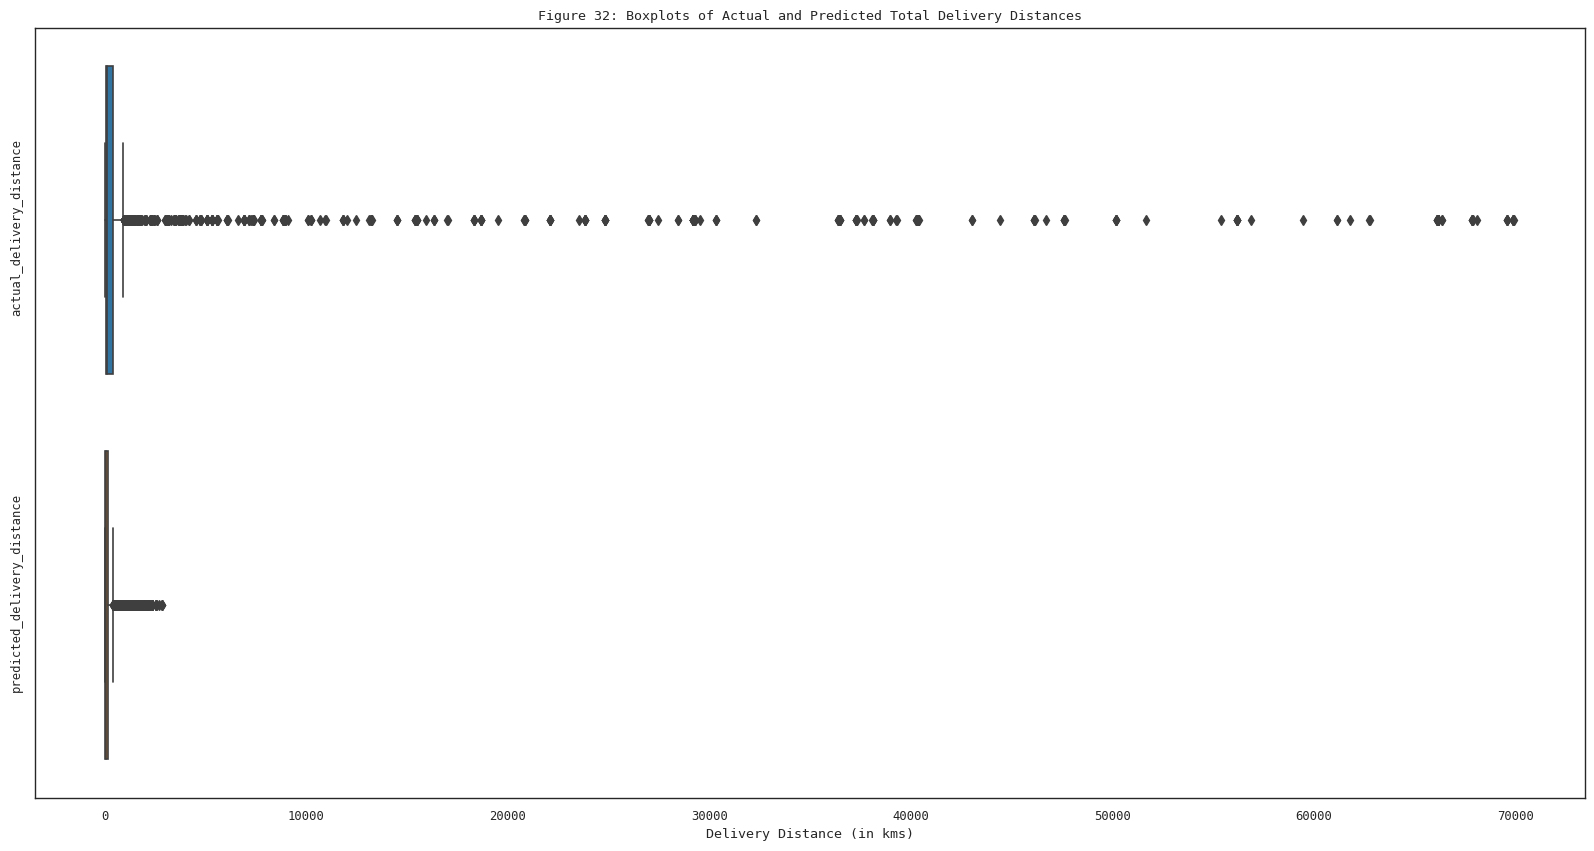

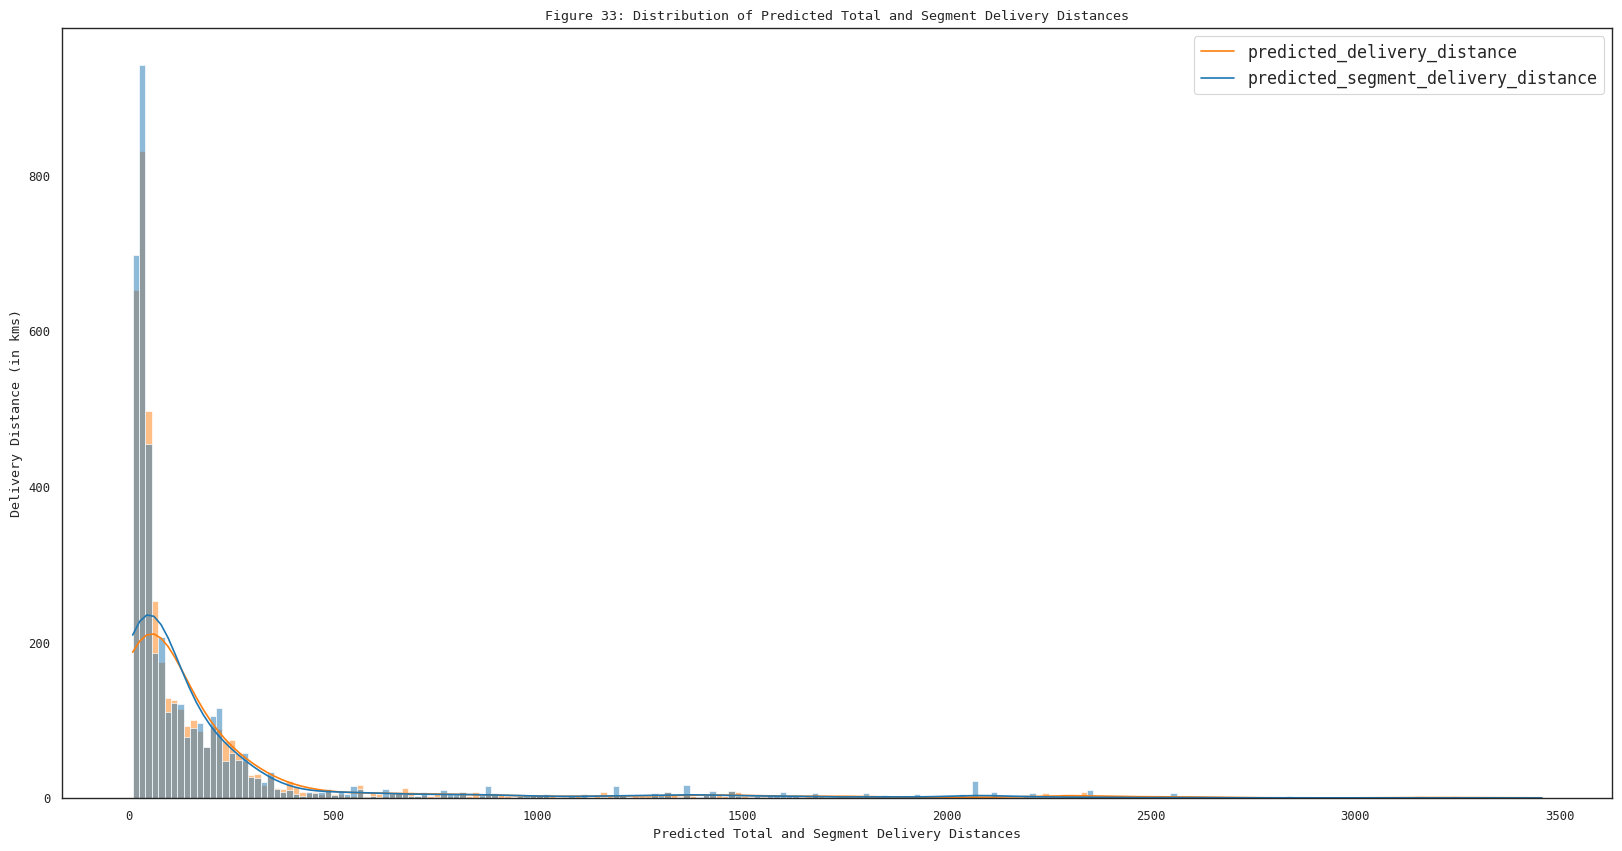

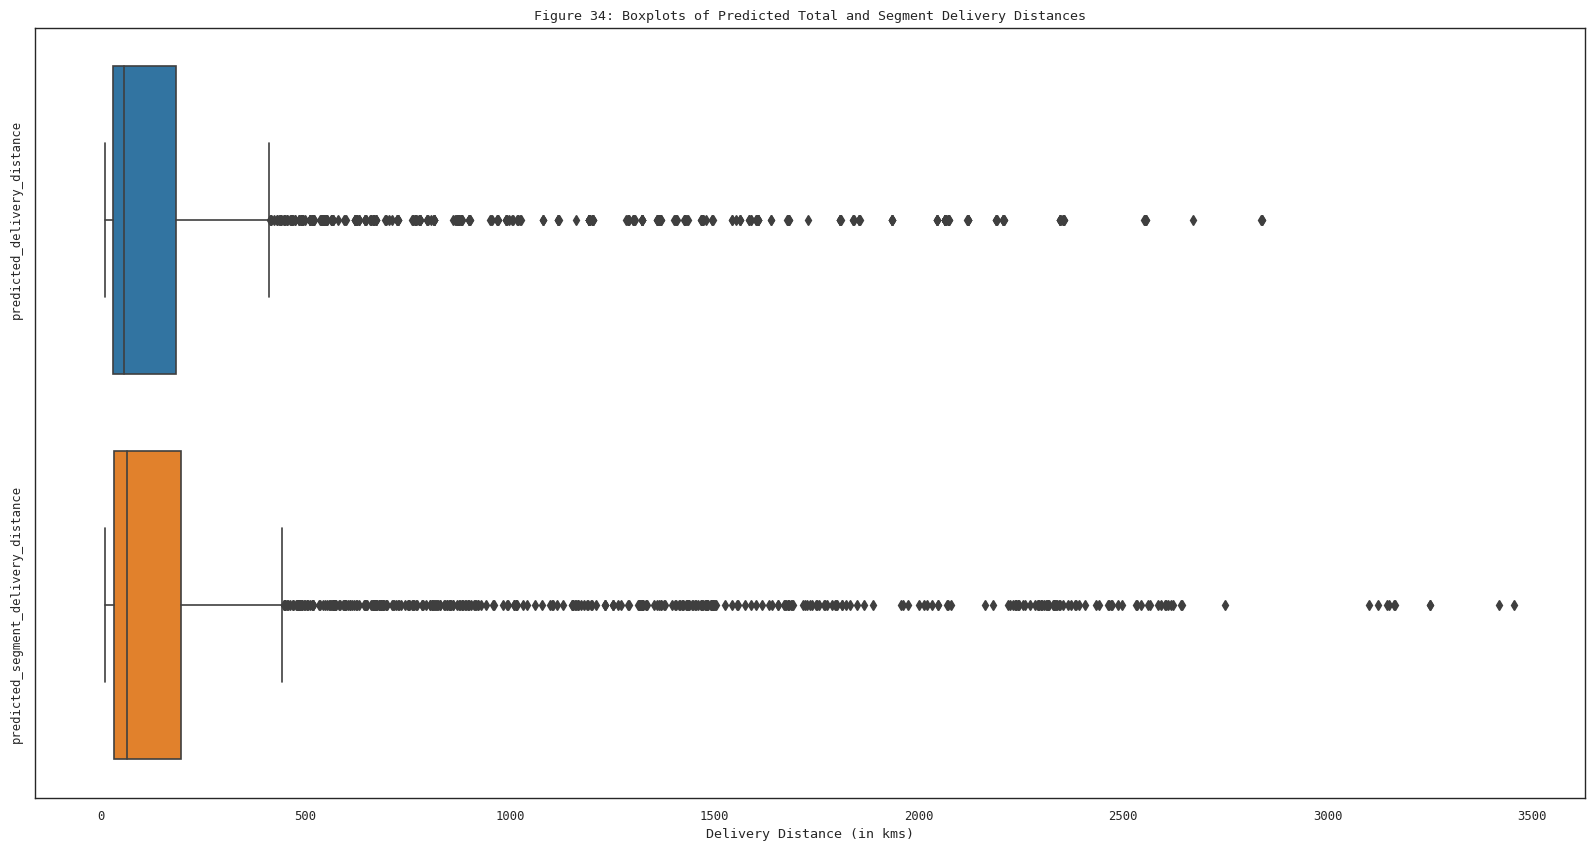

In [44]:
fig_num += 1
plot_countplot(
    final_test_df['route_type'],
    'Number of FTL vs Carting Orders',
    fig_num,
    'Number of Orders',
    xticks=[[0, 1], ['FTL', 'Carting']]
)    

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_test_df['return_order'],
    'Number of Return vs Non-Return Orders',
    fig_num,
    'Number of Orders',
    xticks=[[0, 1], ['Not Returned', 'Returned']]
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_test_df['trip_creation_daytime_category'],
    'Number of Orders per DayTime Category',
    fig_num,
    'Number of Orders',
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_test_df['trip_creation_day_of_week'],
    'Number of Orders per WeekDay',
    fig_num,
    'Number of Orders',
    [[0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
)

print('\n\n\n')

fig_num += 1
plot_countplot(
    final_test_df['trip_creation_date'],
    'Number of Orders per Date',
    fig_num,
    'Number of Orders',
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time']],
    'Actual and Calculated Scan Times',
    fig_num,
    'Difference between scan time (in mins) between source and destination'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time']],
    'Actual and Calculated Scan Times',
    fig_num,
    'Difference between scan time (in mins) between source and destination',
    [-0.36, 0.60]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['actual_delivery_time', 'actual_segment_delivery_time']],
    'Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['actual_delivery_time', 'actual_segment_delivery_time']],
    'Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['predicted_delivery_time', 'predicted_segment_delivery_time']],
    'Predicted Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['predicted_delivery_time', 'predicted_segment_delivery_time']],
    'Predicted Total and Segment Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['actual_delivery_time', 'predicted_delivery_time']],
    'Actual and Predicted Total Delivery Times',
    fig_num,
    'Delivery Time (in mins)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['actual_delivery_time', 'predicted_delivery_time']],
    'Actual and Predicted Total Delivery Times',
    fig_num,
    'Delivery Time (in mins)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['actual_delivery_distance', 'predicted_delivery_distance']],
    'Actual and Predicted Total Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['actual_delivery_distance', 'predicted_delivery_distance']],
    'Actual and Predicted Total Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)',
    [-0.20, 0.72]
)

print('\n\n\n')

fig_num += 1
plot_histogram(
    final_test_df[['predicted_delivery_distance', 'predicted_segment_delivery_distance']],
    'Predicted Total and Segment Delivery Distances',

    fig_num,
    'Delivery Distance (in kms)'
)
print('\n')
fig_num += 1
plot_boxplot(
    final_test_df[['predicted_delivery_distance', 'predicted_segment_delivery_distance']],
    'Predicted Total and Segment Delivery Distances',
    fig_num,
    'Delivery Distance (in kms)',
    [-0.25, 0.70]
)

<span style="font-family: monospace">

<h3>Observations from the Visualizations on the Test Data:</h3>
    
    1. Figure 18: More trips with Carting route_type than FTL.
    2. Figure 19: Approximately, 20% of the orders are returned back to the source.
    3. Figure 20: Most of the trips started in Evening, with next highest in Night, followed by commensurate number of trips initiating in Morning and Afternoon.
    4. Figure 21: Most of the trips start on Wednesday, with lowest number starting on weekends.
    5. Figure 22: Almost equal number of trips initiating throughout the month except for the last week.
    6. Figure 23 and 24: Similar distributions, range, and outliers for actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.
    7. Figure 25 and 26: Almost similar distributions, range, and outliers for actual_delivery_time and actual_segment_delivery_time.
    8. Figure 27 and 28: Slight variation in distributions, range, and outliers for predicted_delivery_time and predicted_segment_delivery_time.
    9. Figure 29 and 30: High variation in distributions, range, and outliers for actual_delivery_time and predicted_delivery_time.
    10. Figure 31 and 32: High variation in distributions, range, and outliers for actual_delivery_distance and predicted_delivery_distance.
    11. Figure 33 and 34: Slight variation in distributions, range, and outliers for predicted_delivery_distance and predicted_segment_delivery_distance.

</span>

<span style="font-family: monospace">
<h2>Hypothesis Testing</h2>

    We will perform Hypothesis Testing twice. First, before treating the outliers and second after treating the outliers.

</span>

In [45]:
def standardize_columns(dataframe, column_list):
    '''
    The function uses the StandarScaler() to standardize columns.
    - Performing standardization separate of previous Feature Engineering steps to visualize data in absolute values and not in z-scores.
    
    :param
        dataframe: pd.DataFrame
        column_list: list of columns to standardize
    
    :return
        dataframe: pd.DataFrame
    '''

    for col in column_list:
        dataframe[col] = standardscaler.fit_transform(dataframe[[col]])
    
    return dataframe

float_column_list = ['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']
final_train_df = standardize_columns(final_train_df, float_column_list)
final_test_df = standardize_columns(final_test_df, float_column_list)

In [46]:
class HypothesisTesting:
    '''
    The class performs various hypothesis tests on multiple columns of the input dataframe.
    
    :param
        dataframe: pd.DataFrame
        alpha: float - significance level
        large_sample_size: int - minimum number of datapoints in a sample to consider it as a population
        fig_num: int - plot number for visualization
    '''
    
    def __init__(self, dataframe, alpha, large_sample_size, fig_num):
        self.dataframe = dataframe
        self.alpha = alpha
        self.large_sample_size = large_sample_size
        self.fig_num = fig_num
        print('Object instantiated successfully\n')
        return None
    

    
    def check_assumptions_chisqaure_test(series1, series2):
        if series1.value_counts().min() < 5 or series2.value_counts().min() < 5:
            return False
        return True

    
    
    def perform_chisquare_test(self, col1, col2):
        '''
        The function performs two-sample independent chi-square-test on the two input columns.
        
        :param
            col1: string - name of the column to be treated as the first sample.
            col2: string - name of the column to be treated as the second sample.
        '''
        
        null_hypothesis = f'{col1} and {col2} are independent of each other.'
        alternate_hypothesis = f'{col1} and {col2} are dependent on each other.'
        
        series1, series2 = self.dataframe[col1], self.dataframe[col2]

        if HypothesisTesting.check_assumptions_chisqaure_test(series1, series2):
            print(f'Performing Chi-Square Test on {col1} and {col2}.\n')
            
            crosstab = pd.crosstab(index=series1, columns=series2)
            
            _, p_value, _, _ = chi2_contingency(crosstab)
            
            if p_value < self.alpha:
                print(f'\tRejecting the Null Hypothesis with the p-value of {p_value}.')
                print(f'\tOutcome: {alternate_hypothesis}')
            else:
                print(f'\tFailed to reject the Null Hypothesis because the p-value ({p_value}) > {self.alpha}.')
                print(f'\tOutcome: {null_hypothesis}')
        else:
            print(f'Cannot perform Chi-Square Test on {col1} and {col2} because the assumption of minimum number of samples is violated.')
        
        print('\n\n\n')
        
        return None
    

    
    def check_assumptions_ttest(series1, series2, alpha, large_sample_size):
        # testing homogeneity of variance
        _, p_value = levene(series1, series2)
        if p_value < alpha:
            equal_var = False
        else:
            equal_var = True
        
        # texting normality for series1
        perform_test = True
        if series1.shape[0] > 3 and series2.shape[0] > 3:
            if series1.shape[0] < large_sample_size:
                _, p_value = shapiro(series1)
                if p_value < alpha:
                    perform_test = False

            # texting normality for series2
            if series2.shape[0] < large_sample_size:
                _, p_value = shapiro(series2)
                if p_value < alpha:
                    perform_test = False
        else:
            perform_test = False

        return perform_test, equal_var


    
    def perform_ttest(self, col1, col2, ha='two-sided'):
        '''
        The function performs two-sample independent T-test on the two input columns.
        
        :param
            col1: string - name of the column to be treated as the first sample.
            col2: string - name of the column to be treated as the second sample.
            ha: string ['two-sided', 'less', 'greater'] - depicts the alternate hypothesis between the two input columns. default: 'two-sided'
        '''
        
        null_hypothesis = f'μ({col1}) = μ({col2})'
        if ha == 'two-sided':
            alternate_hypothesis = f'μ({col1}) != μ({col2})'
        elif ha == 'less':
            alternate_hypothesis = f'μ({col1}) < μ({col2})'
        elif ha == 'greater':
            alternate_hypothesis = f'μ({col1}) > μ({col2})'
        else:
            print(f'Enter a valid alternative hypothesis. {ha} not accepted by ttest_ind')
            return None
        
        series1, series2 = self.dataframe[col1], self.dataframe[col2]
        perform_test, equal_var = HypothesisTesting.check_assumptions_ttest(series1, series2, self.alpha, self.large_sample_size)
        
        if perform_test:
            print(f'Performing independent T-test on {col1} and {col2}.\n')
            _, p_value = ttest_ind(series1, series2, equal_var=equal_var, alternative=ha)
            
            if p_value < self.alpha:
                print(f'\tRejecting the Null Hypothesis with the p-value of {p_value}.')
                print(f'\tOutcome: {alternate_hypothesis}')
            else:
                print(f'\tFailed to reject the Null Hypothesis because the p-value ({p_value}) > {self.alpha}.')
                print(f'\tOutcome: {null_hypothesis}')
        else:
            print(f'Cannot perform T-test on {col1} and {col2} because the assumption of nomality is violated.')
        
        print('\n\n\n')
        
        return None
    
    
    
    def perform_kstest(self, col1, col2):
        '''
        The function performs two-sample independent T-test on the two input columns.
        
        :param
            col1: string - name of the column to be treated as the first sample.
            col2: string - name of the column to be treated as the second sample.
        '''
        
        null_hypothesis = f'Distribution of {col1} = Distribution of {col2}'
        alternate_hypothesis = f'Distribution of {col1} != Distribution of {col2}'
        
        series1, series2 = self.dataframe[col1], self.dataframe[col2]
        
        print(f'Performing KS-Test on {col1} and {col2}.\n')
        _, p_value = kstest(series1, series2)

        if p_value < self.alpha:
            print(f'\tRejecting the Null Hypothesis with the p-value of {p_value}.')
            print(f'\tOutcome: {alternate_hypothesis}')
        else:
            print(f'\tFailed to reject the Null Hypothesis because the p-value ({p_value}) > {self.alpha}.')
            print(f'\tOutcome: {null_hypothesis}')
        
        self.fig_num += 1
        plot_ECDF(series1, series2, fig_num=self.fig_num)
        print('\n\n\n')
        
        return None

Object instantiated successfully

Performing independent T-test on actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999958) > 0.05.
	Outcome: μ(actual_source_and_destination_scan_time) = μ(calculated_source_and_destination_scan_time)




Performing independent T-test on actual_delivery_time and predicted_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999973) > 0.05.
	Outcome: μ(actual_delivery_time) = μ(predicted_delivery_time)




Performing independent T-test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999991) > 0.05.
	Outcome: μ(actual_segment_delivery_time) = μ(predicted_segment_delivery_time)




Performing independent T-test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-v

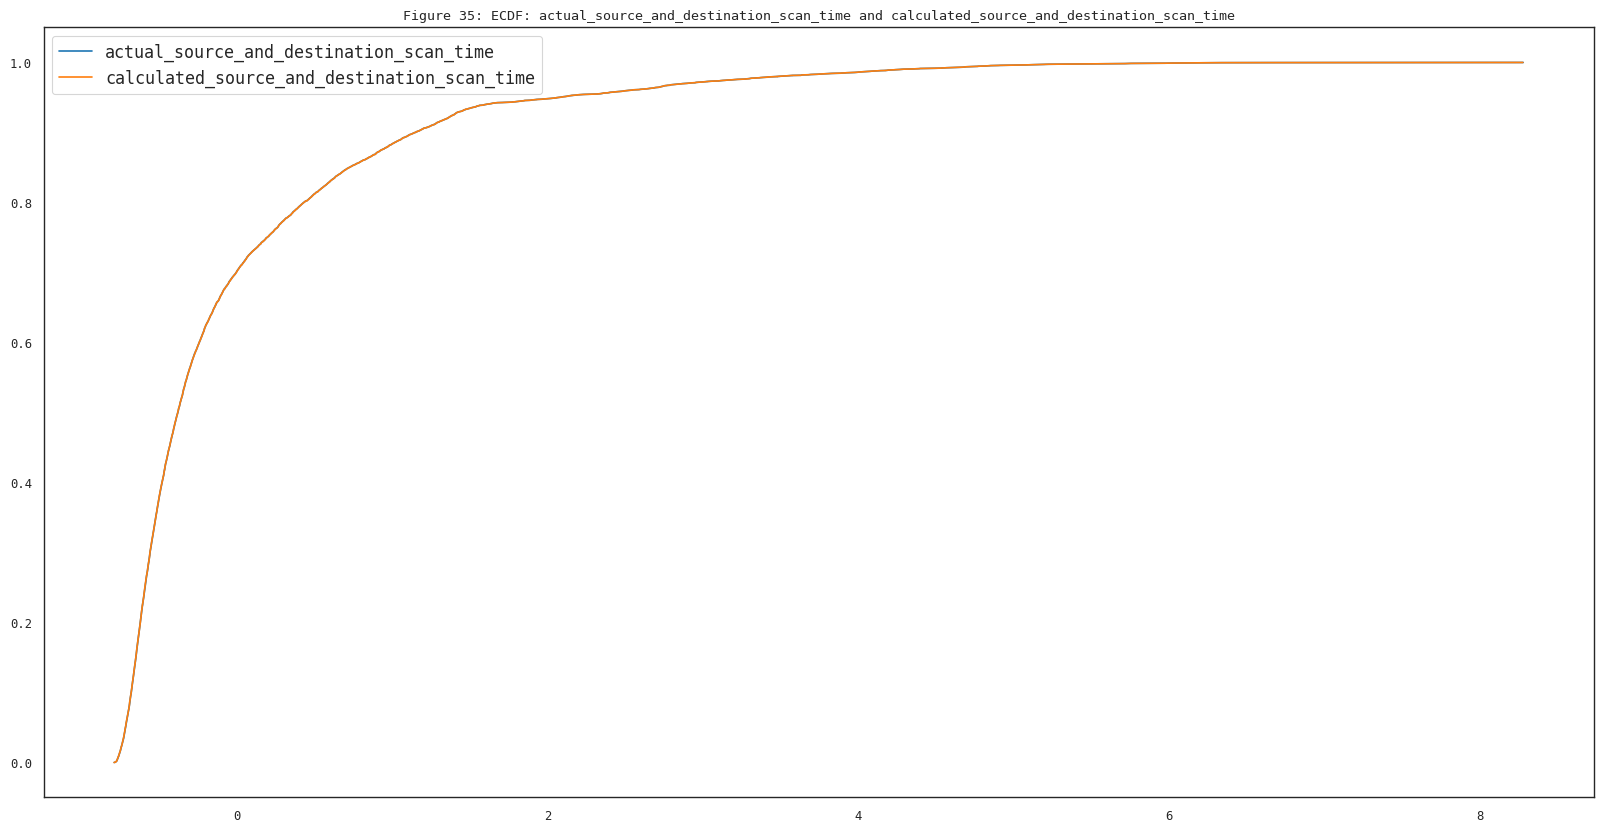





Performing KS-Test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 4.087218437024138e-65.
	Outcome: Distribution of actual_delivery_time != Distribution of predicted_delivery_time


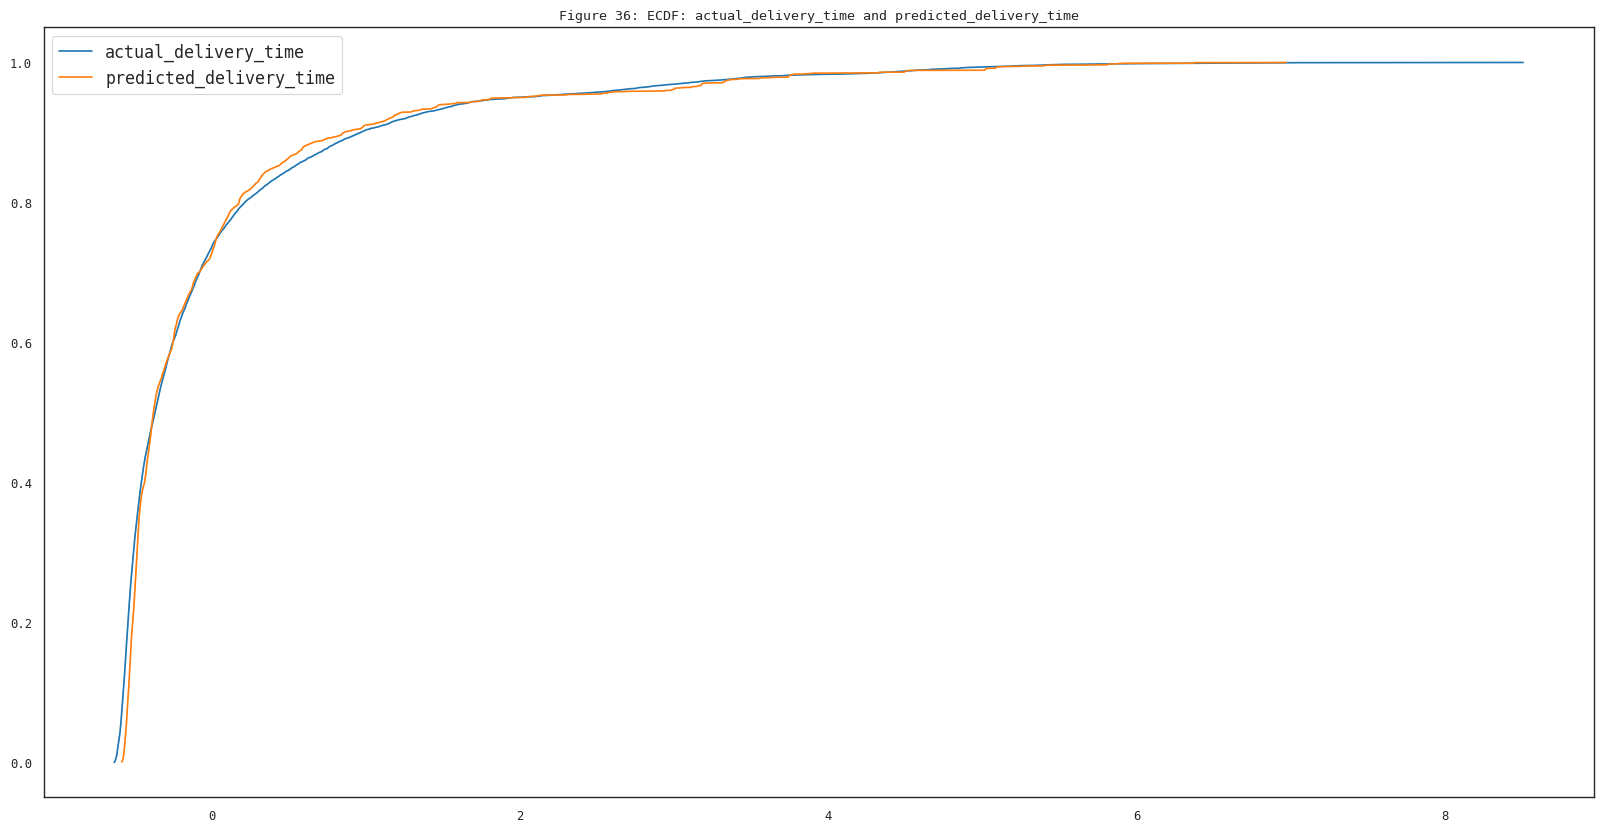





Performing KS-Test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 4.122451633157236e-116.
	Outcome: Distribution of actual_segment_delivery_time != Distribution of predicted_segment_delivery_time


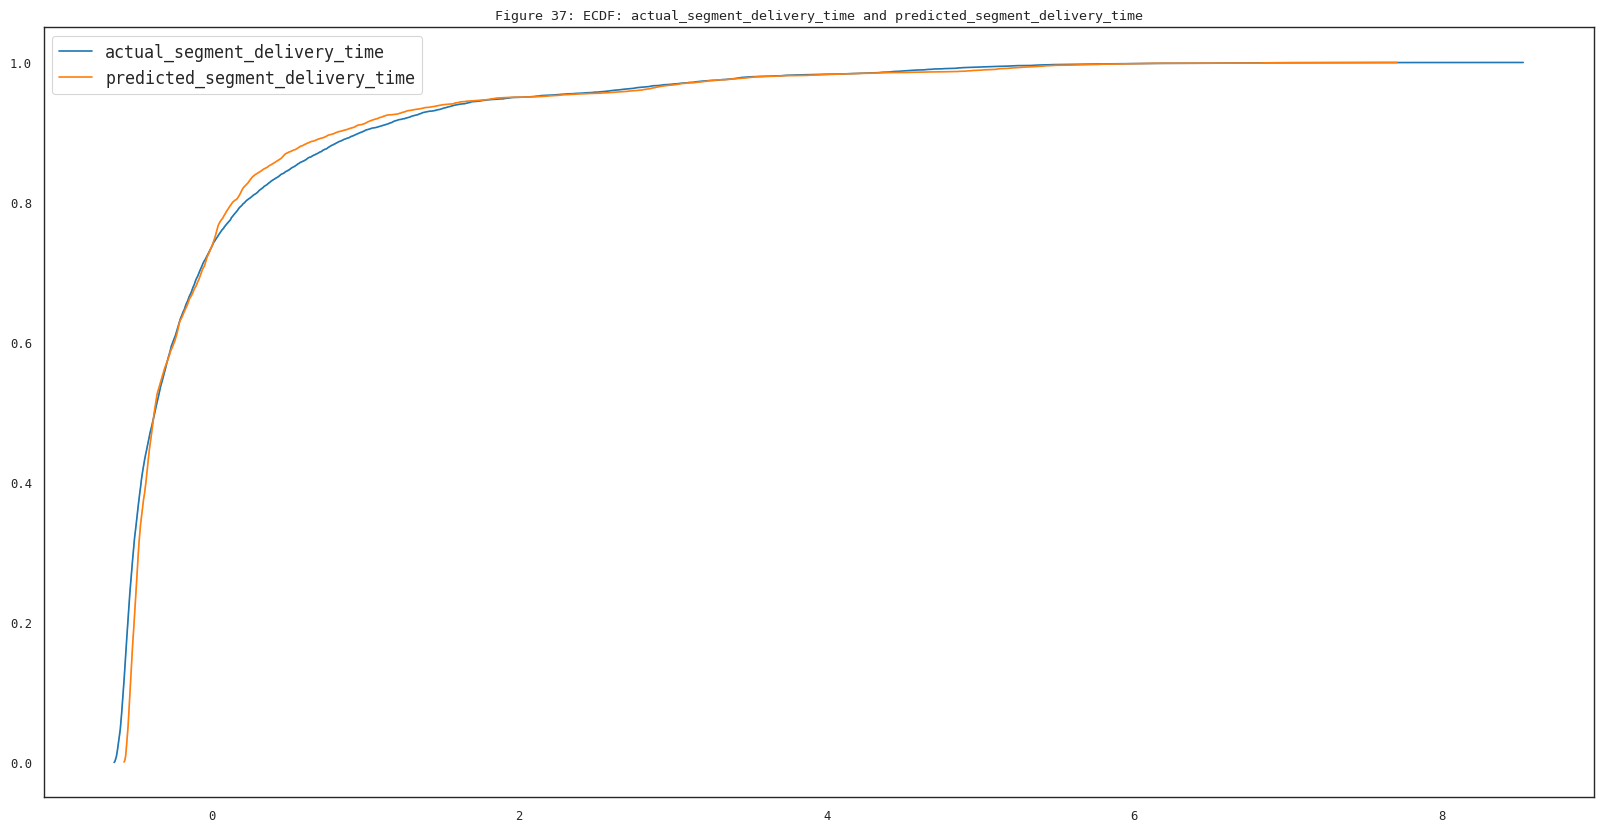





Performing KS-Test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9576156984097165) > 0.05.
	Outcome: Distribution of actual_delivery_time = Distribution of actual_segment_delivery_time


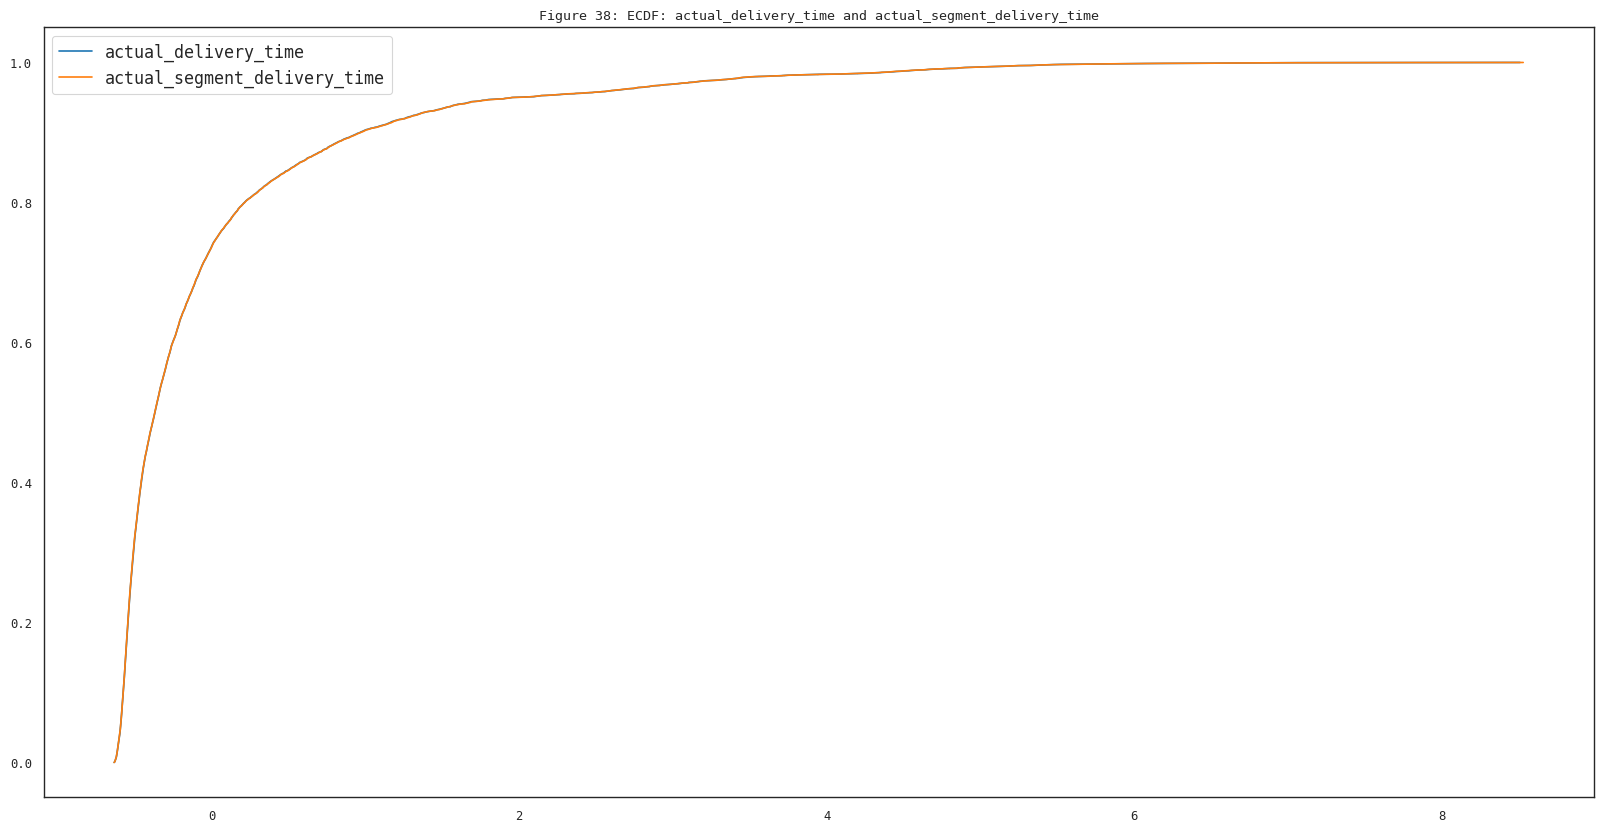





Performing KS-Test on predicted_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 4.9596886069948256e-14.
	Outcome: Distribution of predicted_delivery_time != Distribution of predicted_segment_delivery_time


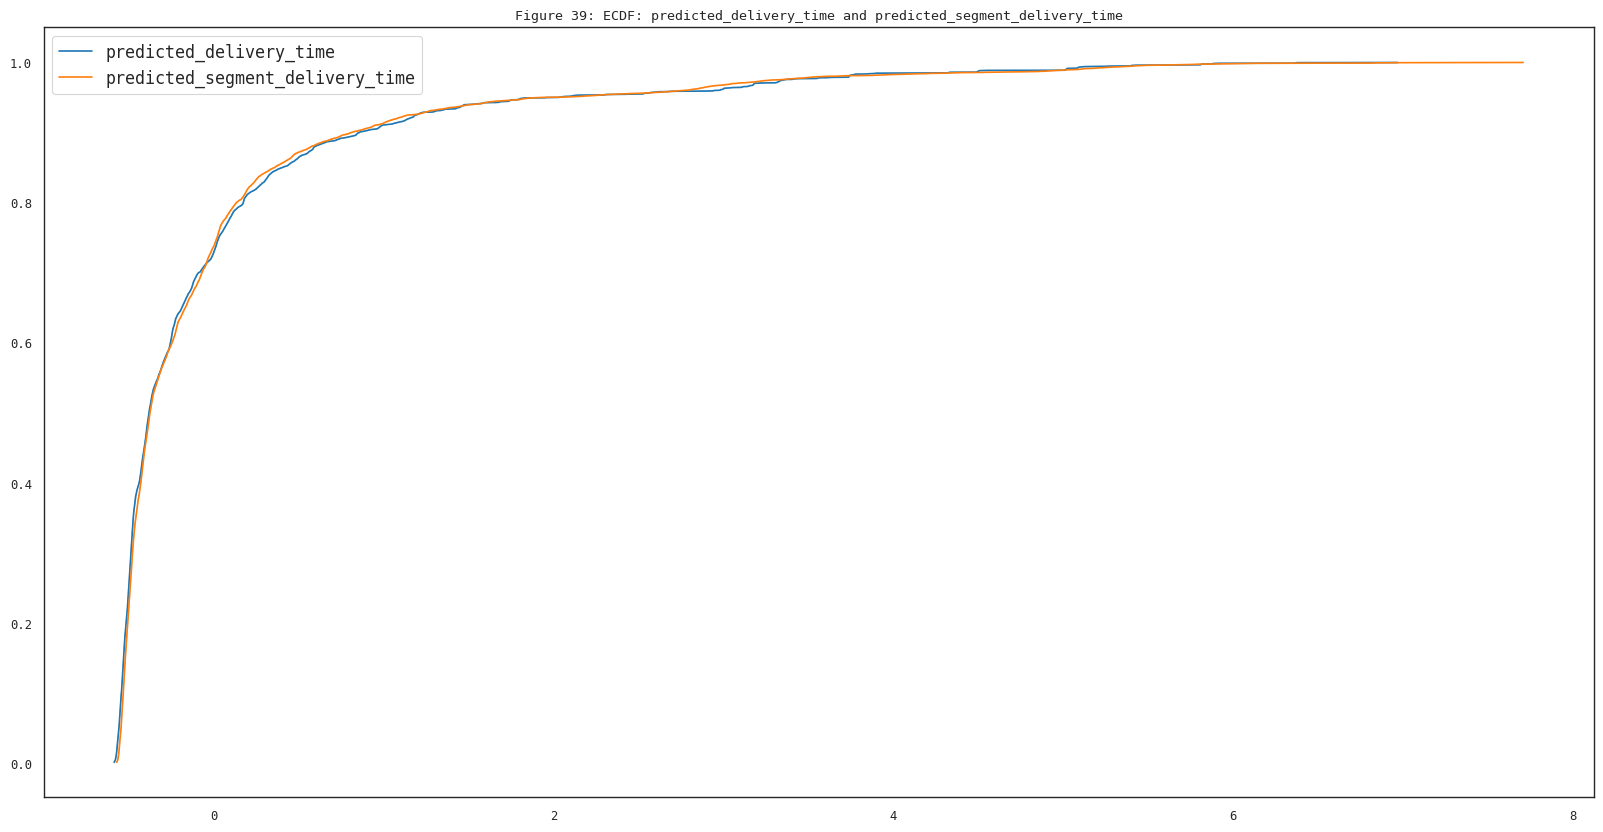





Performing KS-Test on actual_delivery_distance and predicted_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 0.0.
	Outcome: Distribution of actual_delivery_distance != Distribution of predicted_delivery_distance


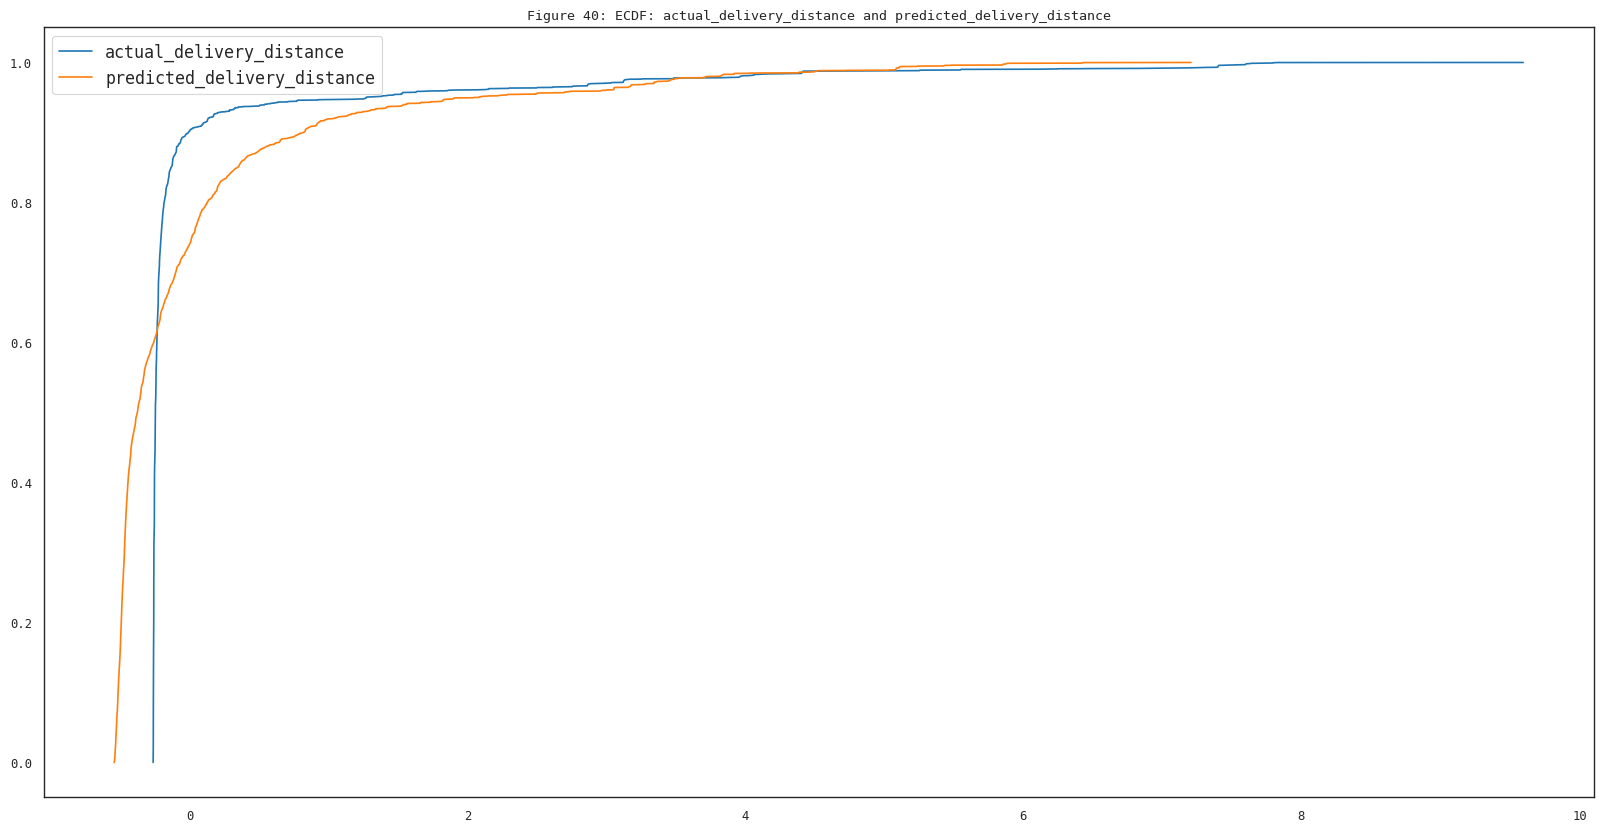





Performing KS-Test on predicted_delivery_distance and predicted_segment_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 3.2658241135812327e-19.
	Outcome: Distribution of predicted_delivery_distance != Distribution of predicted_segment_delivery_distance


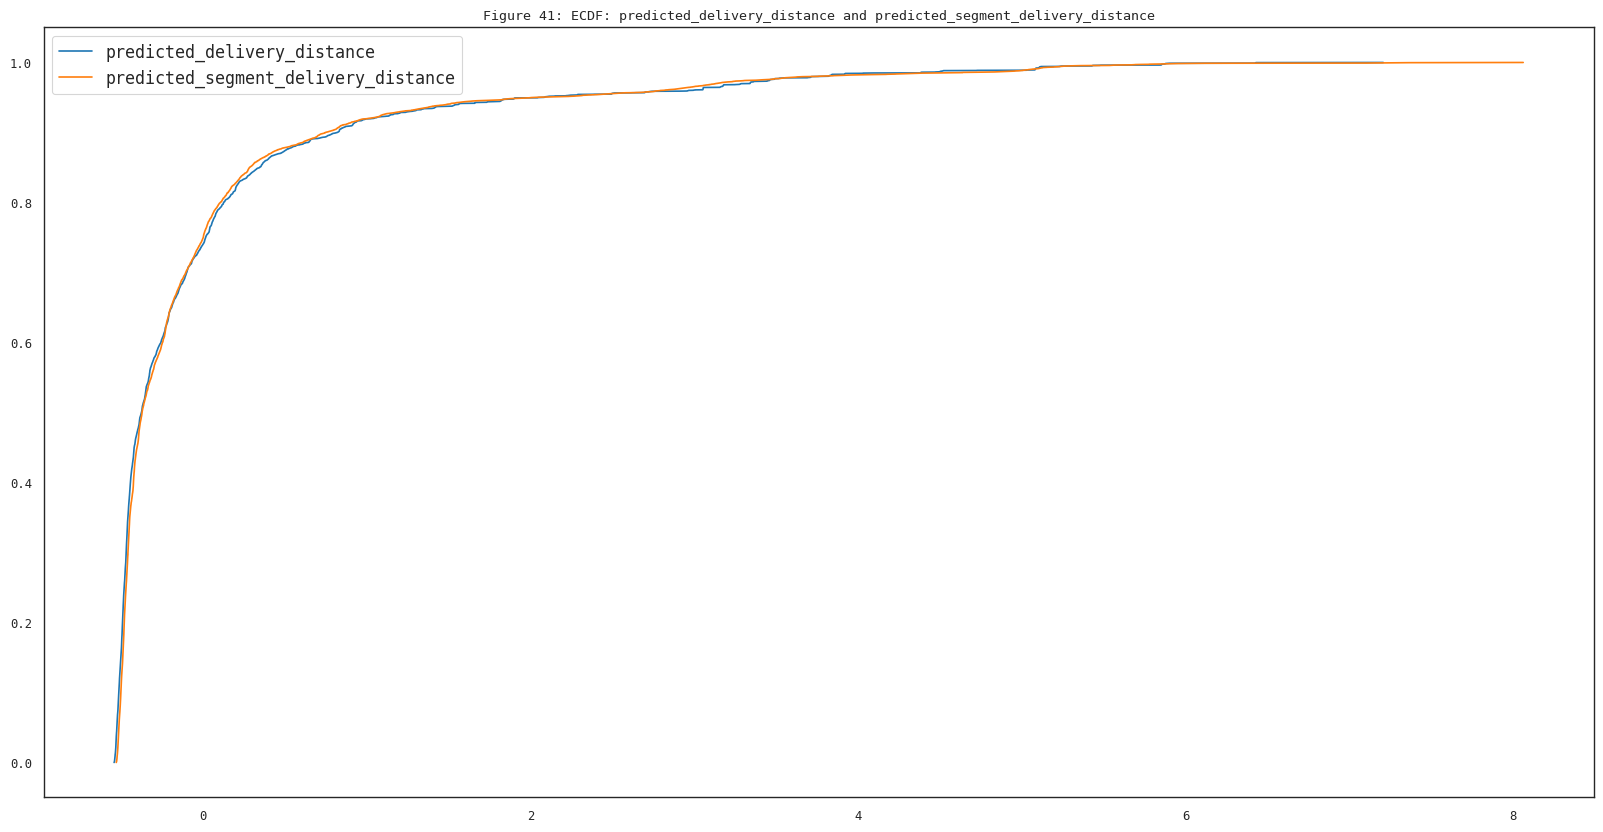





Performing Chi-Square Test on trip_creation_day_of_week and trip_creation_daytime_category.

	Rejecting the Null Hypothesis with the p-value of 0.0018130278481416798.
	Outcome: trip_creation_day_of_week and trip_creation_daytime_category are dependent on each other.




Performing Chi-Square Test on trip_creation_daytime_category and return_order.

	Rejecting the Null Hypothesis with the p-value of 1.6287723401831042e-20.
	Outcome: trip_creation_daytime_category and return_order are dependent on each other.




Performing Chi-Square Test on trip_creation_day_of_week and return_order.

	Failed to reject the Null Hypothesis because the p-value (0.7185709377393912) > 0.05.
	Outcome: trip_creation_day_of_week and return_order are independent of each other.






In [47]:
# performing Hypothesis Tests on training datasets
tests_before_outlier_treatment_train_data = HypothesisTesting(final_train_df, 0.05, 30, fig_num)

tests_before_outlier_treatment_train_data.perform_ttest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_before_outlier_treatment_train_data.perform_ttest('actual_delivery_time', 'predicted_delivery_time')
tests_before_outlier_treatment_train_data.perform_ttest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_ttest('actual_delivery_time', 'actual_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_ttest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_ttest('actual_delivery_distance', 'predicted_delivery_distance')
tests_before_outlier_treatment_train_data.perform_ttest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_before_outlier_treatment_train_data.perform_kstest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_before_outlier_treatment_train_data.perform_kstest('actual_delivery_time', 'predicted_delivery_time')
tests_before_outlier_treatment_train_data.perform_kstest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_kstest('actual_delivery_time', 'actual_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_kstest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_train_data.perform_kstest('actual_delivery_distance', 'predicted_delivery_distance')
tests_before_outlier_treatment_train_data.perform_kstest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_before_outlier_treatment_train_data.perform_chisquare_test('trip_creation_day_of_week', 'trip_creation_daytime_category')
tests_before_outlier_treatment_train_data.perform_chisquare_test('trip_creation_daytime_category', 'return_order')
tests_before_outlier_treatment_train_data.perform_chisquare_test('trip_creation_day_of_week', 'return_order')

Object instantiated successfully

Performing independent T-test on actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999991) > 0.05.
	Outcome: μ(actual_source_and_destination_scan_time) = μ(calculated_source_and_destination_scan_time)




Performing independent T-test on actual_delivery_time and predicted_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999993) > 0.05.
	Outcome: μ(actual_delivery_time) = μ(predicted_delivery_time)




Performing independent T-test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9999999999999994) > 0.05.
	Outcome: μ(actual_segment_delivery_time) = μ(predicted_segment_delivery_time)




Performing independent T-test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-v

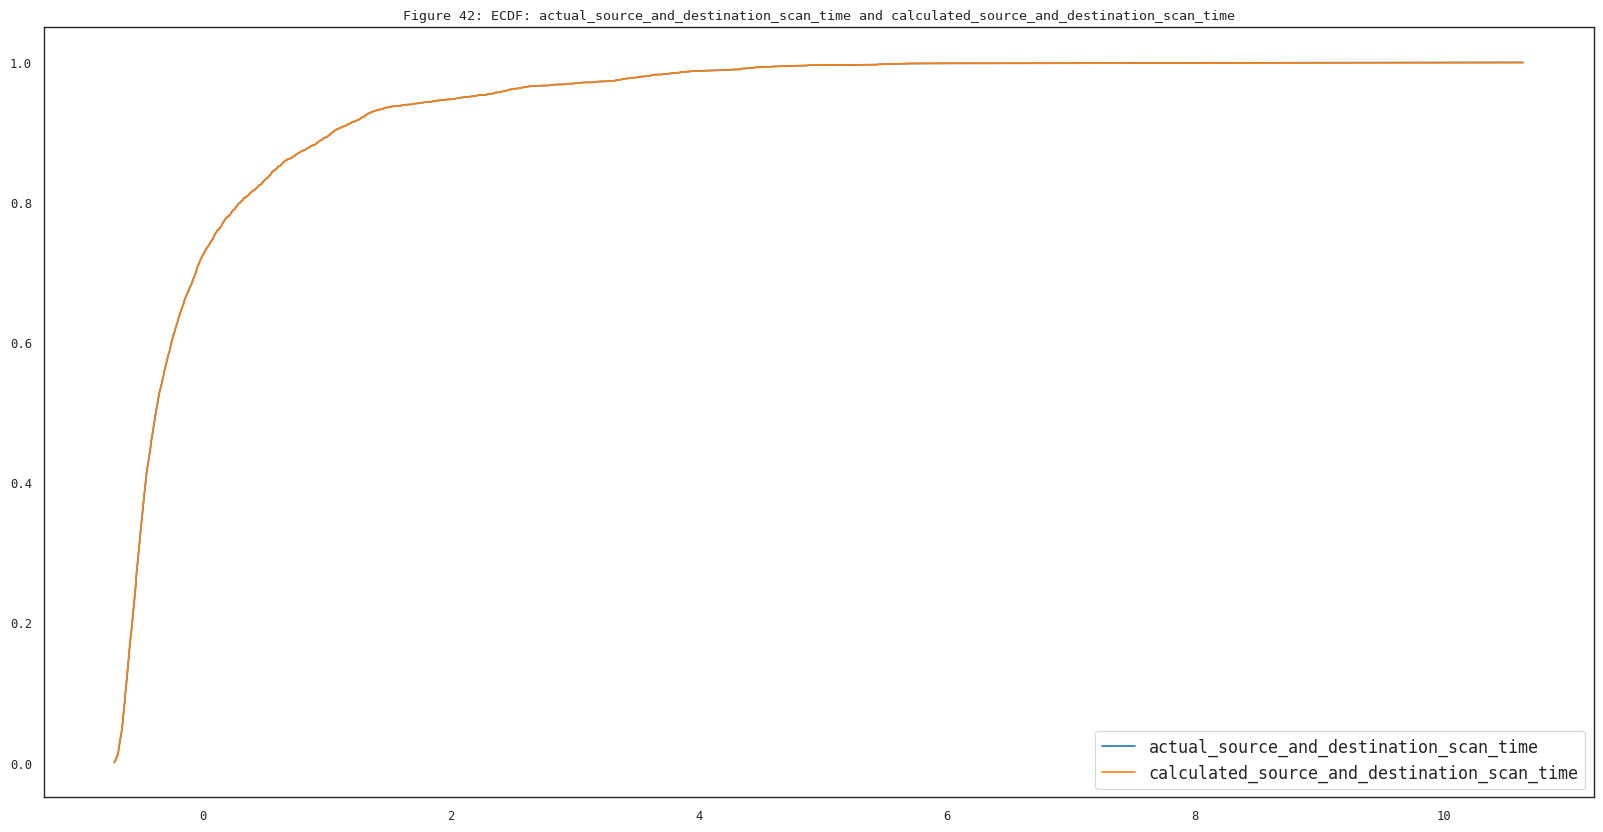





Performing KS-Test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 6.163626950405179e-39.
	Outcome: Distribution of actual_delivery_time != Distribution of predicted_delivery_time


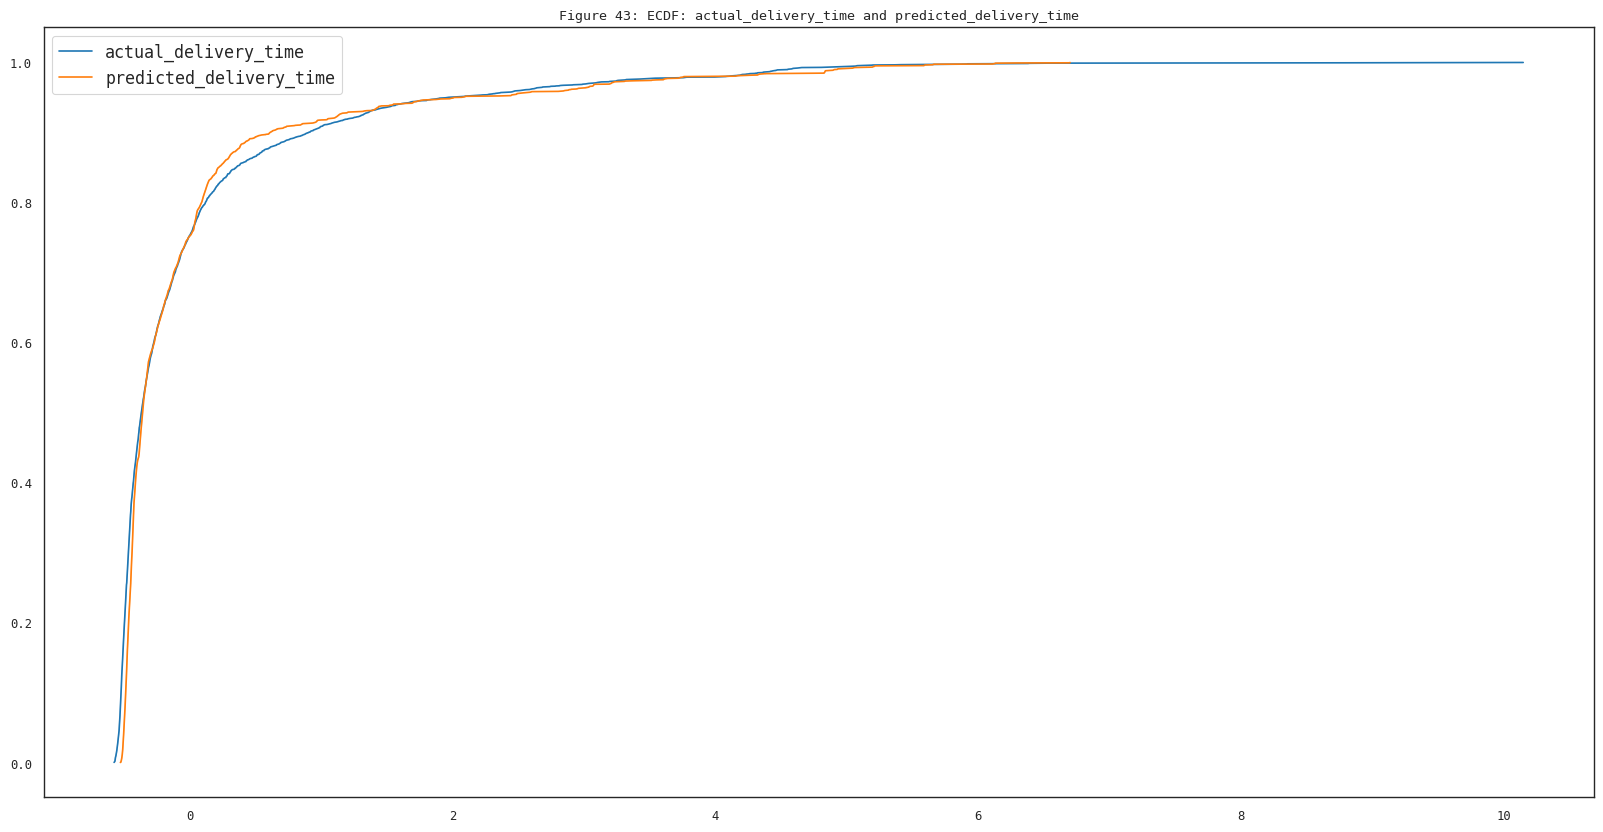





Performing KS-Test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 4.2410654184559913e-67.
	Outcome: Distribution of actual_segment_delivery_time != Distribution of predicted_segment_delivery_time


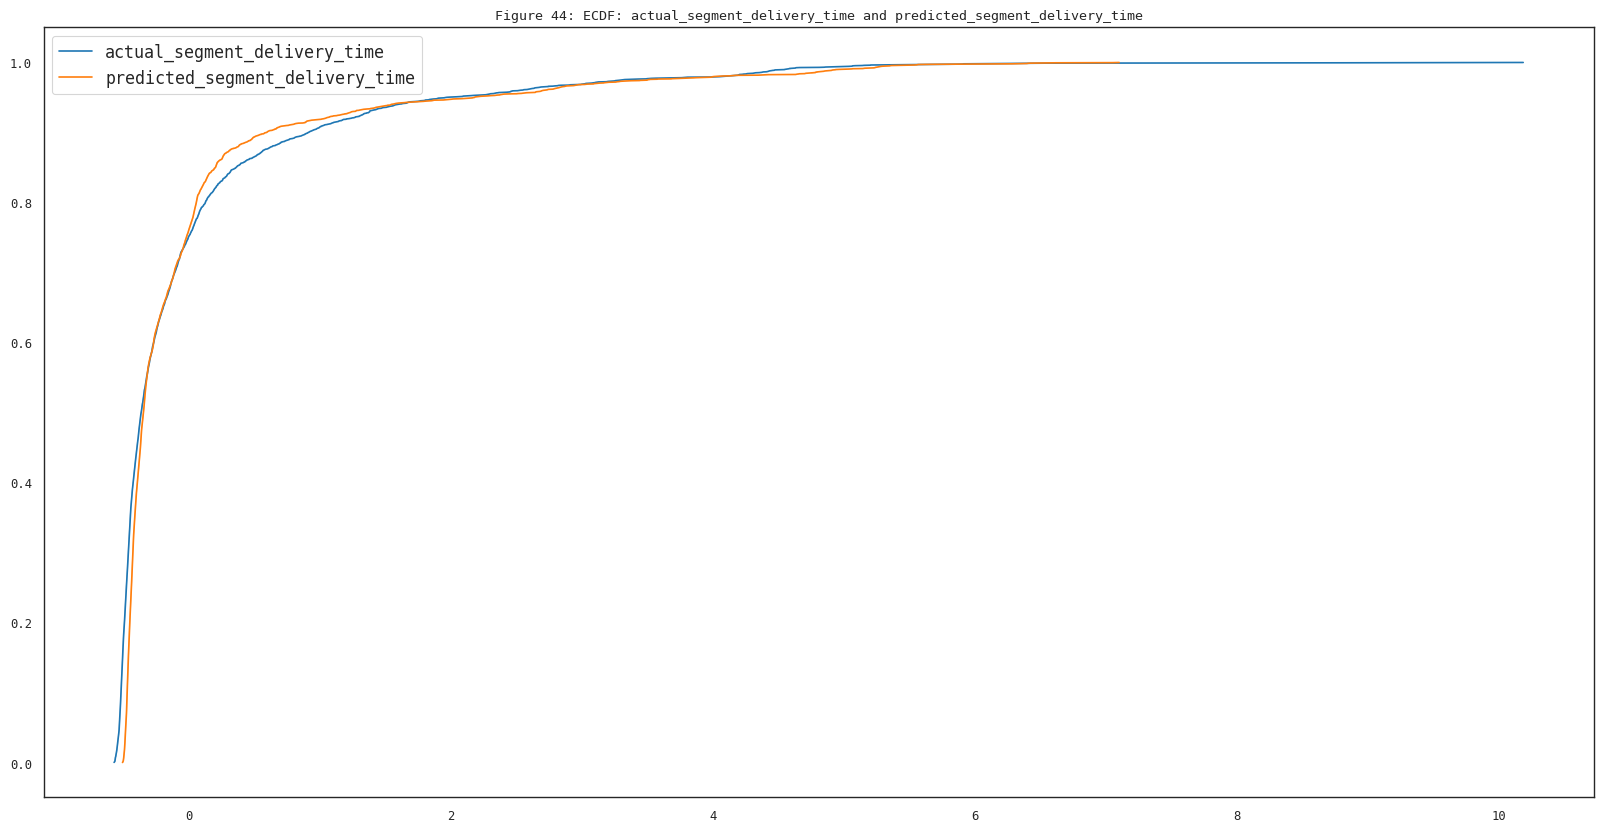





Performing KS-Test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9990320277516018) > 0.05.
	Outcome: Distribution of actual_delivery_time = Distribution of actual_segment_delivery_time


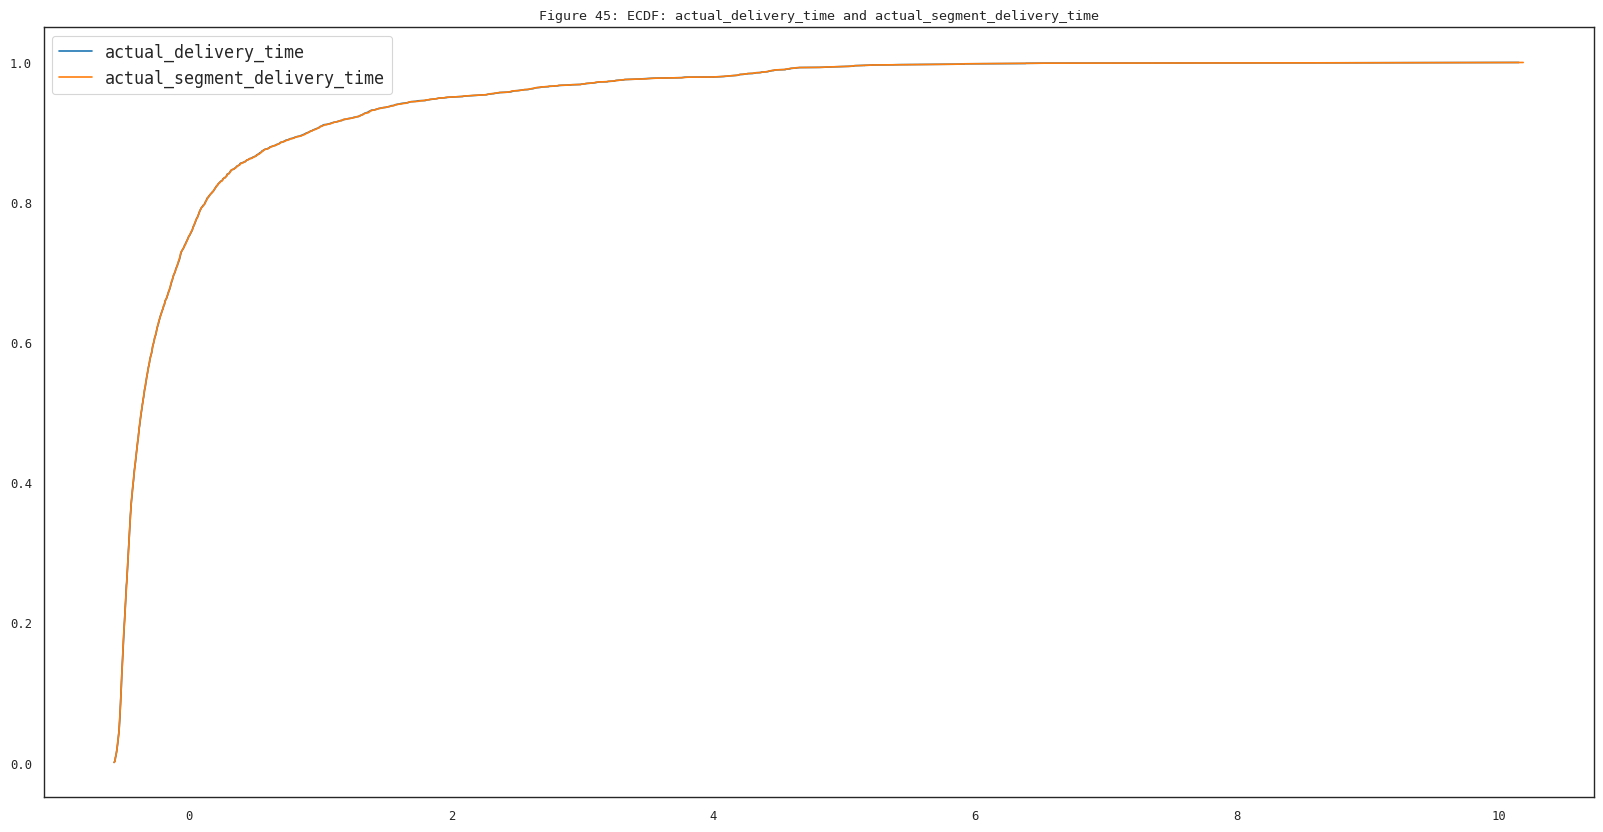





Performing KS-Test on predicted_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 2.6053413136965794e-09.
	Outcome: Distribution of predicted_delivery_time != Distribution of predicted_segment_delivery_time


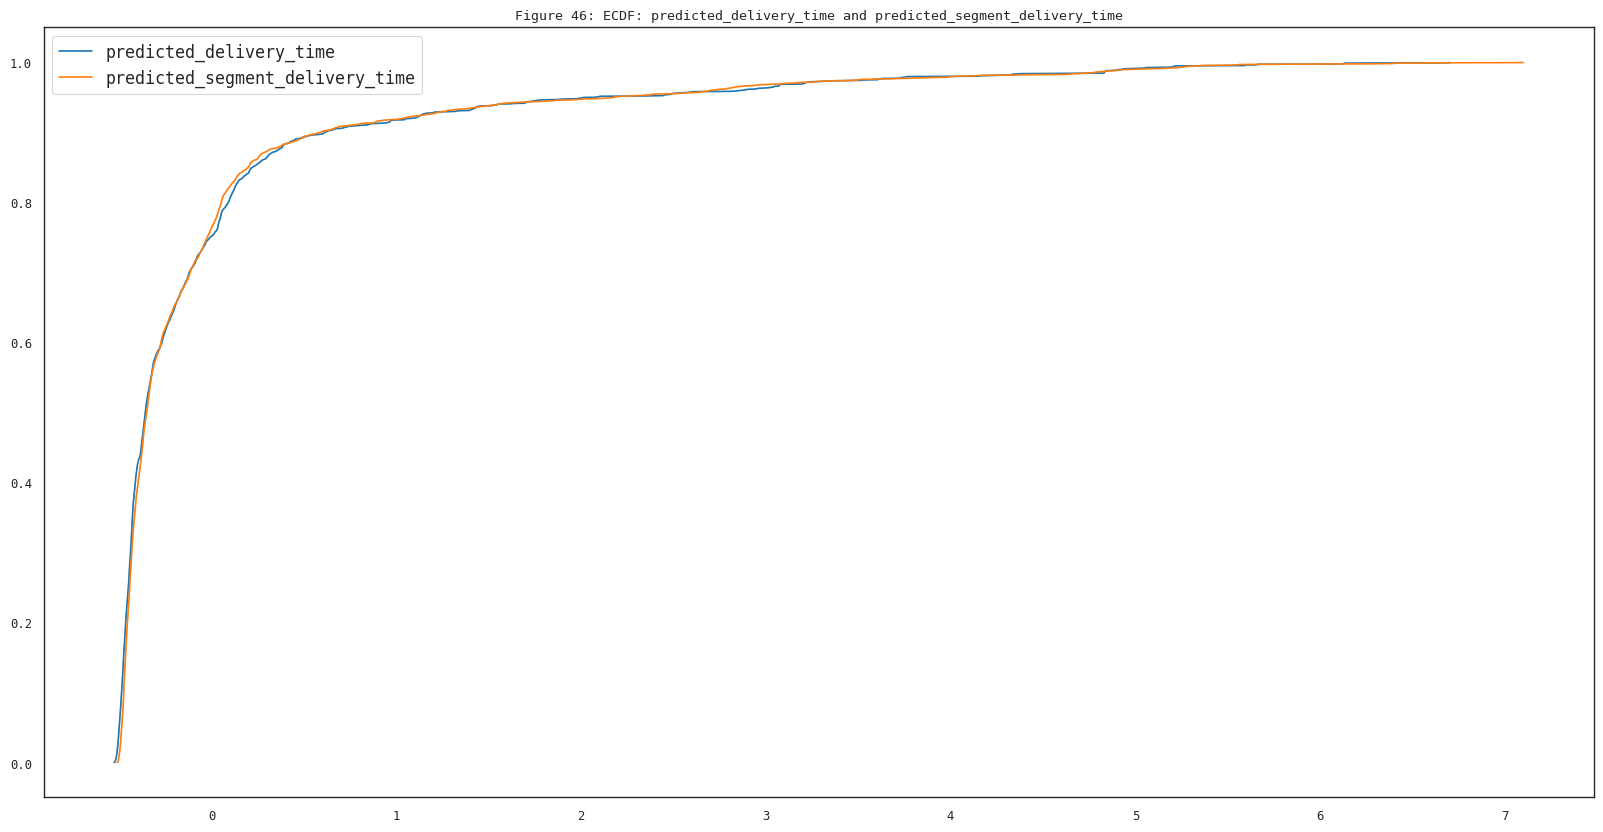





Performing KS-Test on actual_delivery_distance and predicted_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 0.0.
	Outcome: Distribution of actual_delivery_distance != Distribution of predicted_delivery_distance


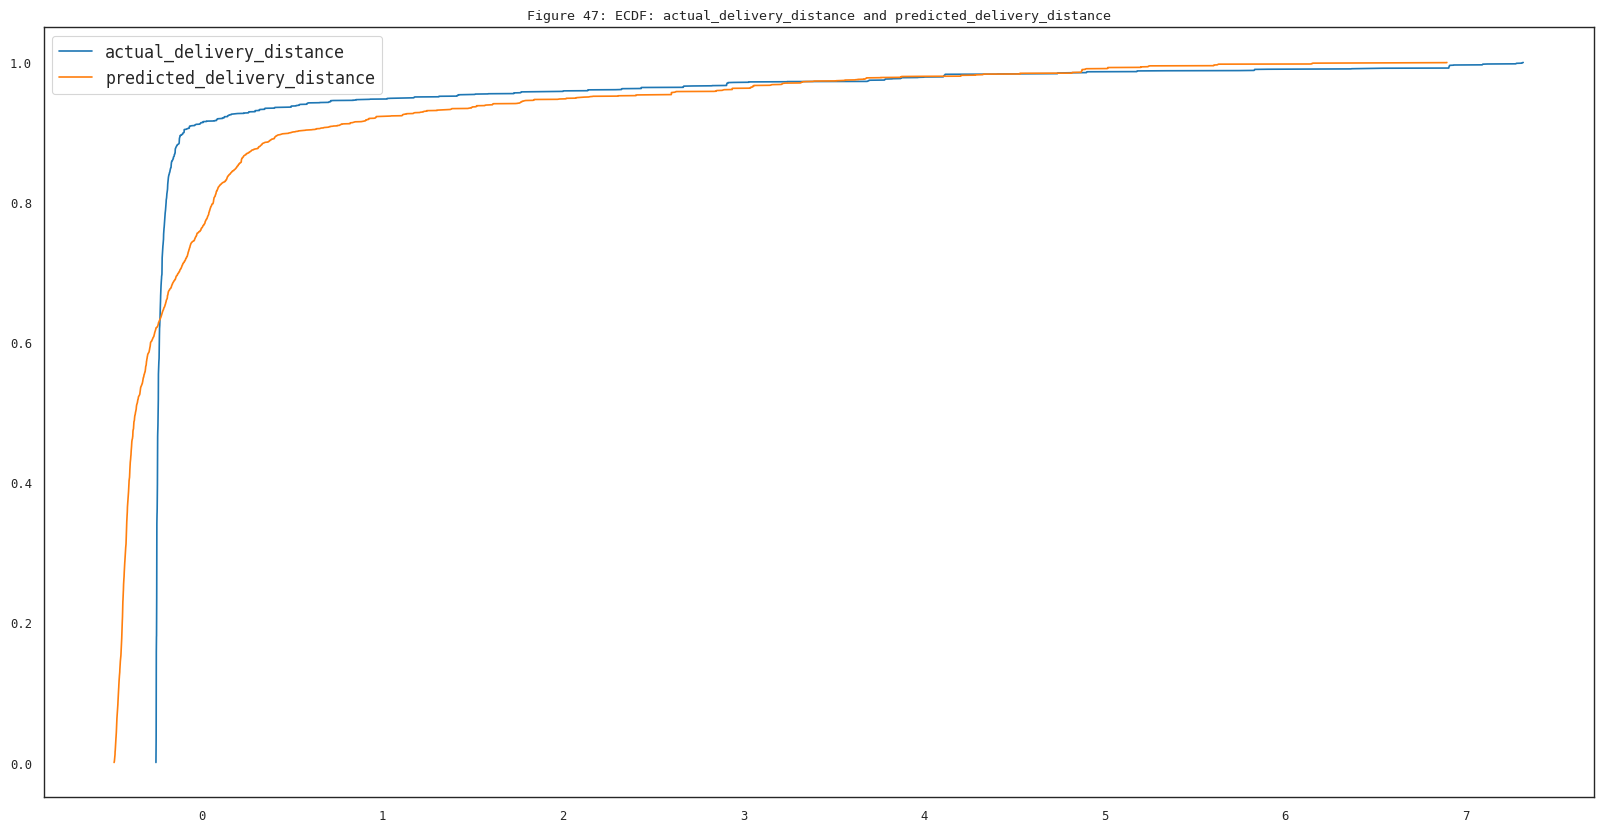





Performing KS-Test on predicted_delivery_distance and predicted_segment_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 7.199103263594234e-10.
	Outcome: Distribution of predicted_delivery_distance != Distribution of predicted_segment_delivery_distance


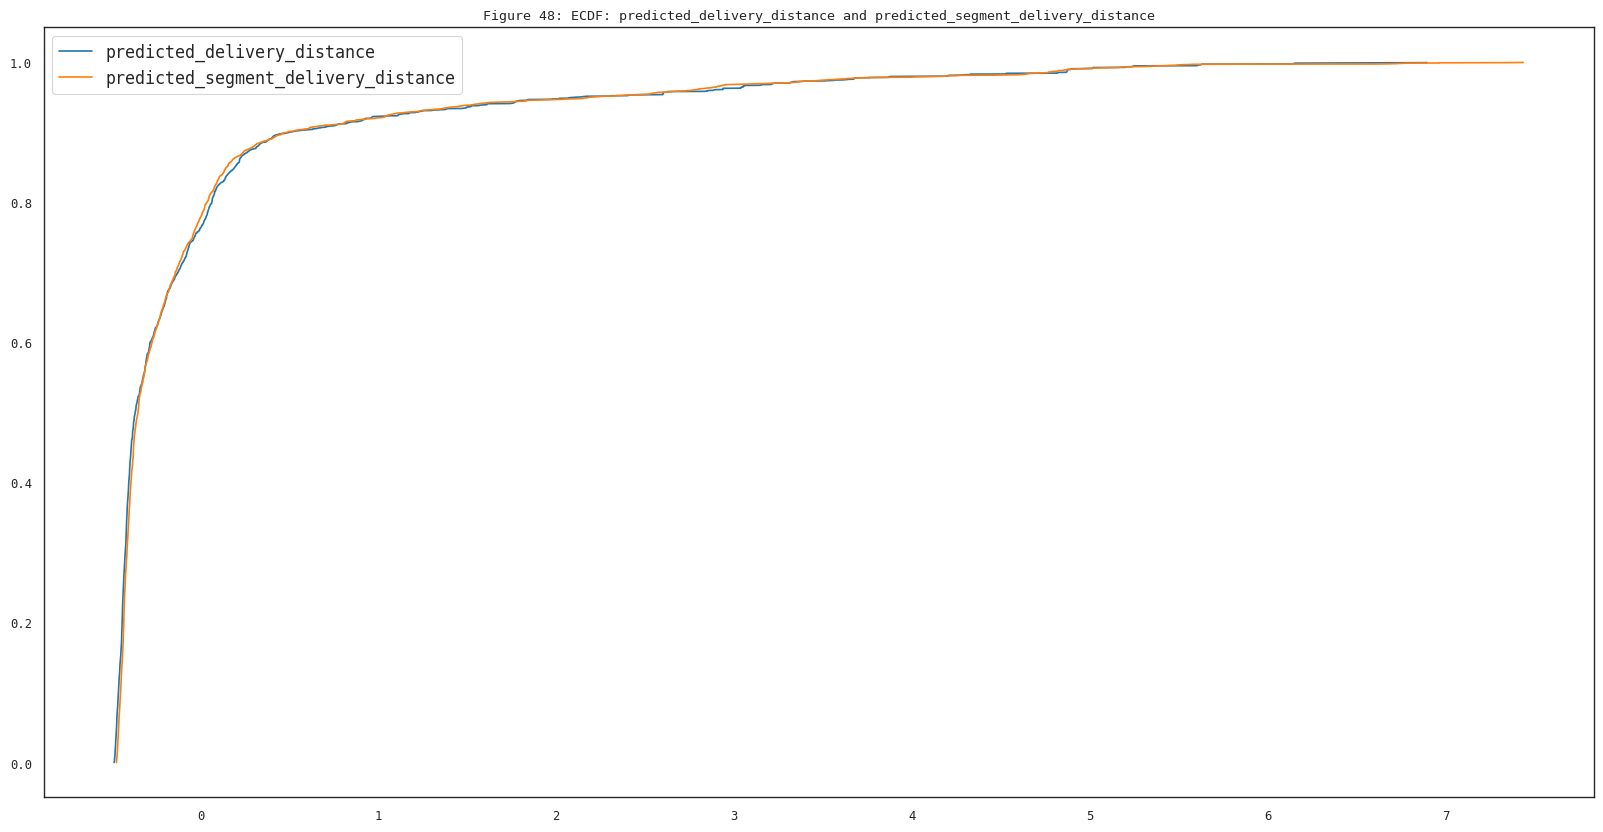





Performing Chi-Square Test on trip_creation_day_of_week and trip_creation_daytime_category.

	Failed to reject the Null Hypothesis because the p-value (0.4779633870579659) > 0.05.
	Outcome: trip_creation_day_of_week and trip_creation_daytime_category are independent of each other.




Performing Chi-Square Test on trip_creation_daytime_category and return_order.

	Rejecting the Null Hypothesis with the p-value of 1.3467400092279759e-14.
	Outcome: trip_creation_daytime_category and return_order are dependent on each other.




Performing Chi-Square Test on trip_creation_day_of_week and return_order.

	Failed to reject the Null Hypothesis because the p-value (0.8263456258131358) > 0.05.
	Outcome: trip_creation_day_of_week and return_order are independent of each other.






In [48]:
# performing Hypothesis Tests on test datasets
tests_before_outlier_treatment_test_data = HypothesisTesting(final_test_df, 0.05, 30, tests_before_outlier_treatment_train_data.fig_num)

tests_before_outlier_treatment_test_data.perform_ttest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_before_outlier_treatment_test_data.perform_ttest('actual_delivery_time', 'predicted_delivery_time')
tests_before_outlier_treatment_test_data.perform_ttest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_ttest('actual_delivery_time', 'actual_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_ttest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_ttest('actual_delivery_distance', 'predicted_delivery_distance')
tests_before_outlier_treatment_test_data.perform_ttest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_before_outlier_treatment_test_data.perform_kstest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_before_outlier_treatment_test_data.perform_kstest('actual_delivery_time', 'predicted_delivery_time')
tests_before_outlier_treatment_test_data.perform_kstest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_kstest('actual_delivery_time', 'actual_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_kstest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_before_outlier_treatment_test_data.perform_kstest('actual_delivery_distance', 'predicted_delivery_distance')
tests_before_outlier_treatment_test_data.perform_kstest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_before_outlier_treatment_test_data.perform_chisquare_test('trip_creation_day_of_week', 'trip_creation_daytime_category')
tests_before_outlier_treatment_test_data.perform_chisquare_test('trip_creation_daytime_category', 'return_order')
tests_before_outlier_treatment_test_data.perform_chisquare_test('trip_creation_day_of_week', 'return_order')

In [49]:
def calculate_iqr(series):
    '''
    The function calculate IQR and return lower and upper bound values.
    
    :param
        series: pd.Series
    
    :return
        lower_bound: int - lower bound below which all the values are outliers
        upper_bound: int - upper bound above which all the values are outliers
    '''

    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound


def outlier_treatment(dataframe, column_list):
    '''
    The function drop all the rows with outlying values in the list of columns.
    
    :param
        dataframe: pd.DataFrame
        column_list: list of columns to treat outliers in
    
    :return
        dataframe: pd.DataFrame
    '''
    all_indexes_to_drop = []
    for col in column_list:
        lower_bound, upper_bound = calculate_iqr(dataframe[col])
        outlier_boolean_mask = dataframe[col].apply(lambda x: True if (x >= upper_bound or x <= lower_bound) else False)
        
        assert dataframe[outlier_boolean_mask].shape[0] == outlier_boolean_mask.value_counts()[True]
        assert dataframe[outlier_boolean_mask].shape[1] == 26
        all_indexes_to_drop.extend(dataframe.index[outlier_boolean_mask].tolist())
    
    print(f'Percent Outliers: {round(100 * len(list(set(all_indexes_to_drop))) / dataframe.shape[0], 3)}%')
    dataframe.drop(list(set(all_indexes_to_drop)), axis=0, inplace=True)
    
    return dataframe

float_column_list = ['actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time', 'actual_delivery_time', 'predicted_delivery_time', 'actual_segment_delivery_time', 'predicted_segment_delivery_time', 'actual_delivery_distance', 'predicted_delivery_distance', 'predicted_segment_delivery_distance']

print(f'Shape of training data before dropping outliers: {final_train_df.shape}')
final_train_df = outlier_treatment(final_train_df, float_column_list)
print(f'Shape of training data after dropping outliers: {final_train_df.shape}')
print()
print(f'Shape of testing data before dropping outliers: {final_test_df.shape}')
final_test_df = outlier_treatment(final_test_df, float_column_list)
print(f'Shape of testing data before dropping outliers: {final_test_df.shape}')

Shape of training data before dropping outliers: (10645, 26)
Percent Outliers: 17.313%
Shape of training data after dropping outliers: (8802, 26)

Shape of testing data before dropping outliers: (4142, 26)
Percent Outliers: 17.069%
Shape of testing data before dropping outliers: (3435, 26)


Object instantiated successfully

Performing independent T-test on actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.

	Failed to reject the Null Hypothesis because the p-value (0.9952873190415493) > 0.05.
	Outcome: μ(actual_source_and_destination_scan_time) = μ(calculated_source_and_destination_scan_time)




Performing independent T-test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 0.0027755611279268923.
	Outcome: μ(actual_delivery_time) != μ(predicted_delivery_time)




Performing independent T-test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 9.382025156821082e-06.
	Outcome: μ(actual_segment_delivery_time) != μ(predicted_segment_delivery_time)




Performing independent T-test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9908917417051955

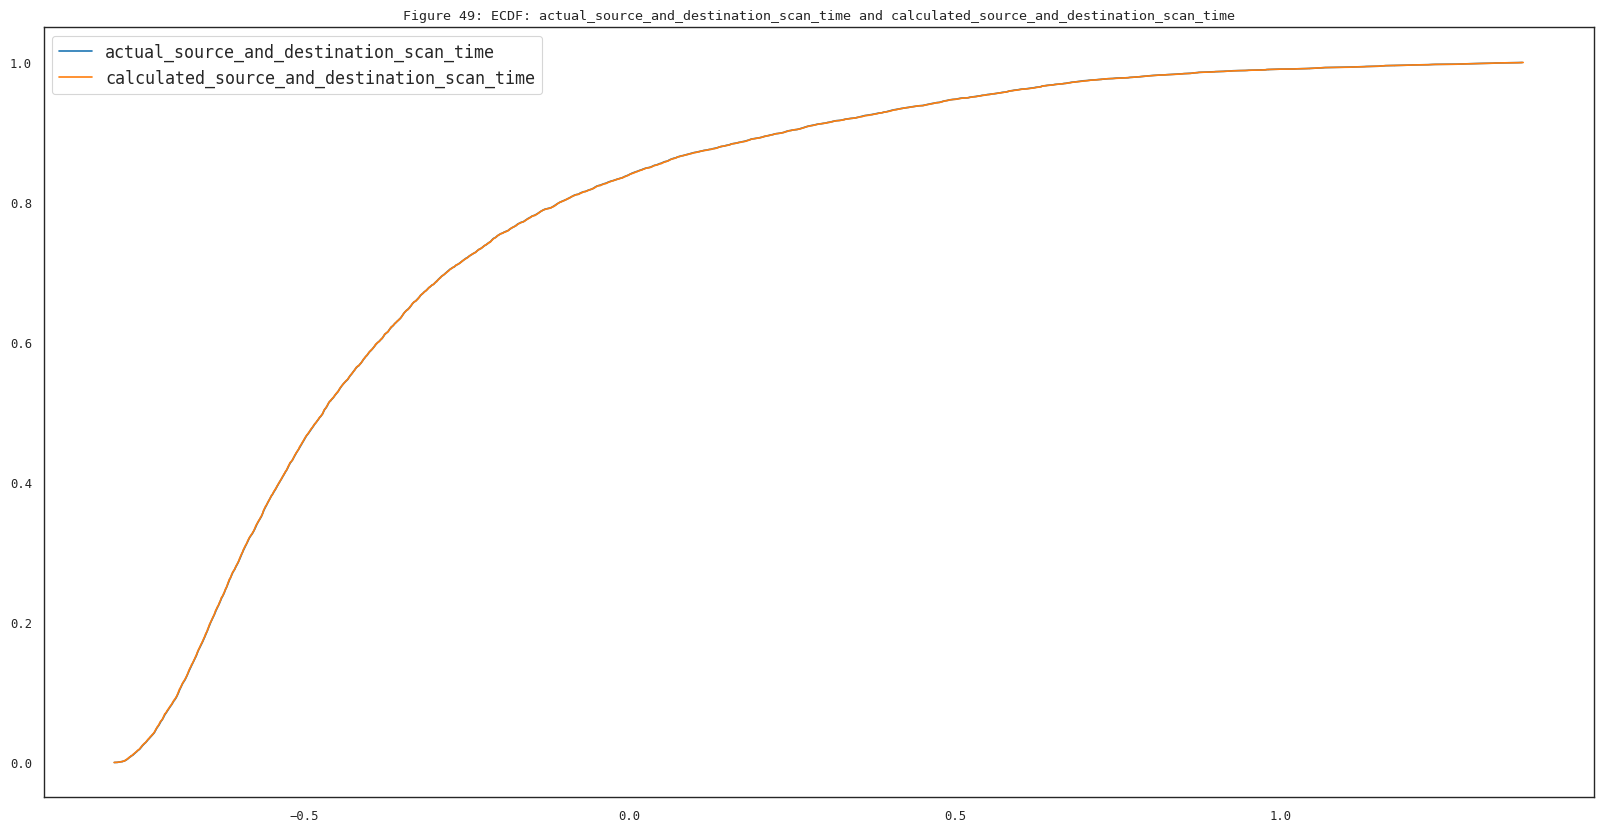





Performing KS-Test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 1.1968177613242644e-78.
	Outcome: Distribution of actual_delivery_time != Distribution of predicted_delivery_time


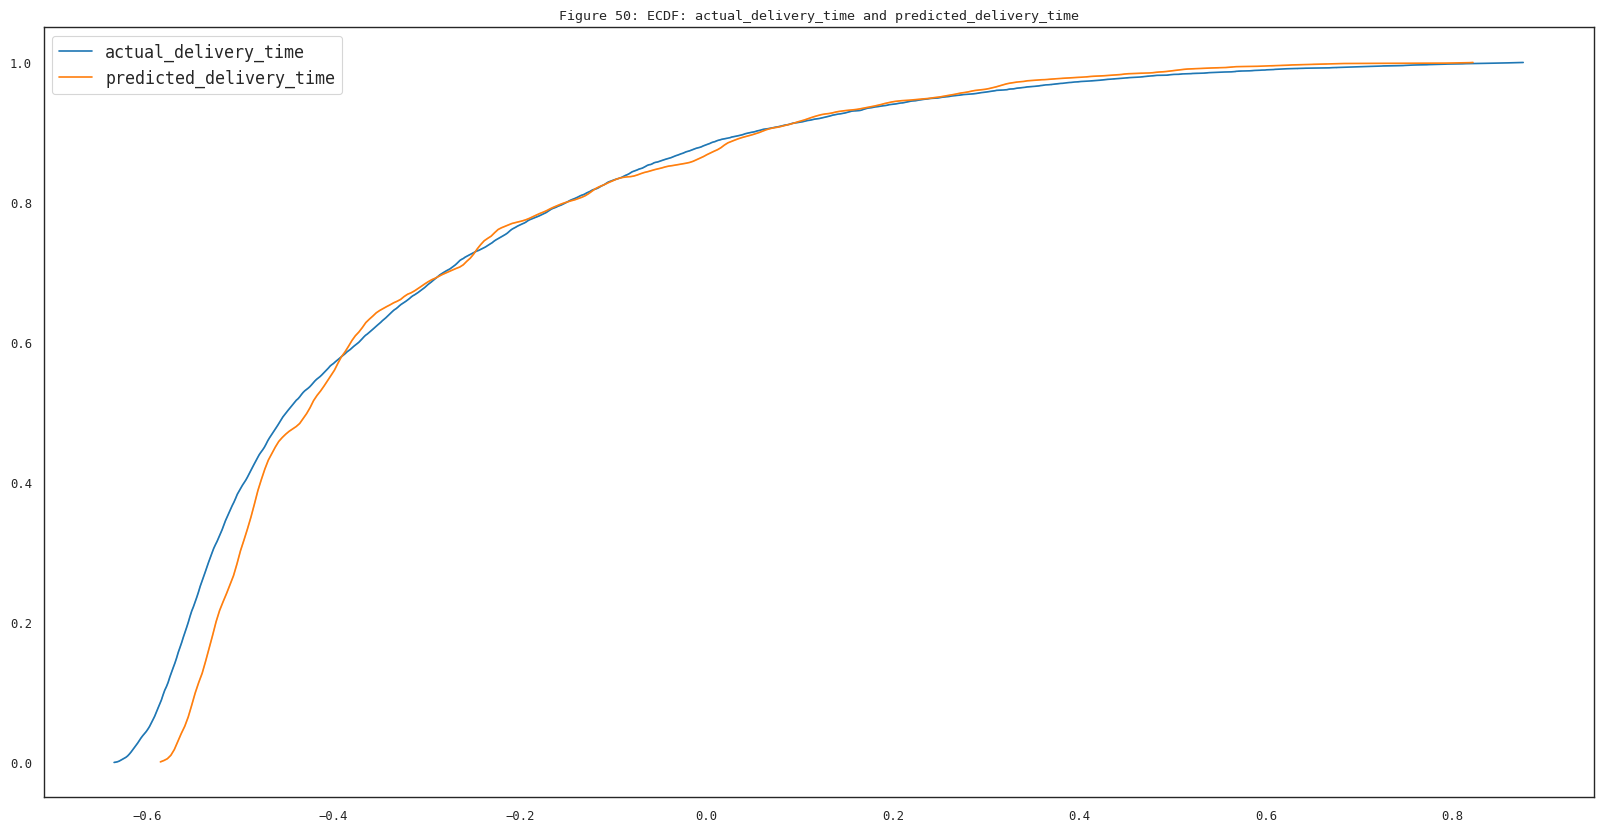





Performing KS-Test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 3.3730414594723966e-140.
	Outcome: Distribution of actual_segment_delivery_time != Distribution of predicted_segment_delivery_time


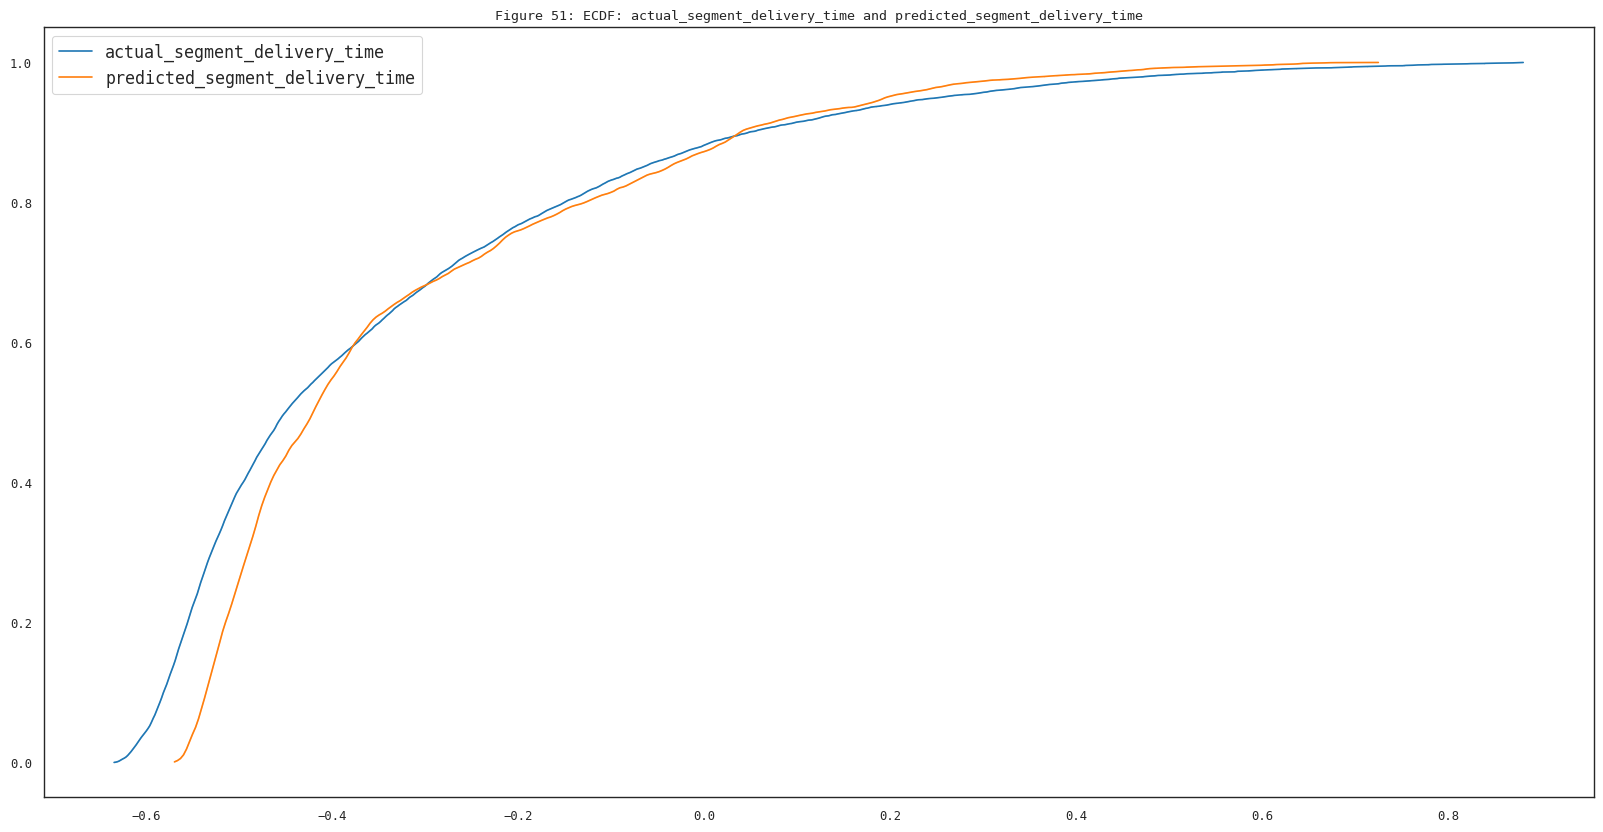





Performing KS-Test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9226433646654854) > 0.05.
	Outcome: Distribution of actual_delivery_time = Distribution of actual_segment_delivery_time


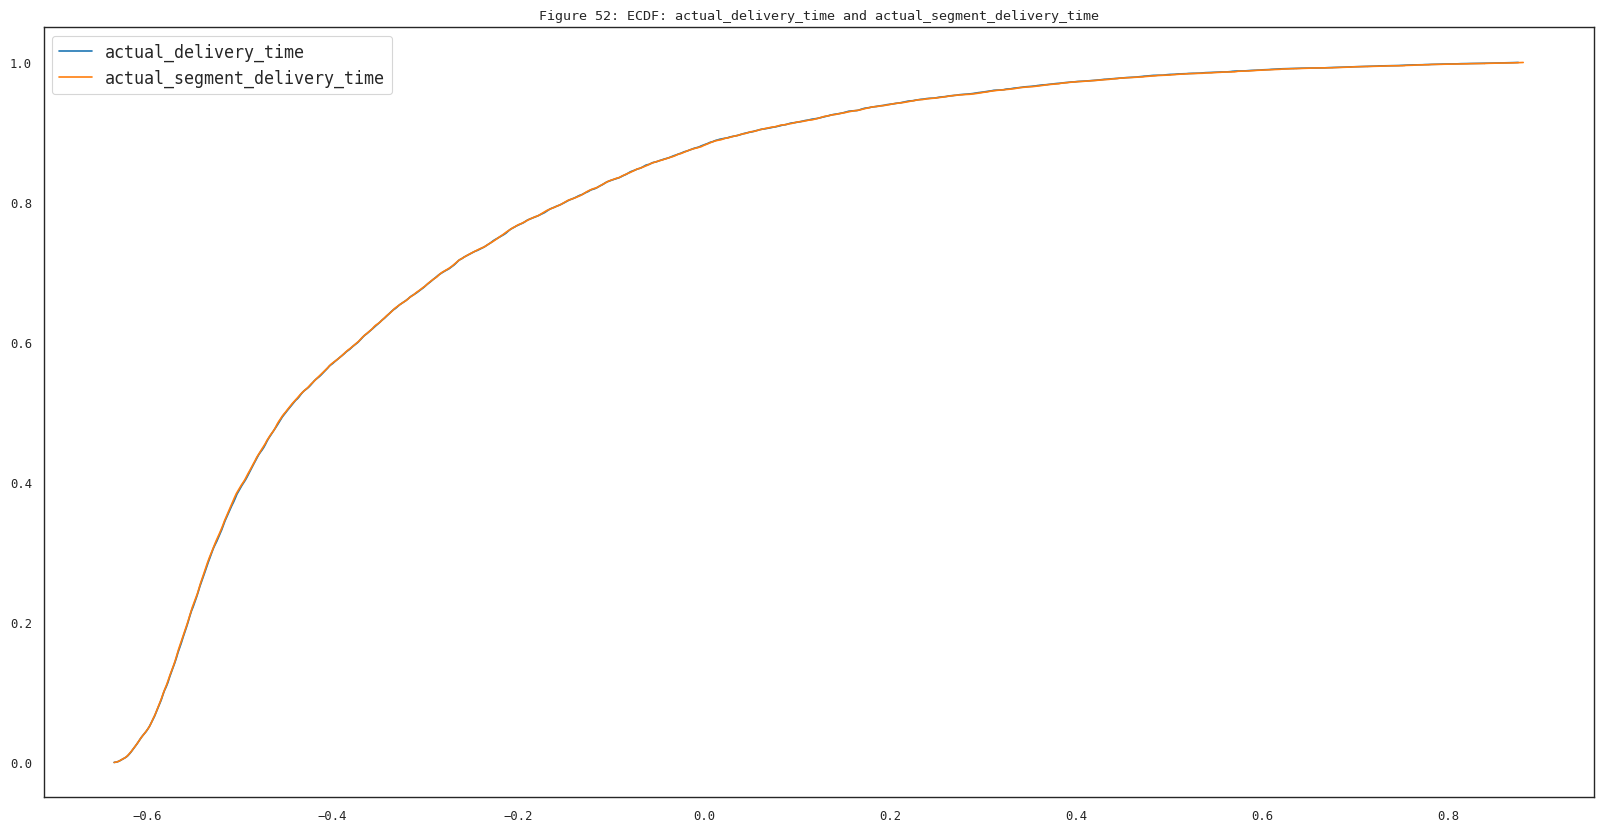





Performing KS-Test on predicted_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 8.323136026020743e-17.
	Outcome: Distribution of predicted_delivery_time != Distribution of predicted_segment_delivery_time


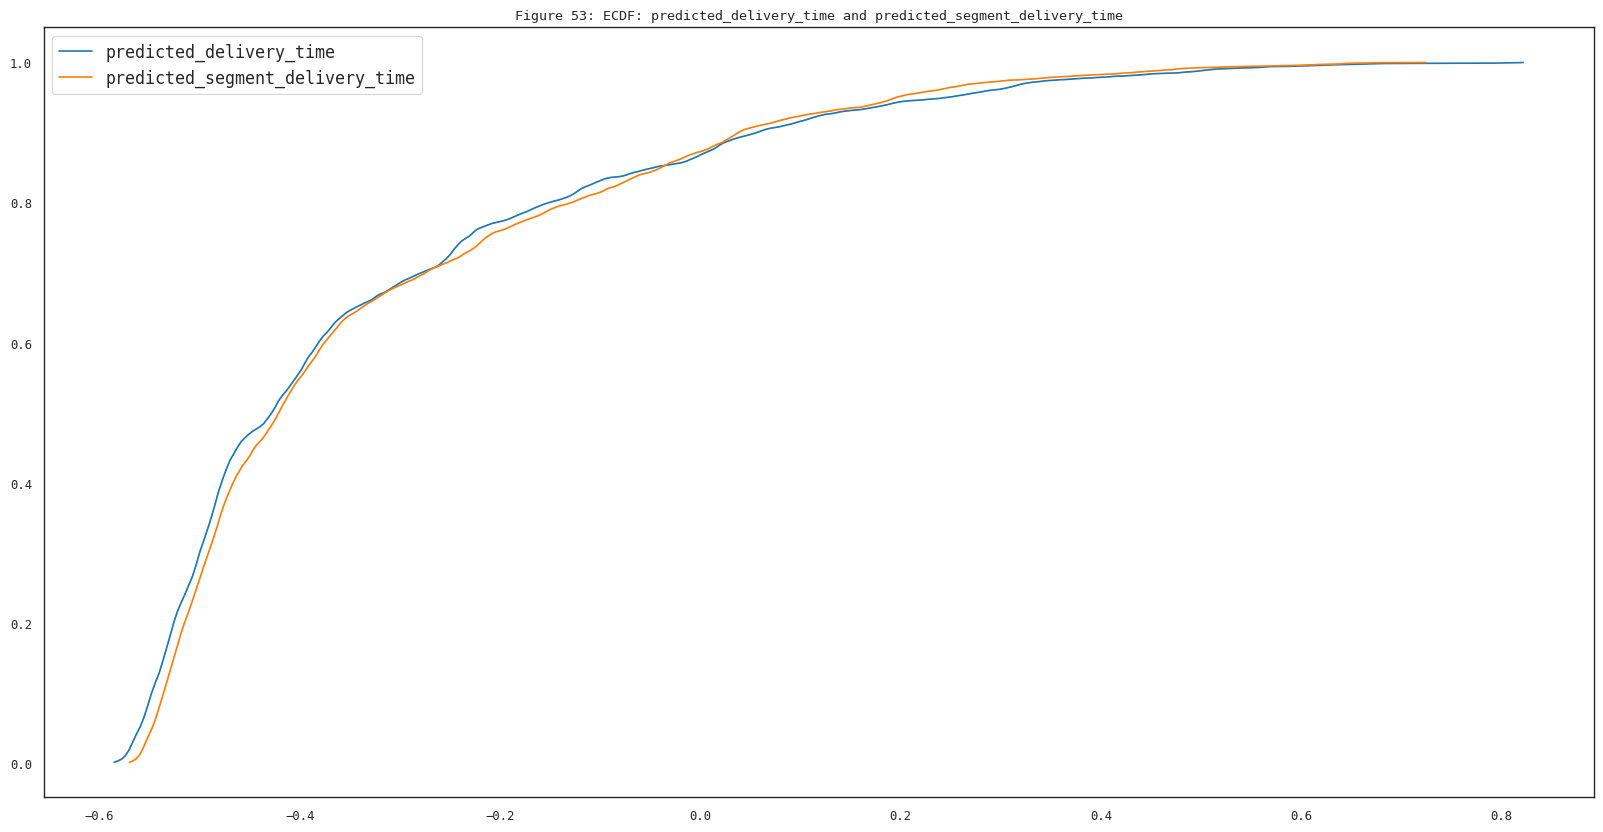





Performing KS-Test on actual_delivery_distance and predicted_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 0.0.
	Outcome: Distribution of actual_delivery_distance != Distribution of predicted_delivery_distance


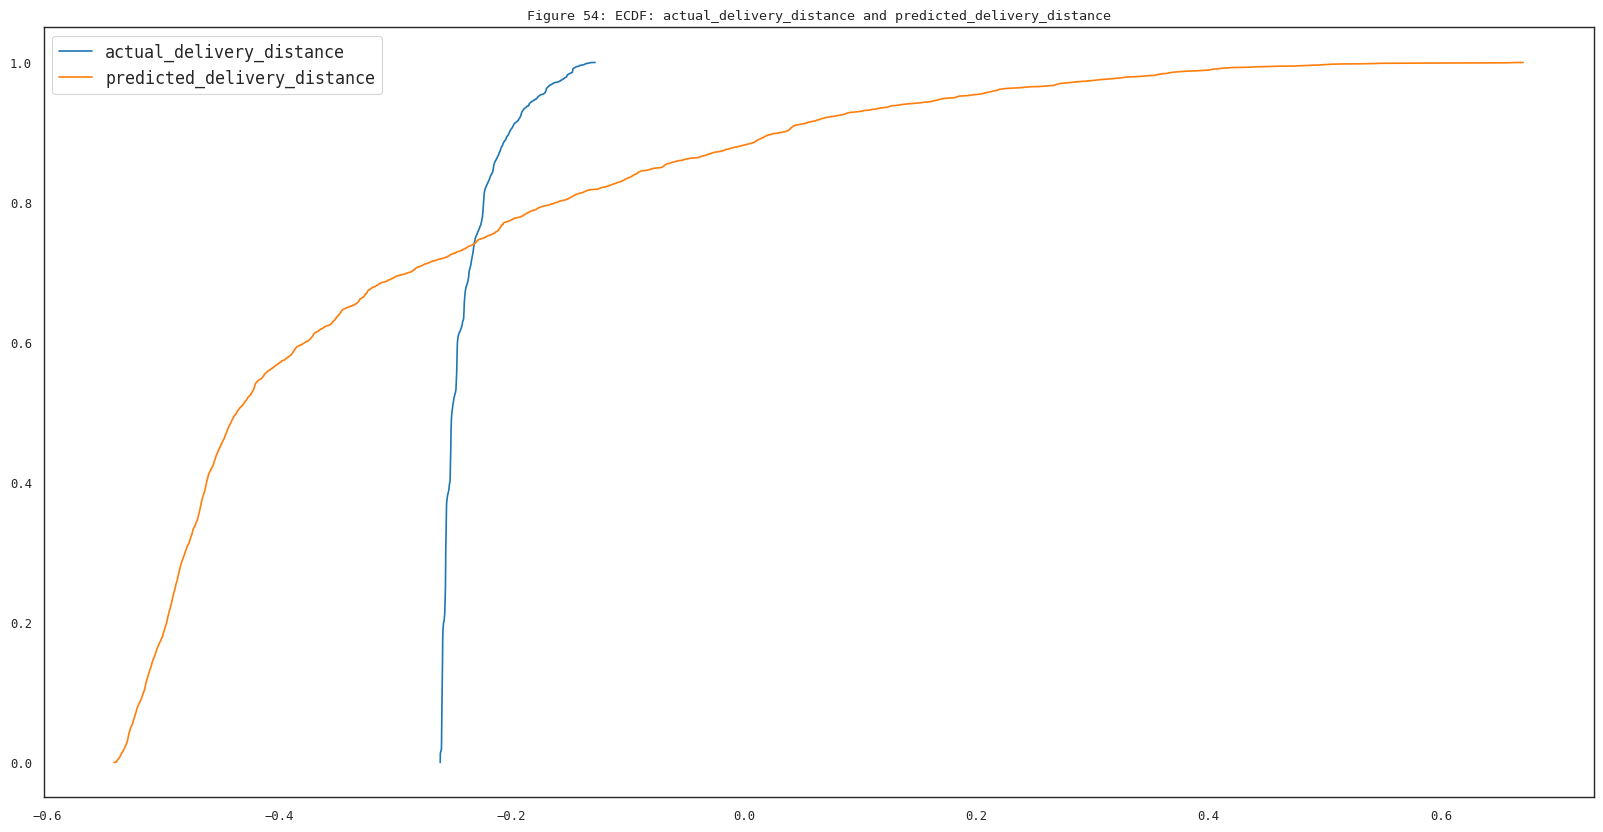





Performing KS-Test on predicted_delivery_distance and predicted_segment_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 5.403852106398502e-23.
	Outcome: Distribution of predicted_delivery_distance != Distribution of predicted_segment_delivery_distance


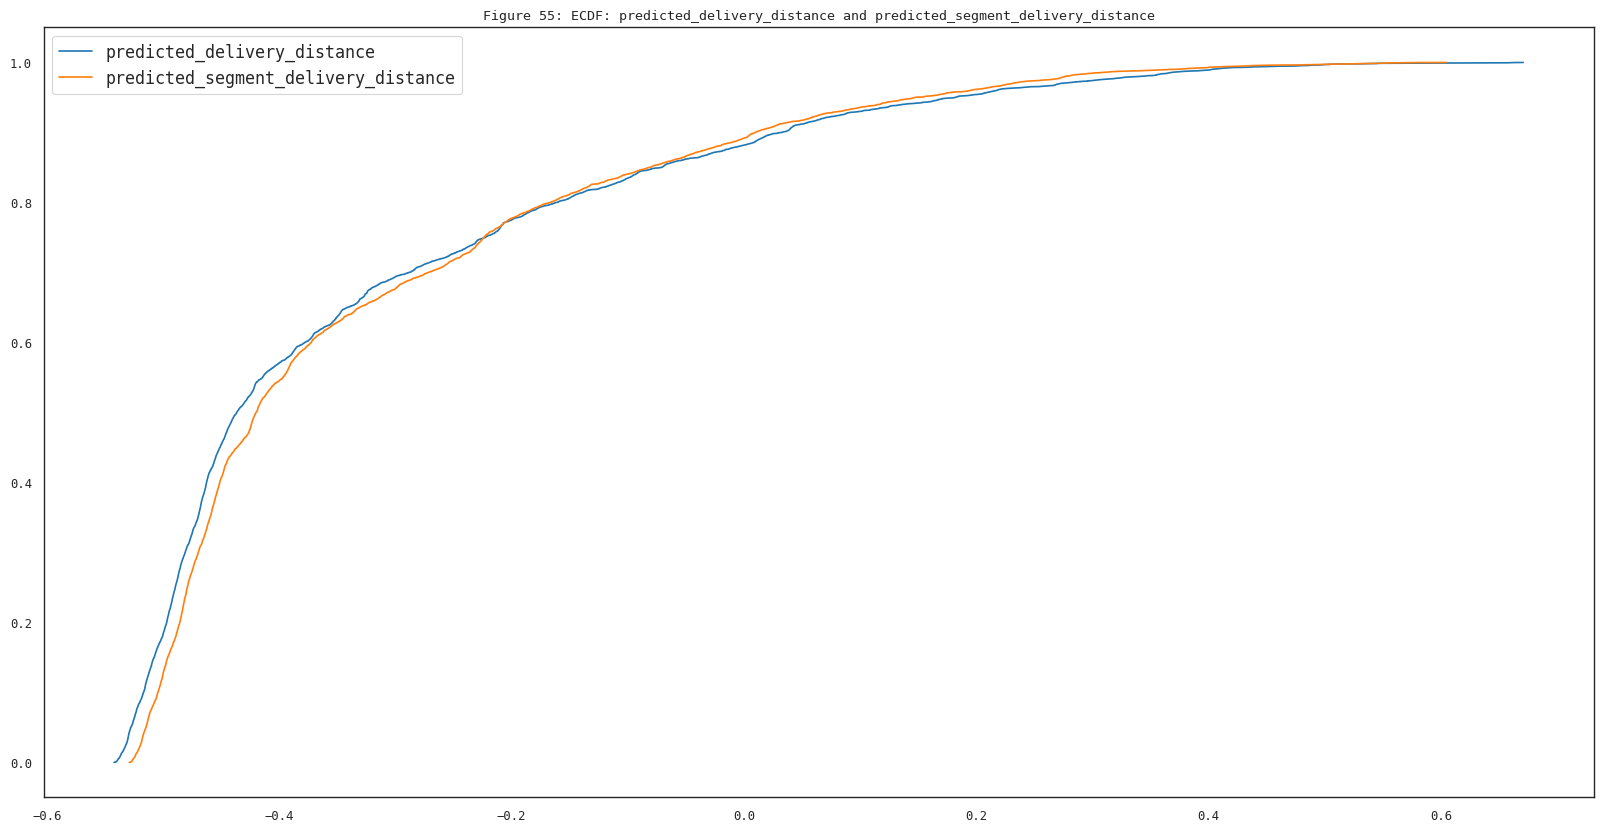





Performing Chi-Square Test on trip_creation_day_of_week and trip_creation_daytime_category.

	Rejecting the Null Hypothesis with the p-value of 0.00024982327034516.
	Outcome: trip_creation_day_of_week and trip_creation_daytime_category are dependent on each other.




Performing Chi-Square Test on trip_creation_daytime_category and return_order.

	Rejecting the Null Hypothesis with the p-value of 1.062242832100094e-17.
	Outcome: trip_creation_daytime_category and return_order are dependent on each other.




Performing Chi-Square Test on trip_creation_day_of_week and return_order.

	Failed to reject the Null Hypothesis because the p-value (0.7301267182060411) > 0.05.
	Outcome: trip_creation_day_of_week and return_order are independent of each other.






In [50]:
# performing Hypothesis Tests on training datasets after removing outliers
tests_after_outlier_treatment_train_data = HypothesisTesting(final_train_df, 0.05, 30, tests_before_outlier_treatment_test_data.fig_num)

tests_after_outlier_treatment_train_data.perform_ttest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_after_outlier_treatment_train_data.perform_ttest('actual_delivery_time', 'predicted_delivery_time')
tests_after_outlier_treatment_train_data.perform_ttest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_ttest('actual_delivery_time', 'actual_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_ttest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_ttest('actual_delivery_distance', 'predicted_delivery_distance')
tests_after_outlier_treatment_train_data.perform_ttest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_after_outlier_treatment_train_data.perform_kstest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_after_outlier_treatment_train_data.perform_kstest('actual_delivery_time', 'predicted_delivery_time')
tests_after_outlier_treatment_train_data.perform_kstest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_kstest('actual_delivery_time', 'actual_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_kstest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_train_data.perform_kstest('actual_delivery_distance', 'predicted_delivery_distance')
tests_after_outlier_treatment_train_data.perform_kstest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_after_outlier_treatment_train_data.perform_chisquare_test('trip_creation_day_of_week', 'trip_creation_daytime_category')
tests_after_outlier_treatment_train_data.perform_chisquare_test('trip_creation_daytime_category', 'return_order')
tests_after_outlier_treatment_train_data.perform_chisquare_test('trip_creation_day_of_week', 'return_order')

Object instantiated successfully

Performing independent T-test on actual_source_and_destination_scan_time and calculated_source_and_destination_scan_time.

	Failed to reject the Null Hypothesis because the p-value (0.9952873190415493) > 0.05.
	Outcome: μ(actual_source_and_destination_scan_time) = μ(calculated_source_and_destination_scan_time)




Performing independent T-test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 0.0027755611279268923.
	Outcome: μ(actual_delivery_time) != μ(predicted_delivery_time)




Performing independent T-test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 9.382025156821082e-06.
	Outcome: μ(actual_segment_delivery_time) != μ(predicted_segment_delivery_time)




Performing independent T-test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9908917417051955

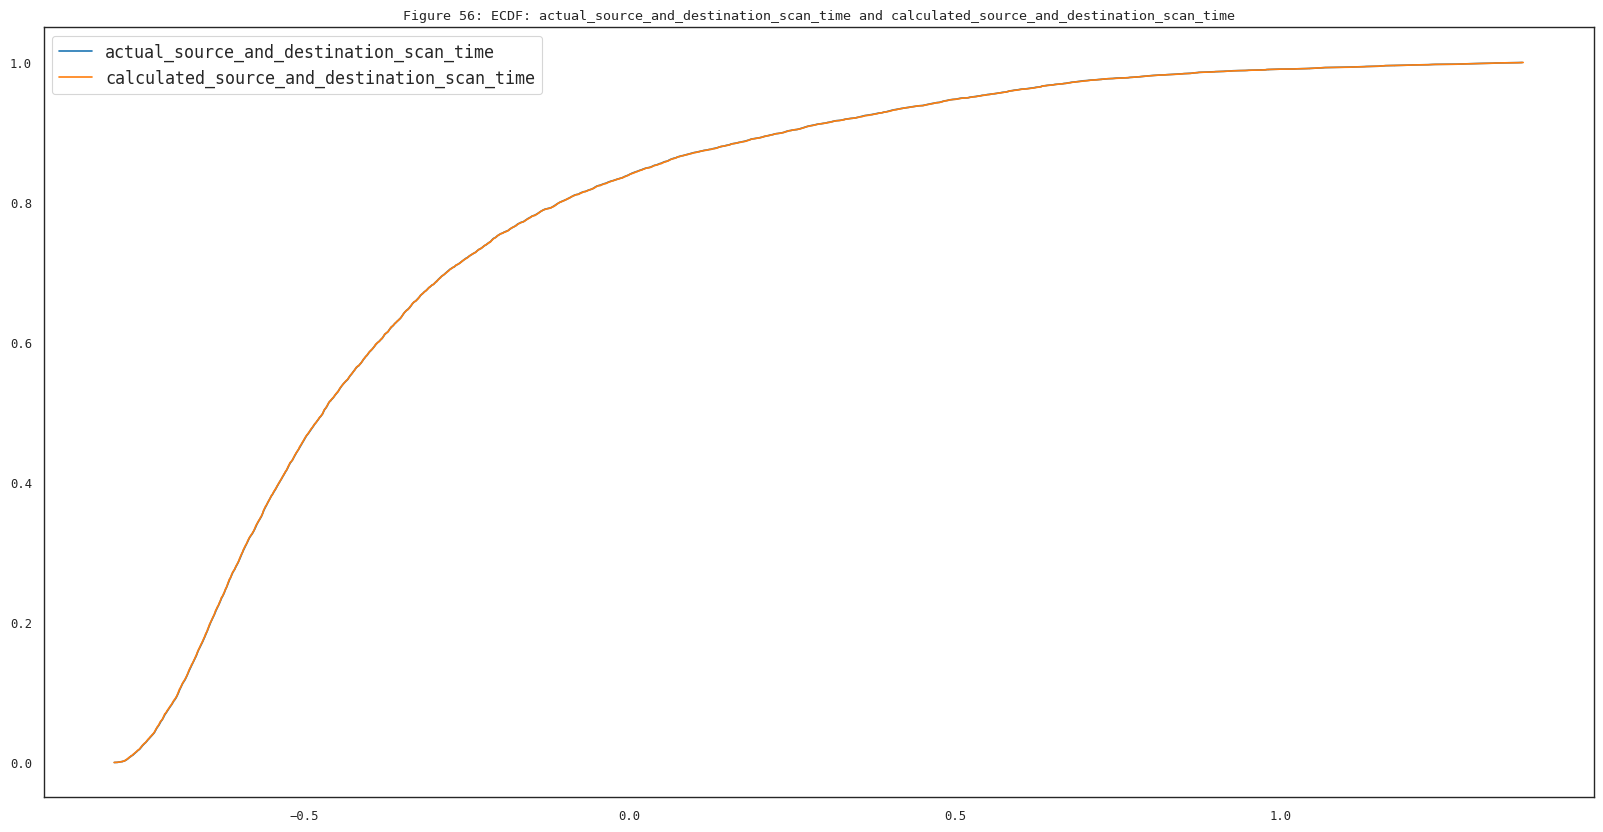





Performing KS-Test on actual_delivery_time and predicted_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 1.1968177613242644e-78.
	Outcome: Distribution of actual_delivery_time != Distribution of predicted_delivery_time


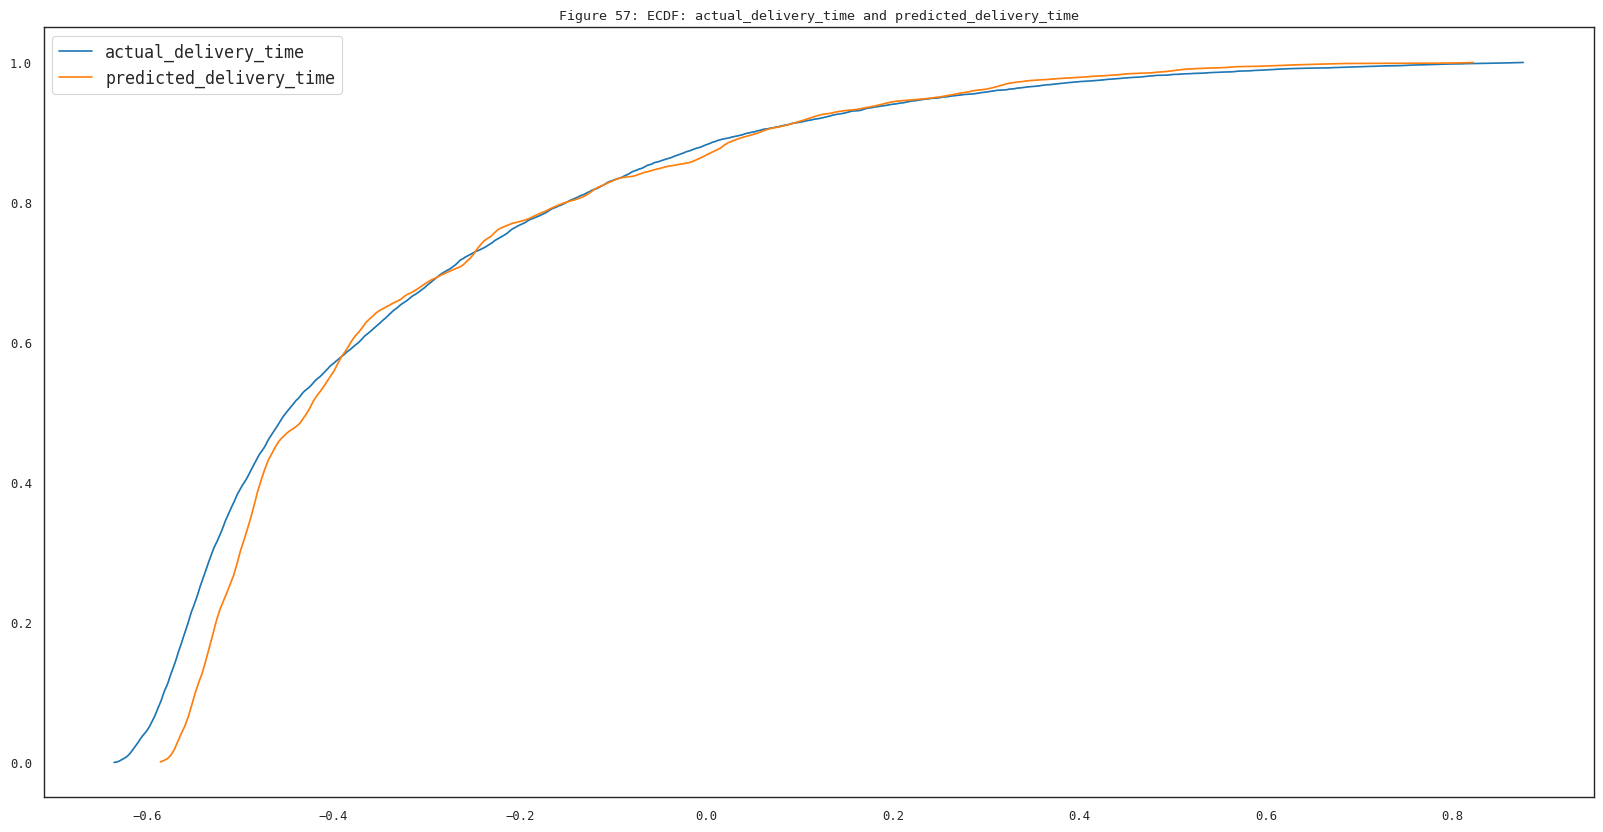





Performing KS-Test on actual_segment_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 3.3730414594723966e-140.
	Outcome: Distribution of actual_segment_delivery_time != Distribution of predicted_segment_delivery_time


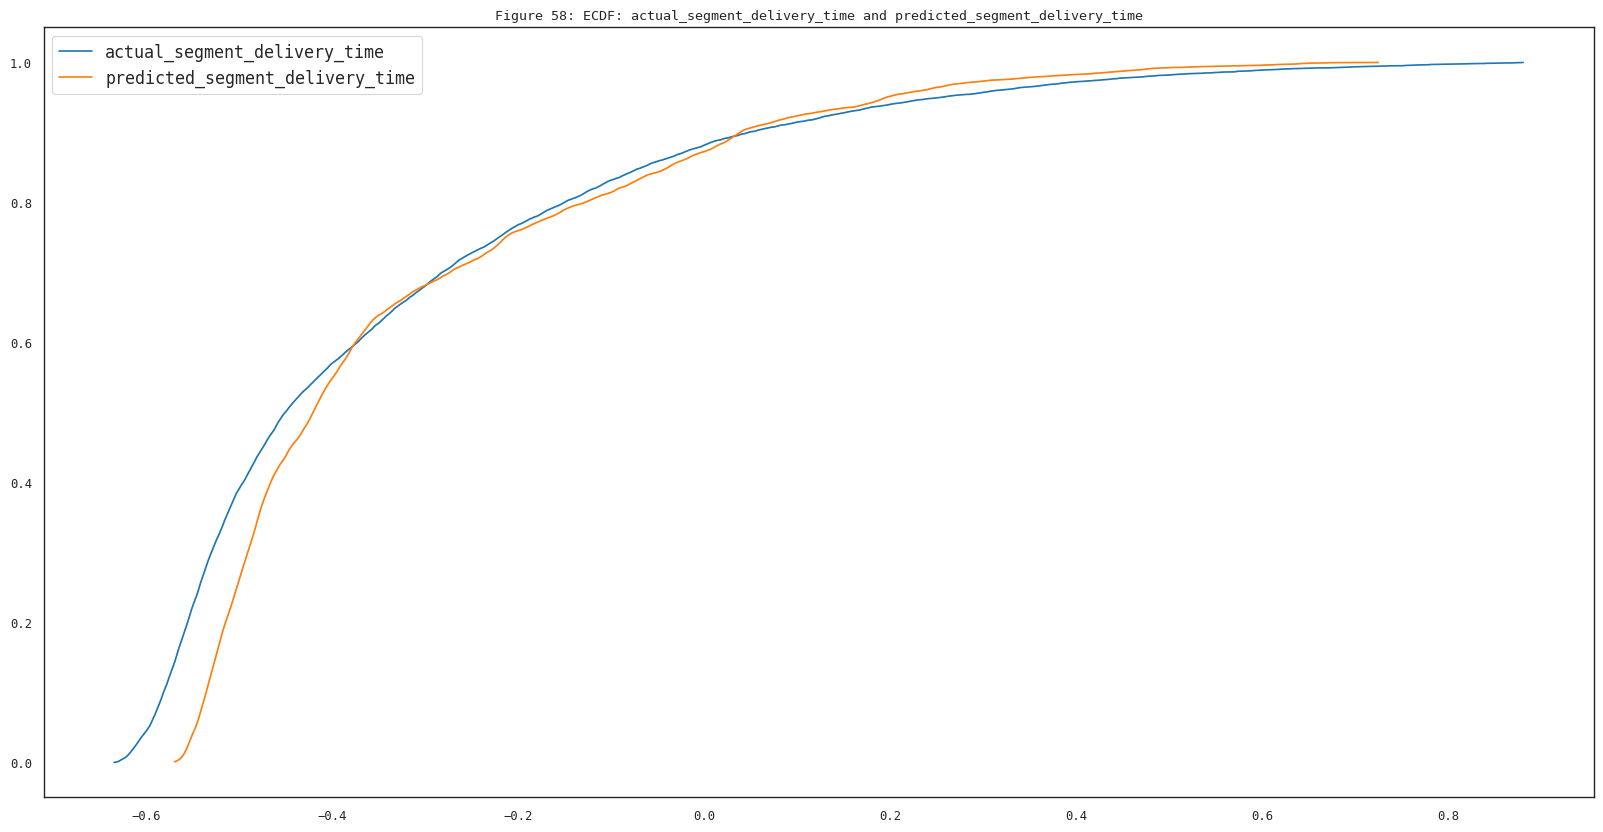





Performing KS-Test on actual_delivery_time and actual_segment_delivery_time.

	Failed to reject the Null Hypothesis because the p-value (0.9226433646654854) > 0.05.
	Outcome: Distribution of actual_delivery_time = Distribution of actual_segment_delivery_time


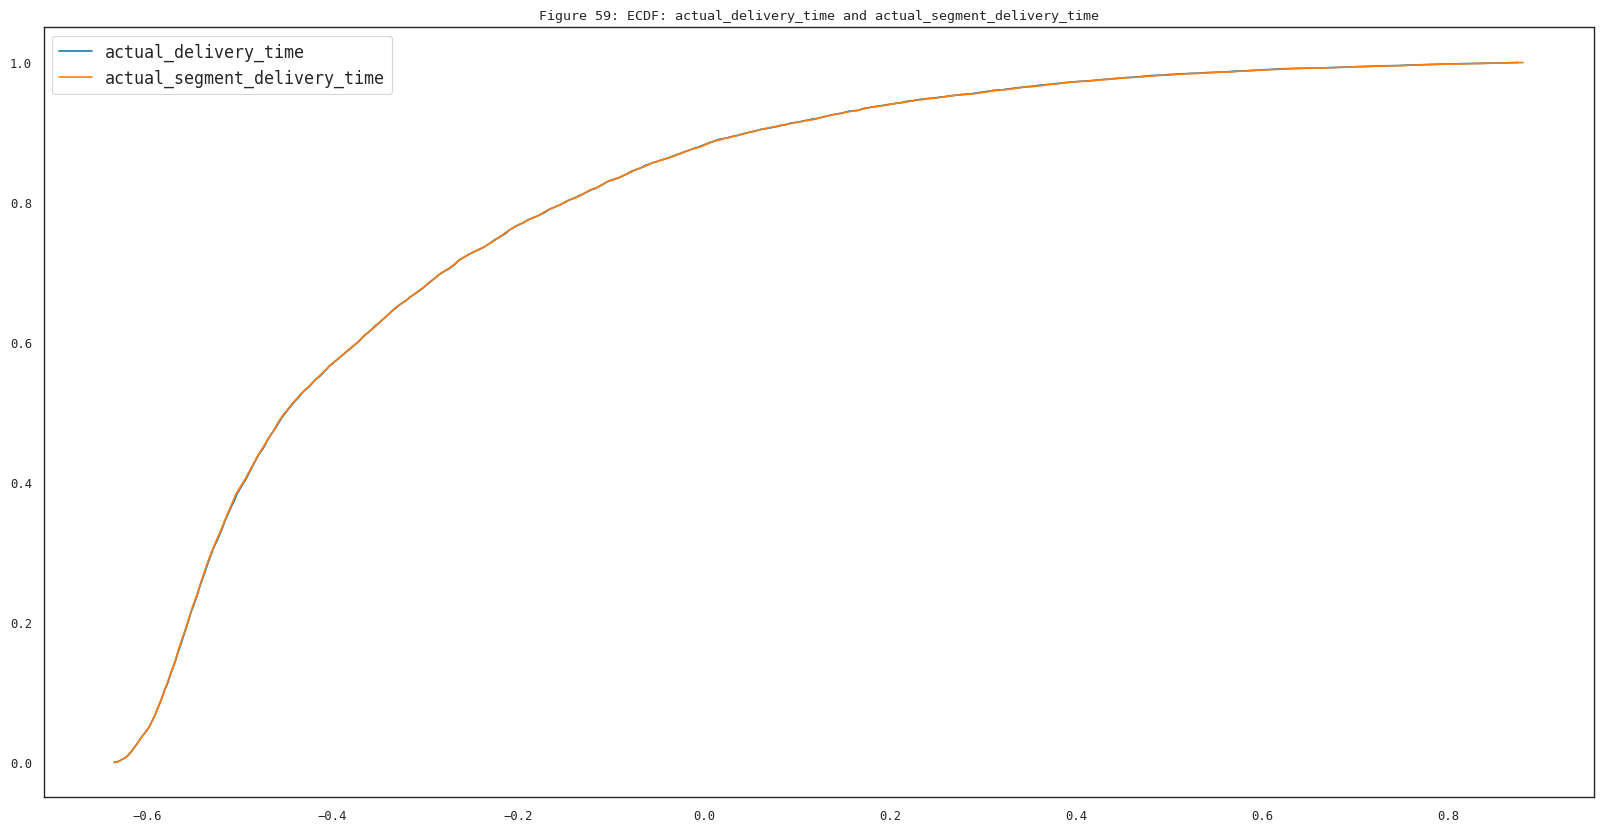





Performing KS-Test on predicted_delivery_time and predicted_segment_delivery_time.

	Rejecting the Null Hypothesis with the p-value of 8.323136026020743e-17.
	Outcome: Distribution of predicted_delivery_time != Distribution of predicted_segment_delivery_time


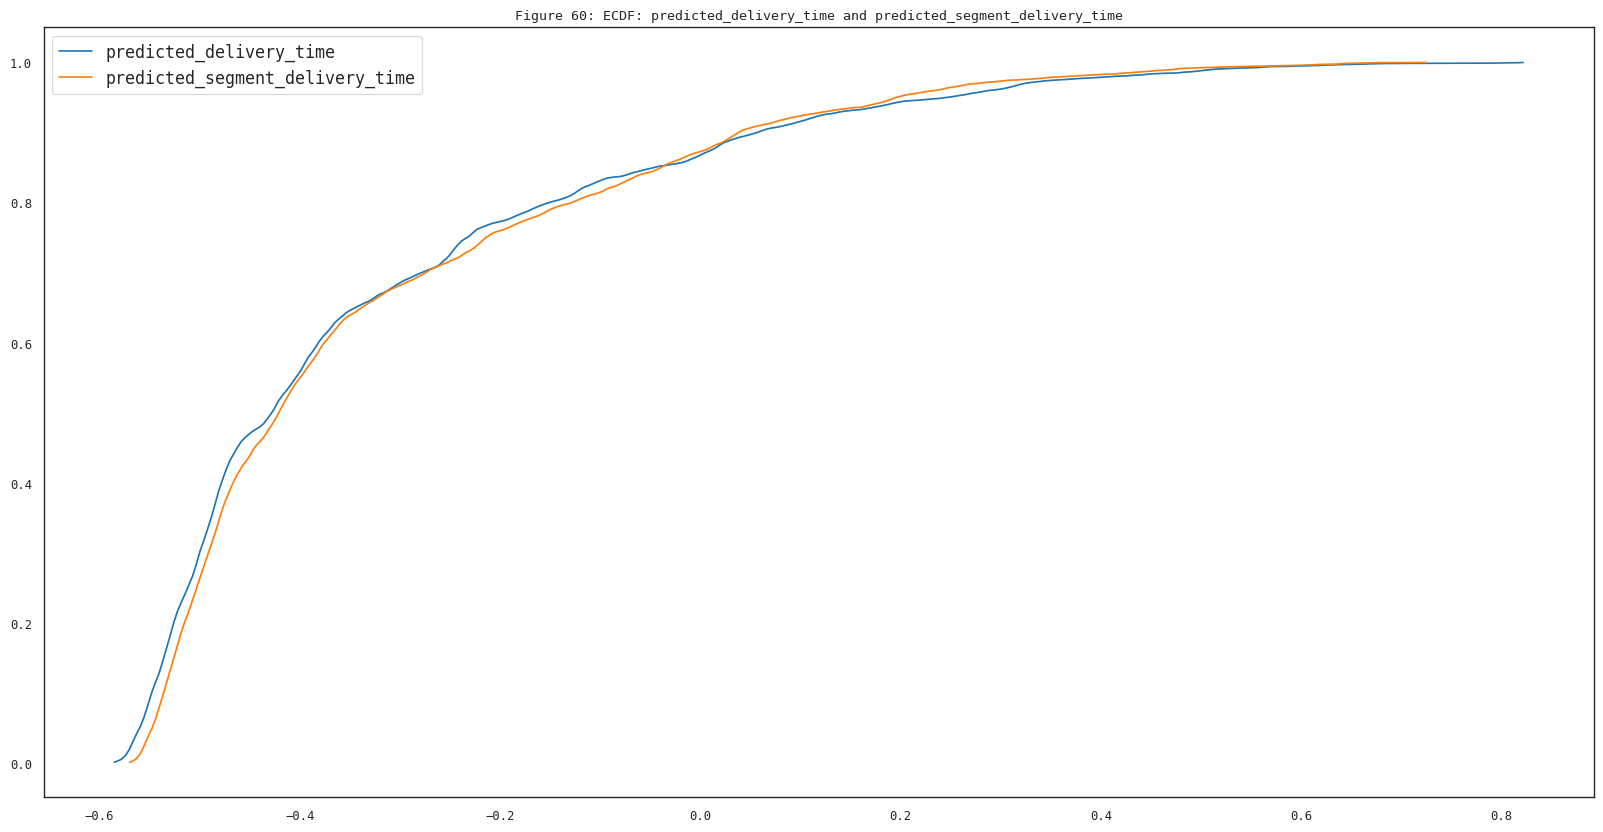





Performing KS-Test on actual_delivery_distance and predicted_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 0.0.
	Outcome: Distribution of actual_delivery_distance != Distribution of predicted_delivery_distance


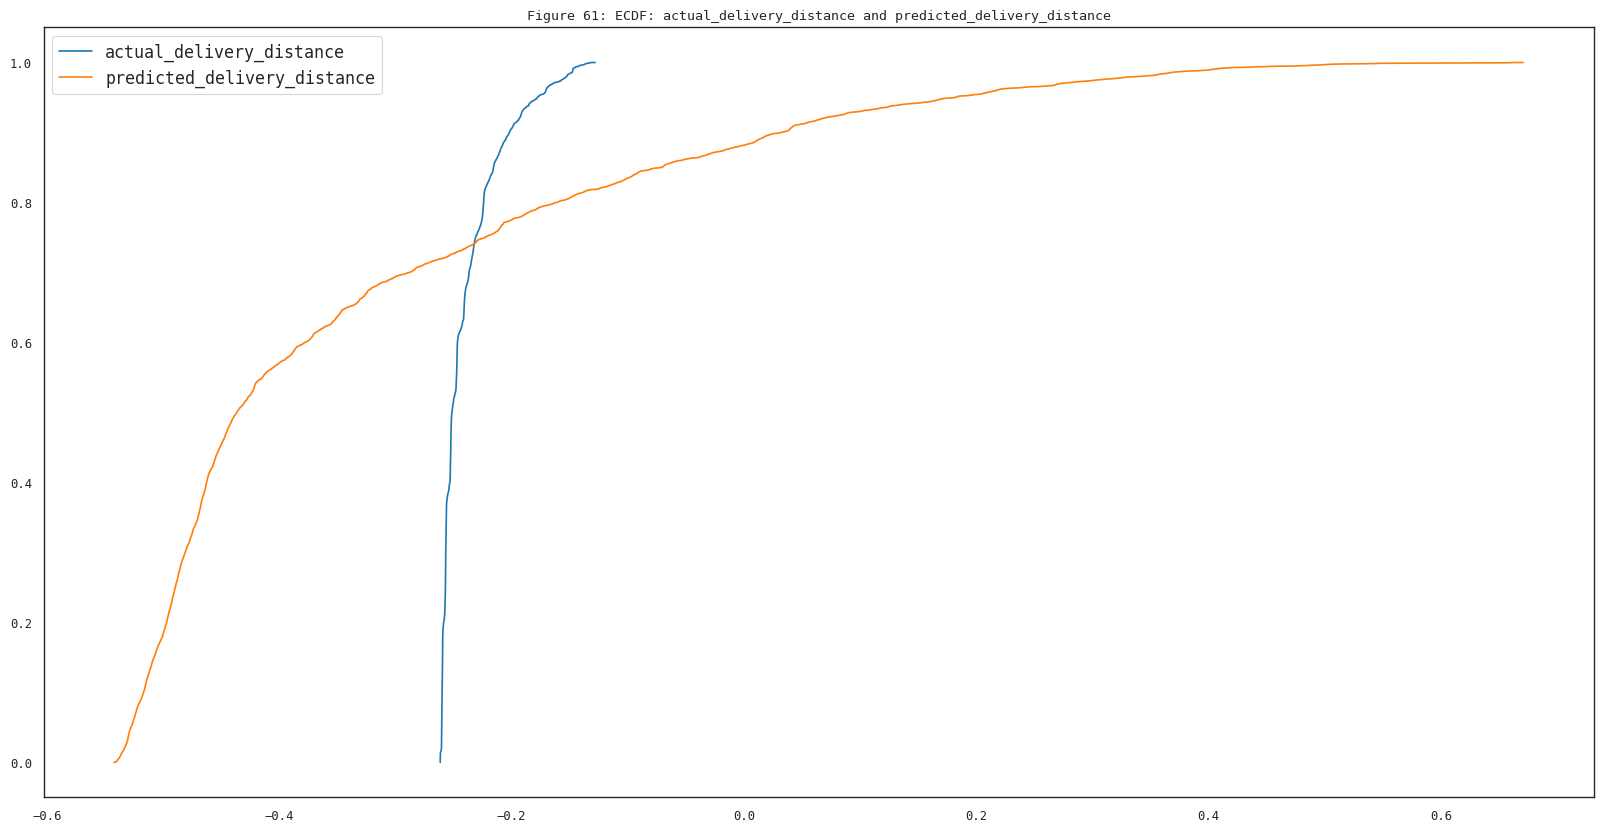





Performing KS-Test on predicted_delivery_distance and predicted_segment_delivery_distance.

	Rejecting the Null Hypothesis with the p-value of 5.403852106398502e-23.
	Outcome: Distribution of predicted_delivery_distance != Distribution of predicted_segment_delivery_distance


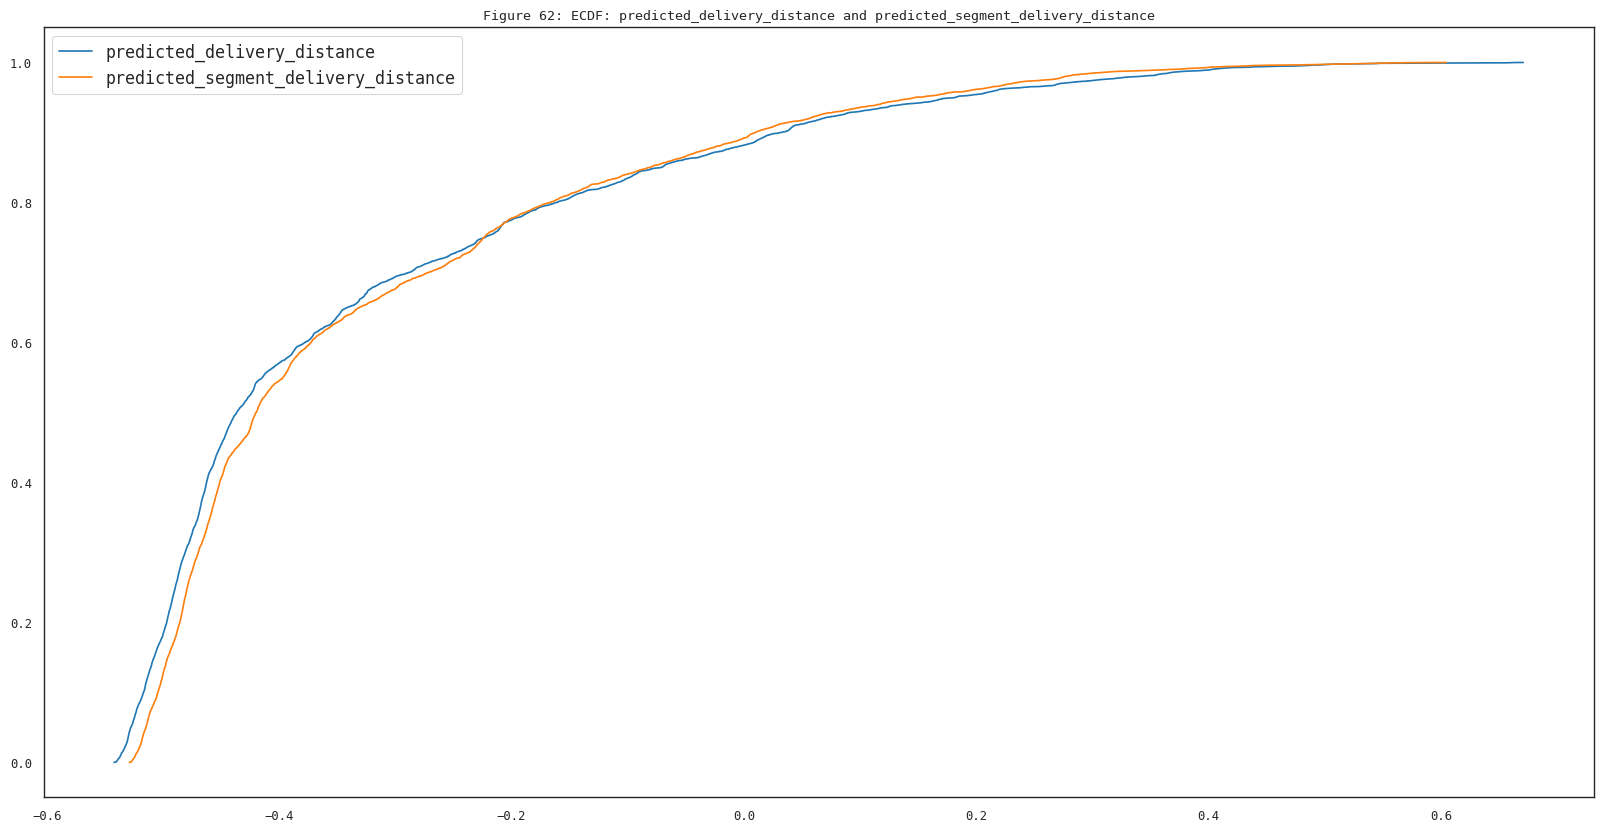





Performing Chi-Square Test on trip_creation_day_of_week and trip_creation_daytime_category.

	Rejecting the Null Hypothesis with the p-value of 0.00024982327034516.
	Outcome: trip_creation_day_of_week and trip_creation_daytime_category are dependent on each other.




Performing Chi-Square Test on trip_creation_daytime_category and return_order.

	Rejecting the Null Hypothesis with the p-value of 1.062242832100094e-17.
	Outcome: trip_creation_daytime_category and return_order are dependent on each other.




Performing Chi-Square Test on trip_creation_day_of_week and return_order.

	Failed to reject the Null Hypothesis because the p-value (0.7301267182060411) > 0.05.
	Outcome: trip_creation_day_of_week and return_order are independent of each other.






In [51]:
# performing Hypothesis Tests on training datasets after removing outliers
tests_after_outlier_treatment_test_data = HypothesisTesting(final_train_df, 0.05, 30, tests_after_outlier_treatment_train_data.fig_num)

tests_after_outlier_treatment_test_data.perform_ttest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_after_outlier_treatment_test_data.perform_ttest('actual_delivery_time', 'predicted_delivery_time')
tests_after_outlier_treatment_test_data.perform_ttest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_ttest('actual_delivery_time', 'actual_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_ttest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_ttest('actual_delivery_distance', 'predicted_delivery_distance')
tests_after_outlier_treatment_test_data.perform_ttest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_after_outlier_treatment_test_data.perform_kstest('actual_source_and_destination_scan_time', 'calculated_source_and_destination_scan_time')
tests_after_outlier_treatment_test_data.perform_kstest('actual_delivery_time', 'predicted_delivery_time')
tests_after_outlier_treatment_test_data.perform_kstest('actual_segment_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_kstest('actual_delivery_time', 'actual_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_kstest('predicted_delivery_time', 'predicted_segment_delivery_time')
tests_after_outlier_treatment_test_data.perform_kstest('actual_delivery_distance', 'predicted_delivery_distance')
tests_after_outlier_treatment_test_data.perform_kstest('predicted_delivery_distance', 'predicted_segment_delivery_distance')

tests_after_outlier_treatment_test_data.perform_chisquare_test('trip_creation_day_of_week', 'trip_creation_daytime_category')
tests_after_outlier_treatment_test_data.perform_chisquare_test('trip_creation_daytime_category', 'return_order')
tests_after_outlier_treatment_test_data.perform_chisquare_test('trip_creation_day_of_week', 'return_order')

<span style="font-family: monospace">

<h3>Insights:</h3>

    1. Huge deviation in OSRM's prdicted time and distance.
    2. Less number of trips initiating on Weekends and Monthends.
    3. Most number of trips starting from
        a. City - Gurgaon_Bilaspur_HB AND Bangalore_Nelmngla_H
        b. State - Haryana AND Maharshtra
    4. Most number of trips ending in
        a. City - Gurgaon_Bilaspur_HB AND Bangalore_Nelmngla_H
        b. State - Karnataka AND Harayana
    5. The average difference between actual delivery time and scan time is whopping 545.7 minutes.

<h3>Recommendations:</h3>

    1. IMPORTANT - Use trustworthy OSRM due to high variation in predicted and actual time and distance.
    2. IMPORTANT - Improve scanning process before average difference between actual delivery time and scan time is whopping 545.7 minutes.
    3. Can start stat trips in Morning (6AM to 12Noon) due to less traffic that will save fuel-cost.
    4. Initiate or plan trips such that we cross metropolitan cities during weekend because of the less traffic to save fuel-cost.
    5. Use predictive modelling to predict prospective packets to be delivered in the same city to combine multiple packages to save fuel-cost.

</span>